### E22001 Aanchal Khanna

### E22018 Hitesh Kakadiya

### E22029 Savi Wilson

##  Assignment: Predicting Housing Prices 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv("/Users/aanchalkhanna72/Downloads/kc_house_train_data.csv")
data.head(2)

In [ ]:
data.describe()

In [549]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

### Our initial hypotheses were:

1. Prices are positively correlated with number of bedrooms,bathrooms, living and lot area in sqft, grades, views, waterfront presence, condition, basement area.
2. Prices are negatively correlated with year of renovation (if considered as number of years since renovation, ie, fewer years since renovation-->newer property-->higher price)
3. Certain zipcodes will have higher house prices due to higher living,lot area, higher  number of views, waterfront, etc. 
4. We assume a high correlation between some sets of predictors. For eg, bedroooms and sqftliving, number of floors and basements


 
Since the remaining variables have a large number of values as outliers, we will not remove or alter them as of now.  We will  work on them  during feature engineering.

### Experiment: Univariate Analysis


Categorical: ['date'] 

Discrete: ['waterfront', 'view', 'condition', 'renovated', 'basement'] 

Continuous: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_age', 'log_price'] 

Description: id             int64
date          object
price        float64
bedrooms       int64
bathrooms    float64
              ...   
98198          uint8
98199          uint8
renovated      int64
basement       int64
log_price    float64
Length: 94, dtype: object 

Are the variables categorized correctly? yes/no: no
Which variable is not categorized correctly?: floors
Is this variable discrete/categorical (disc/cat):disc
The discrete numerical variables now are:  ['waterfront', 'view', 'condition', 'renovated', 'basement', 'floors']
Are the variables categorized correctly? yes/no: no
Which variable is not categorized correctly?: zipcode
Is this v

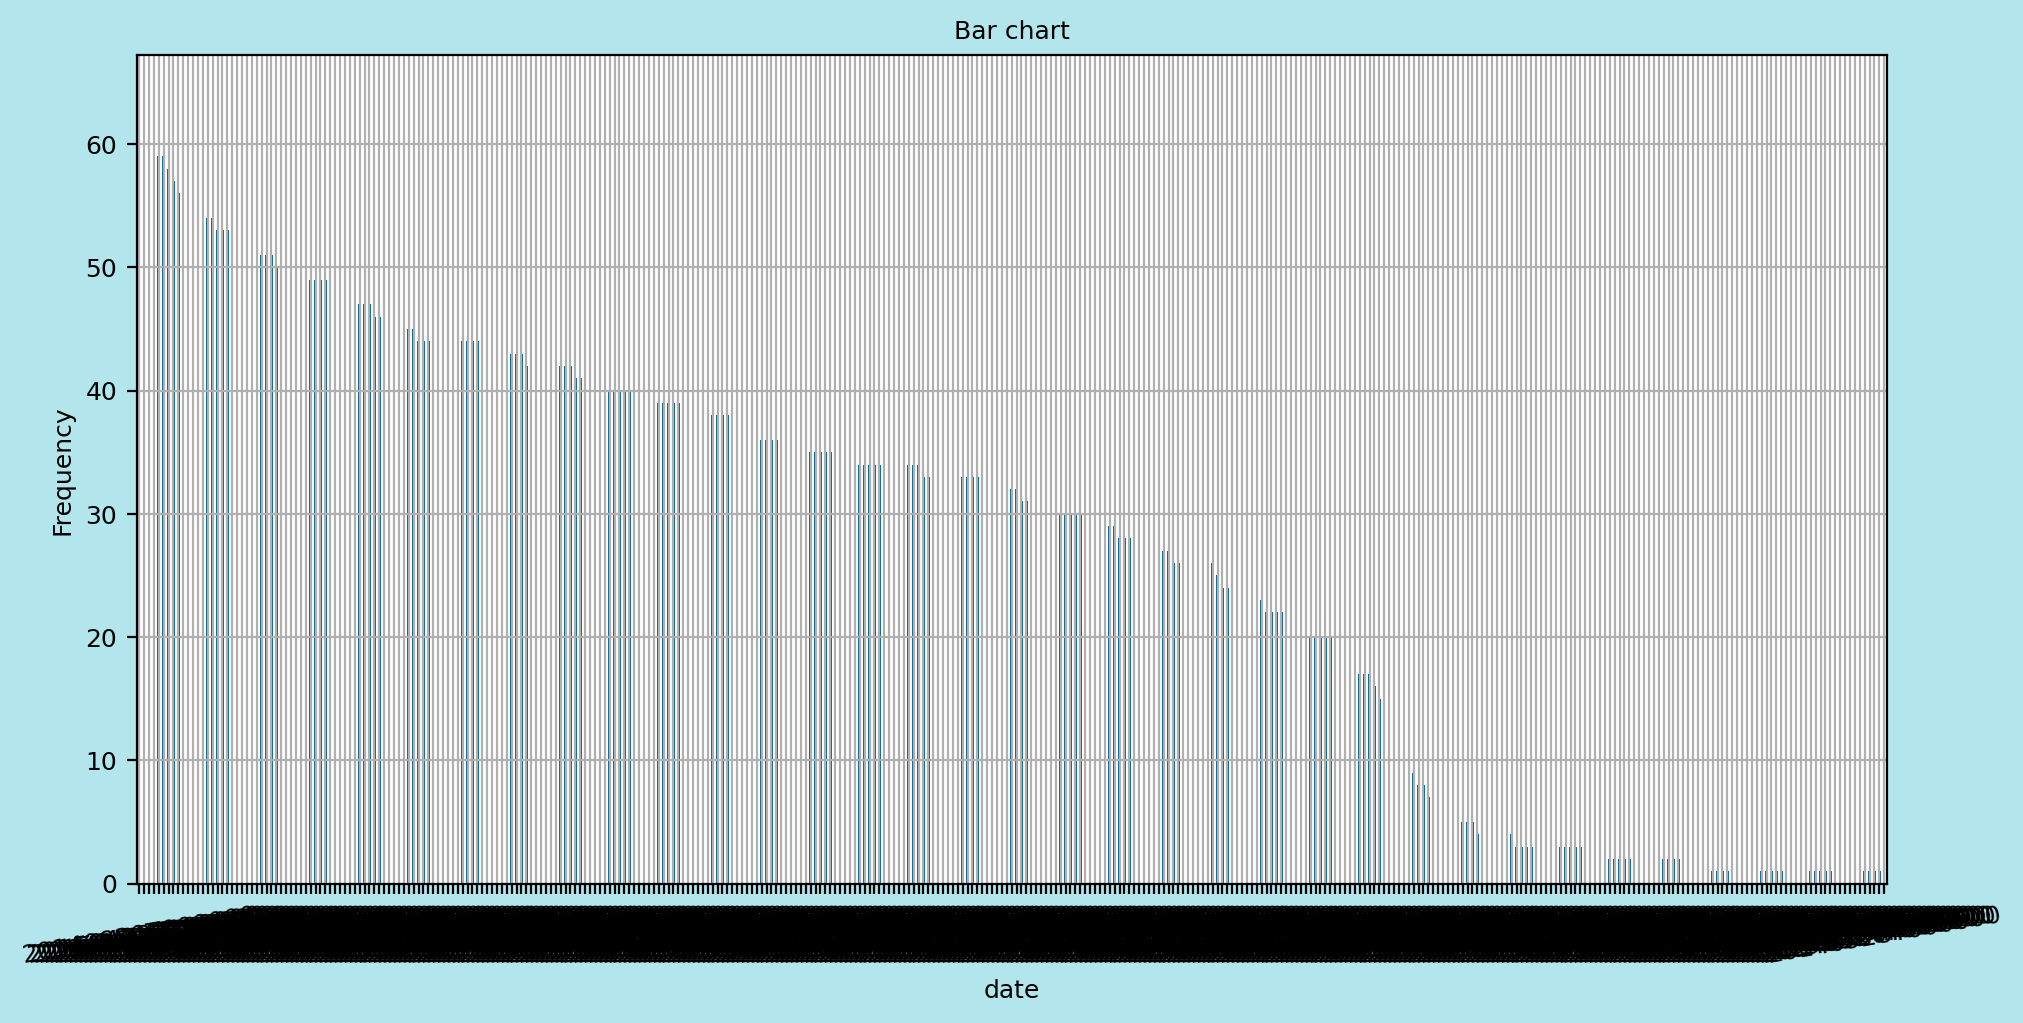

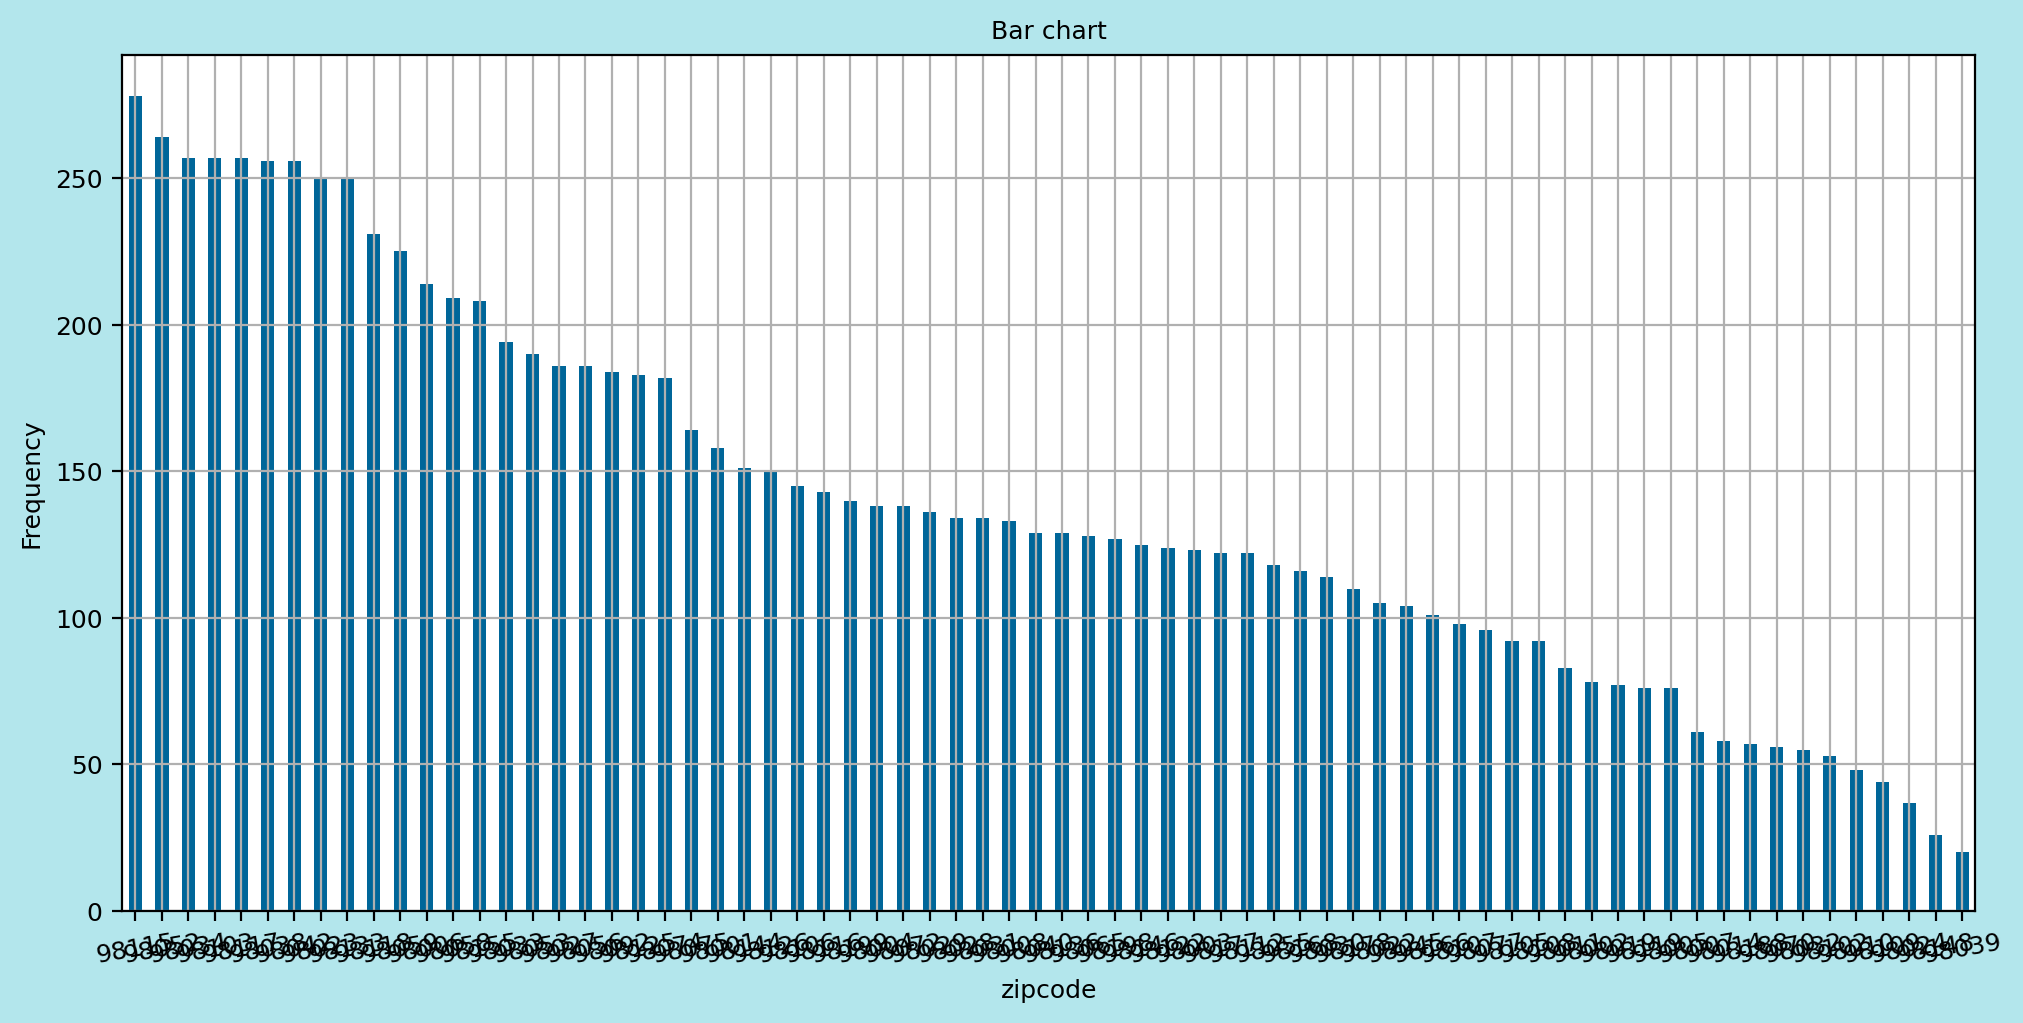

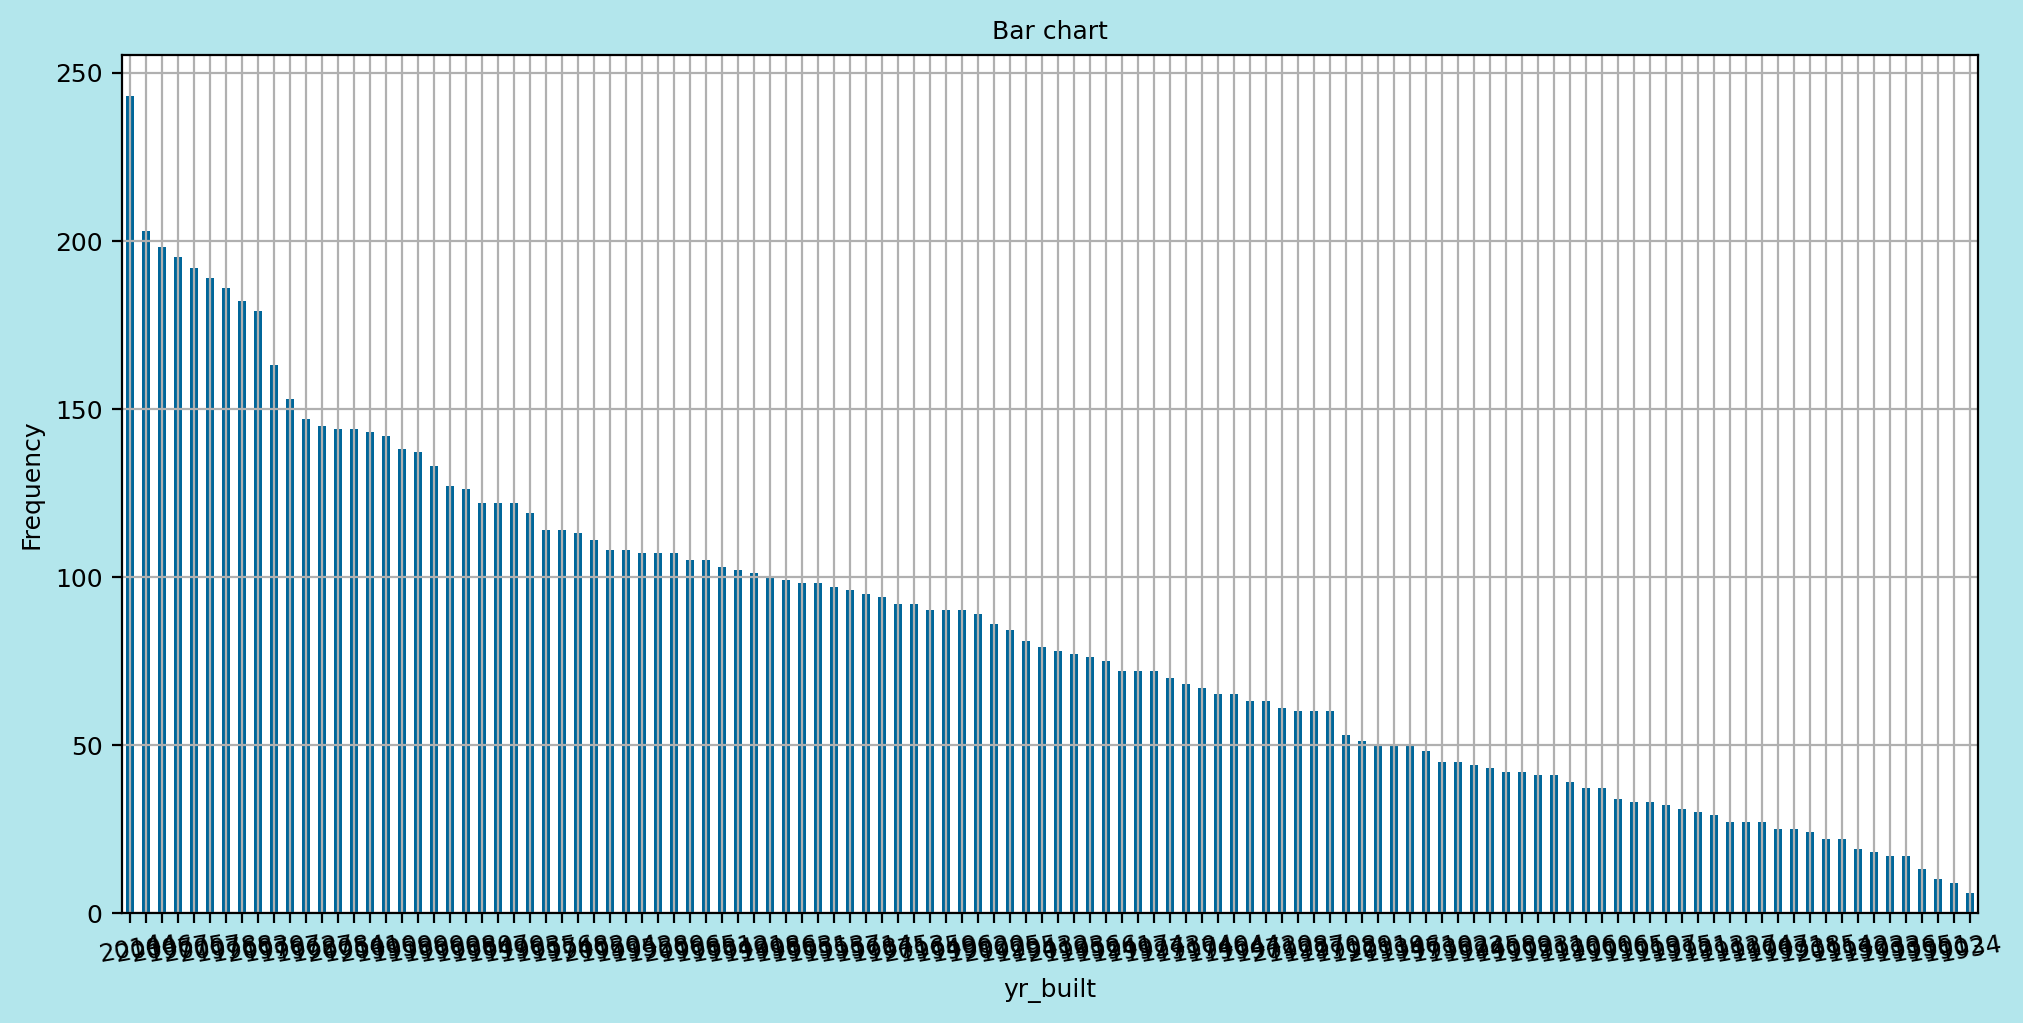

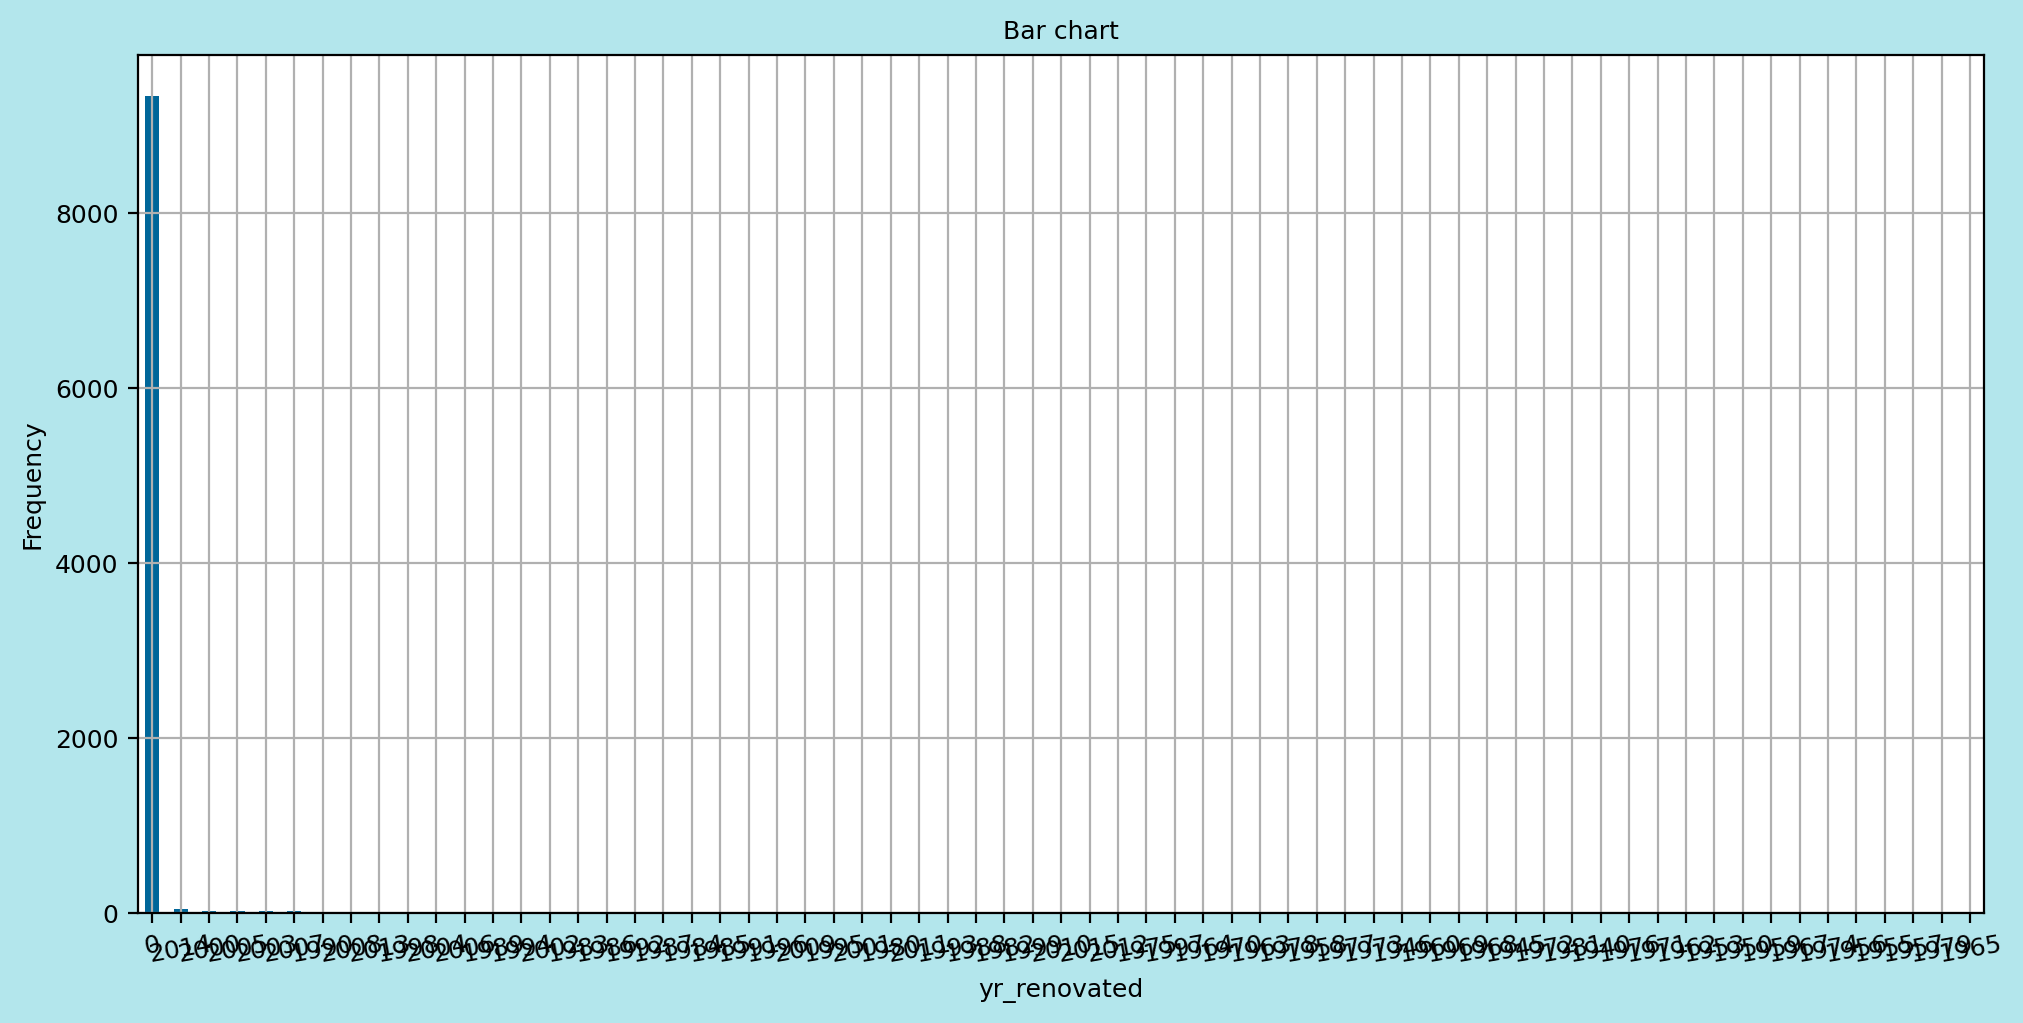

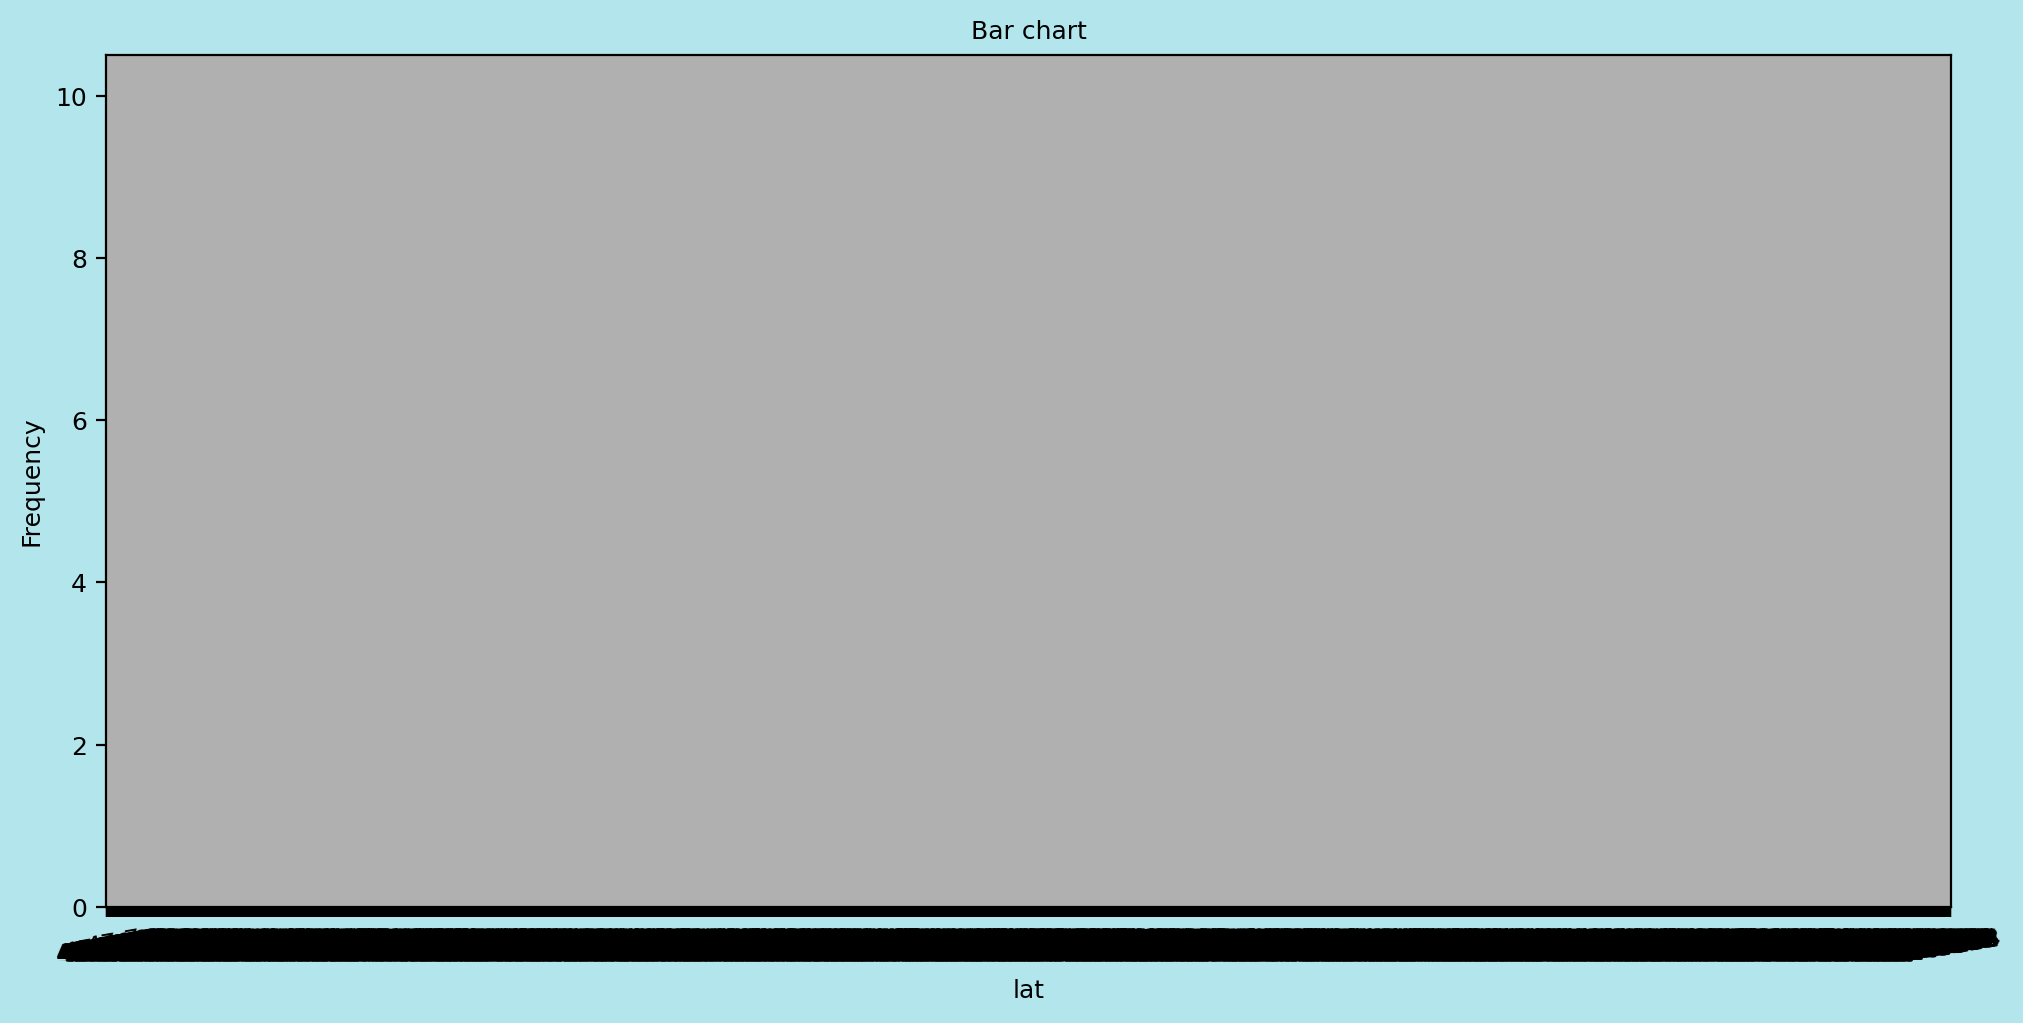

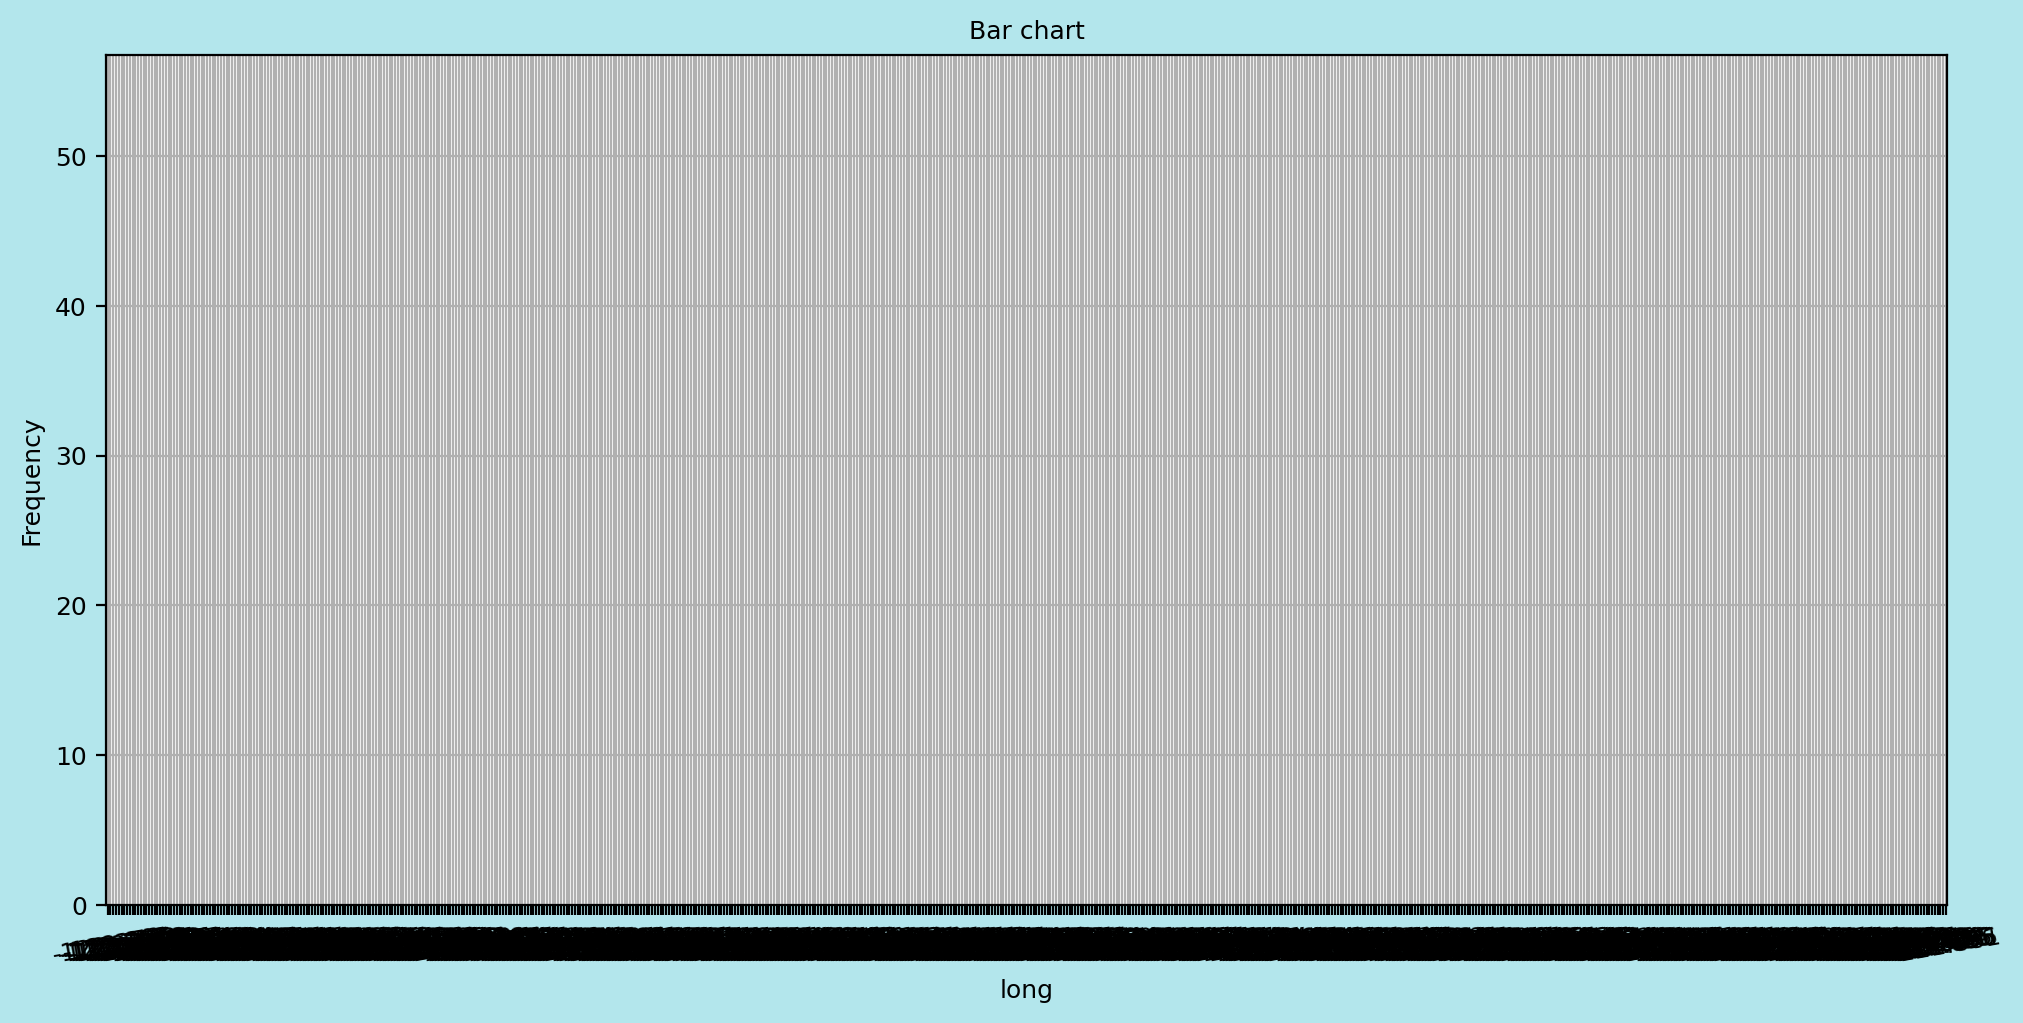

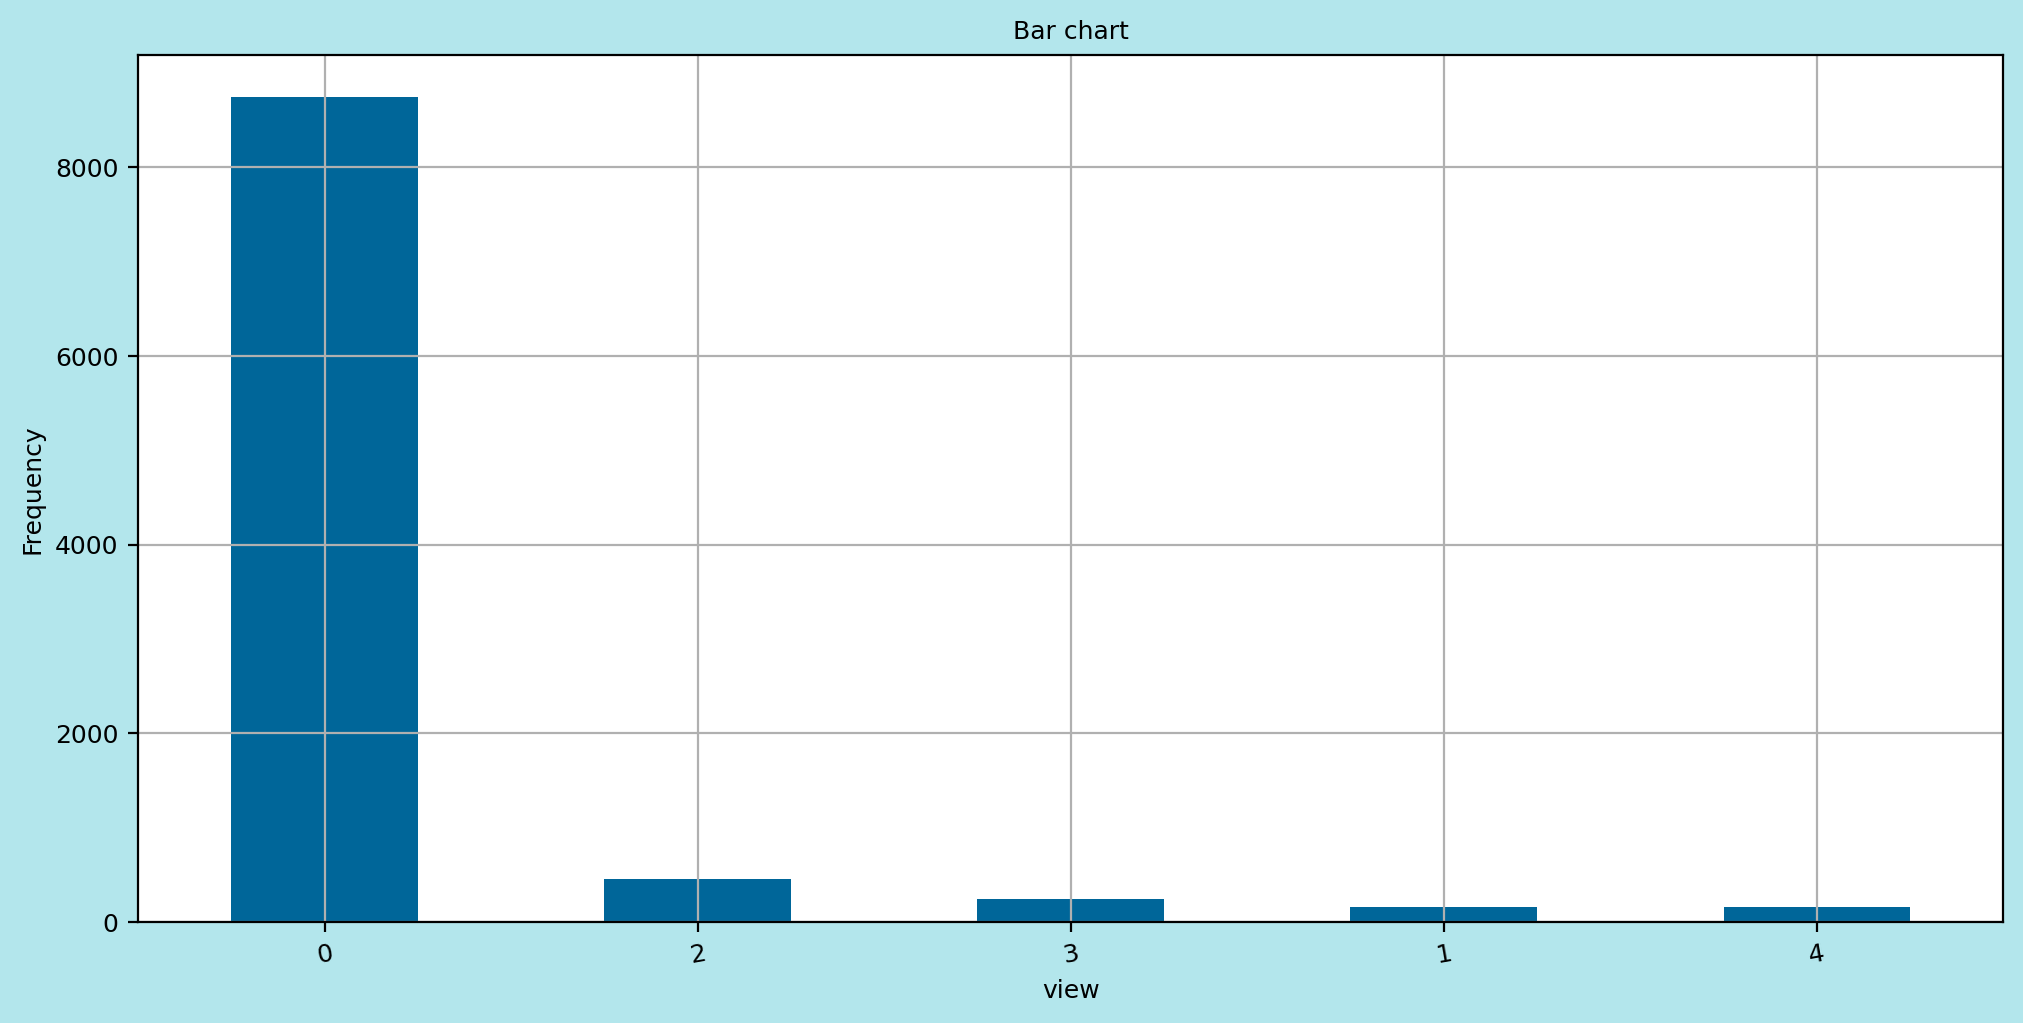

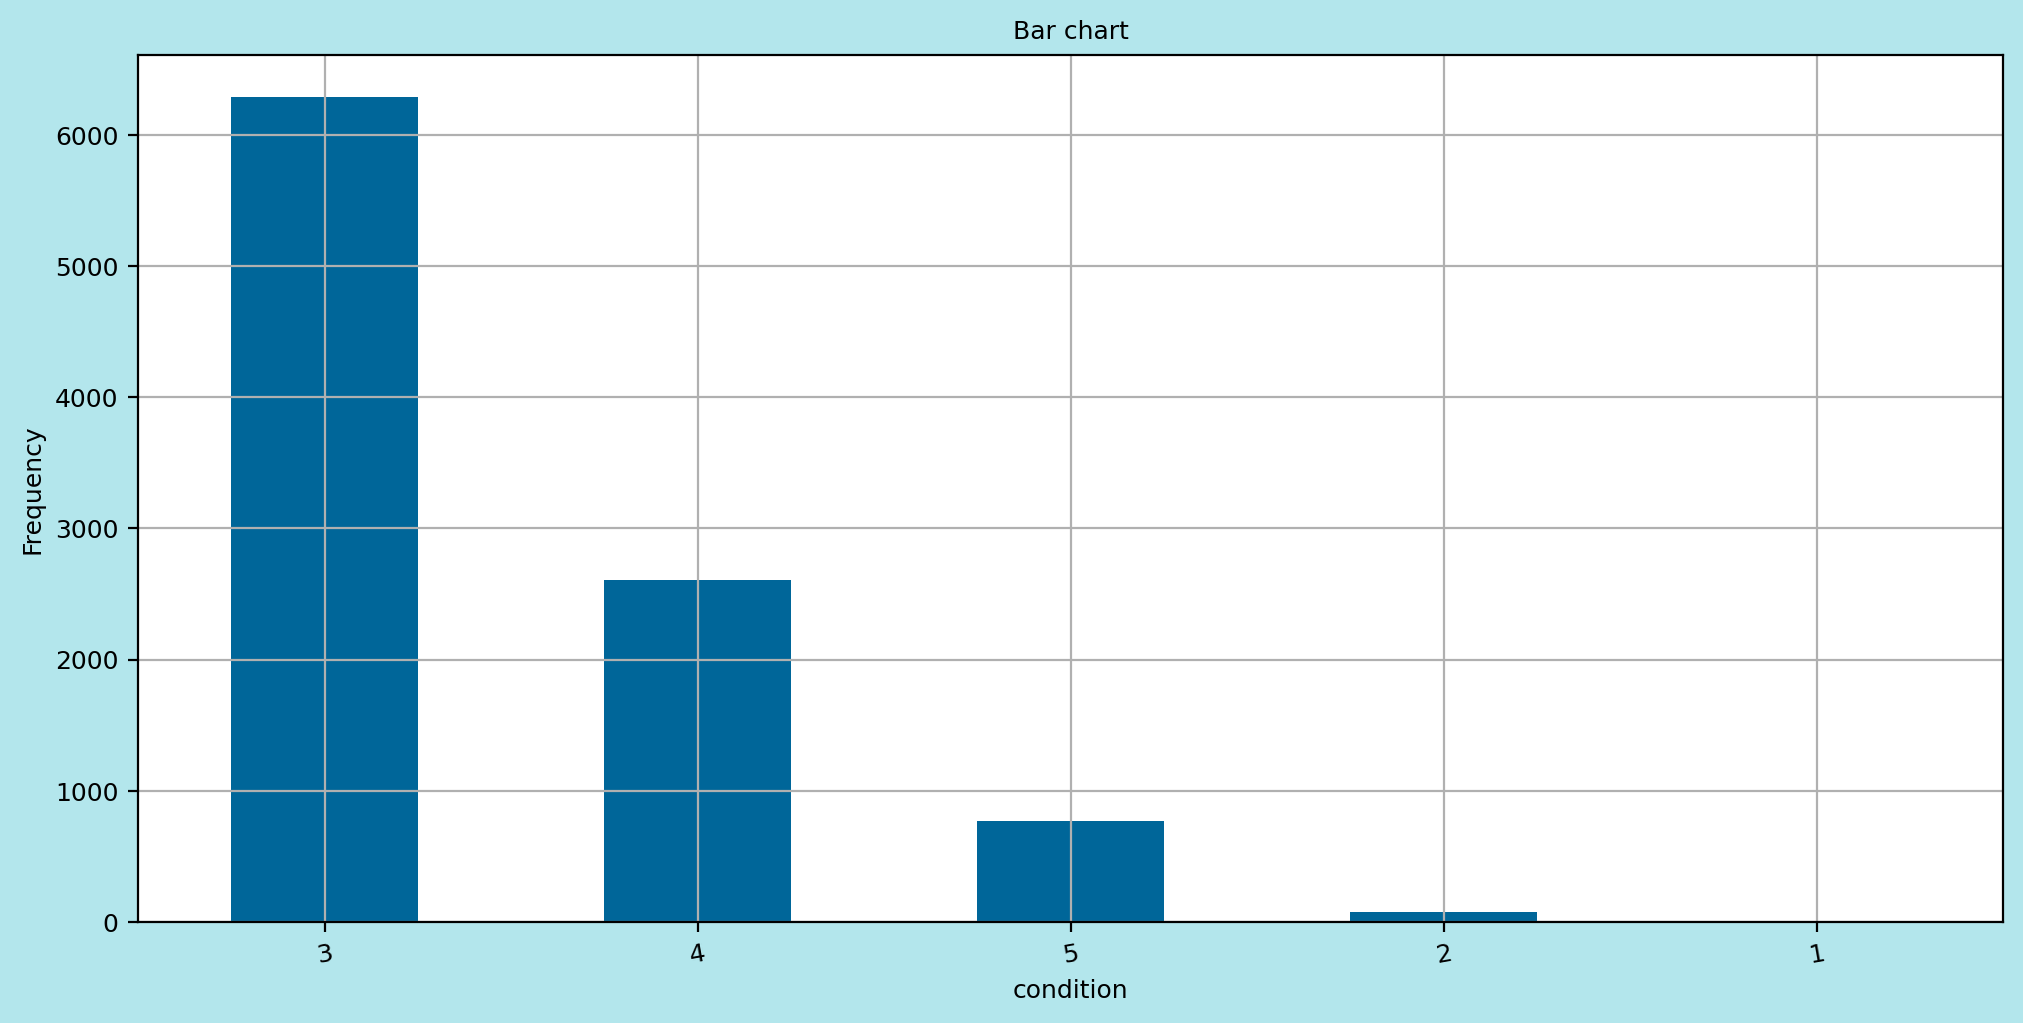

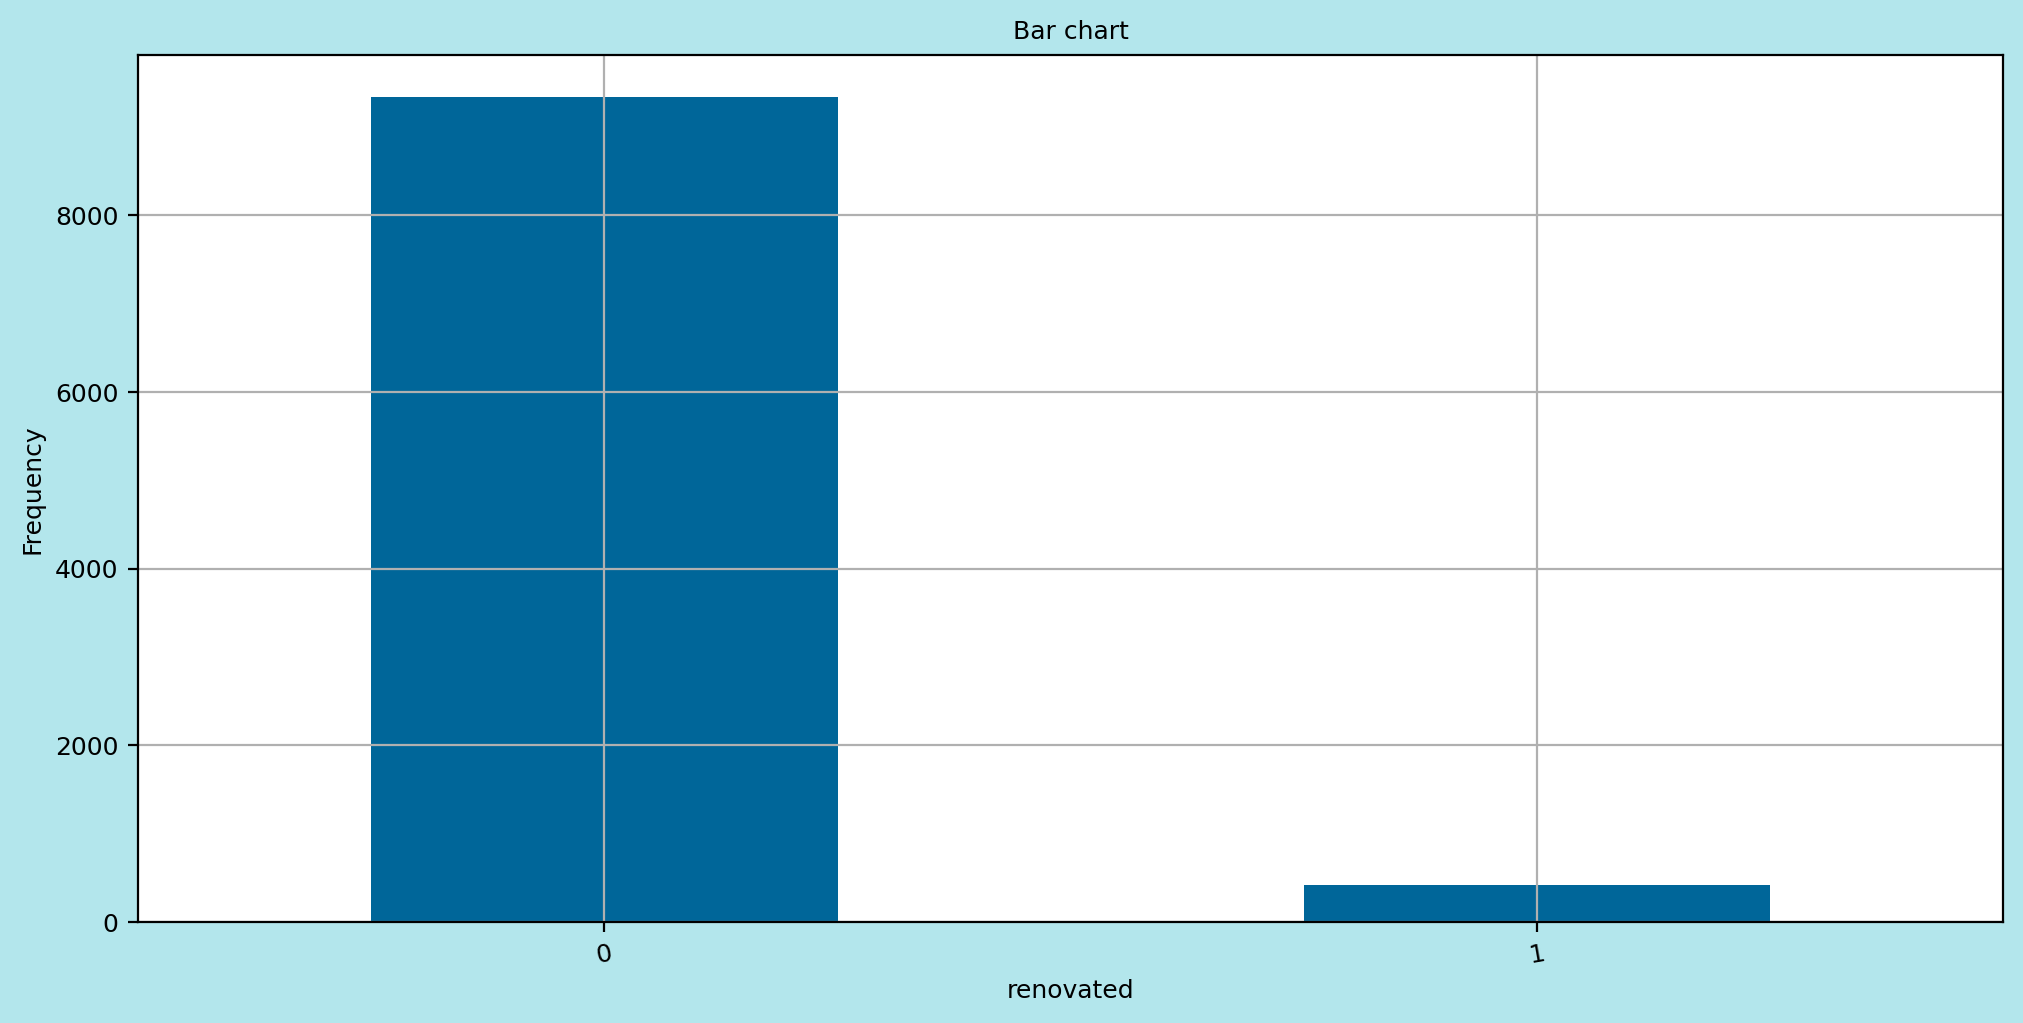

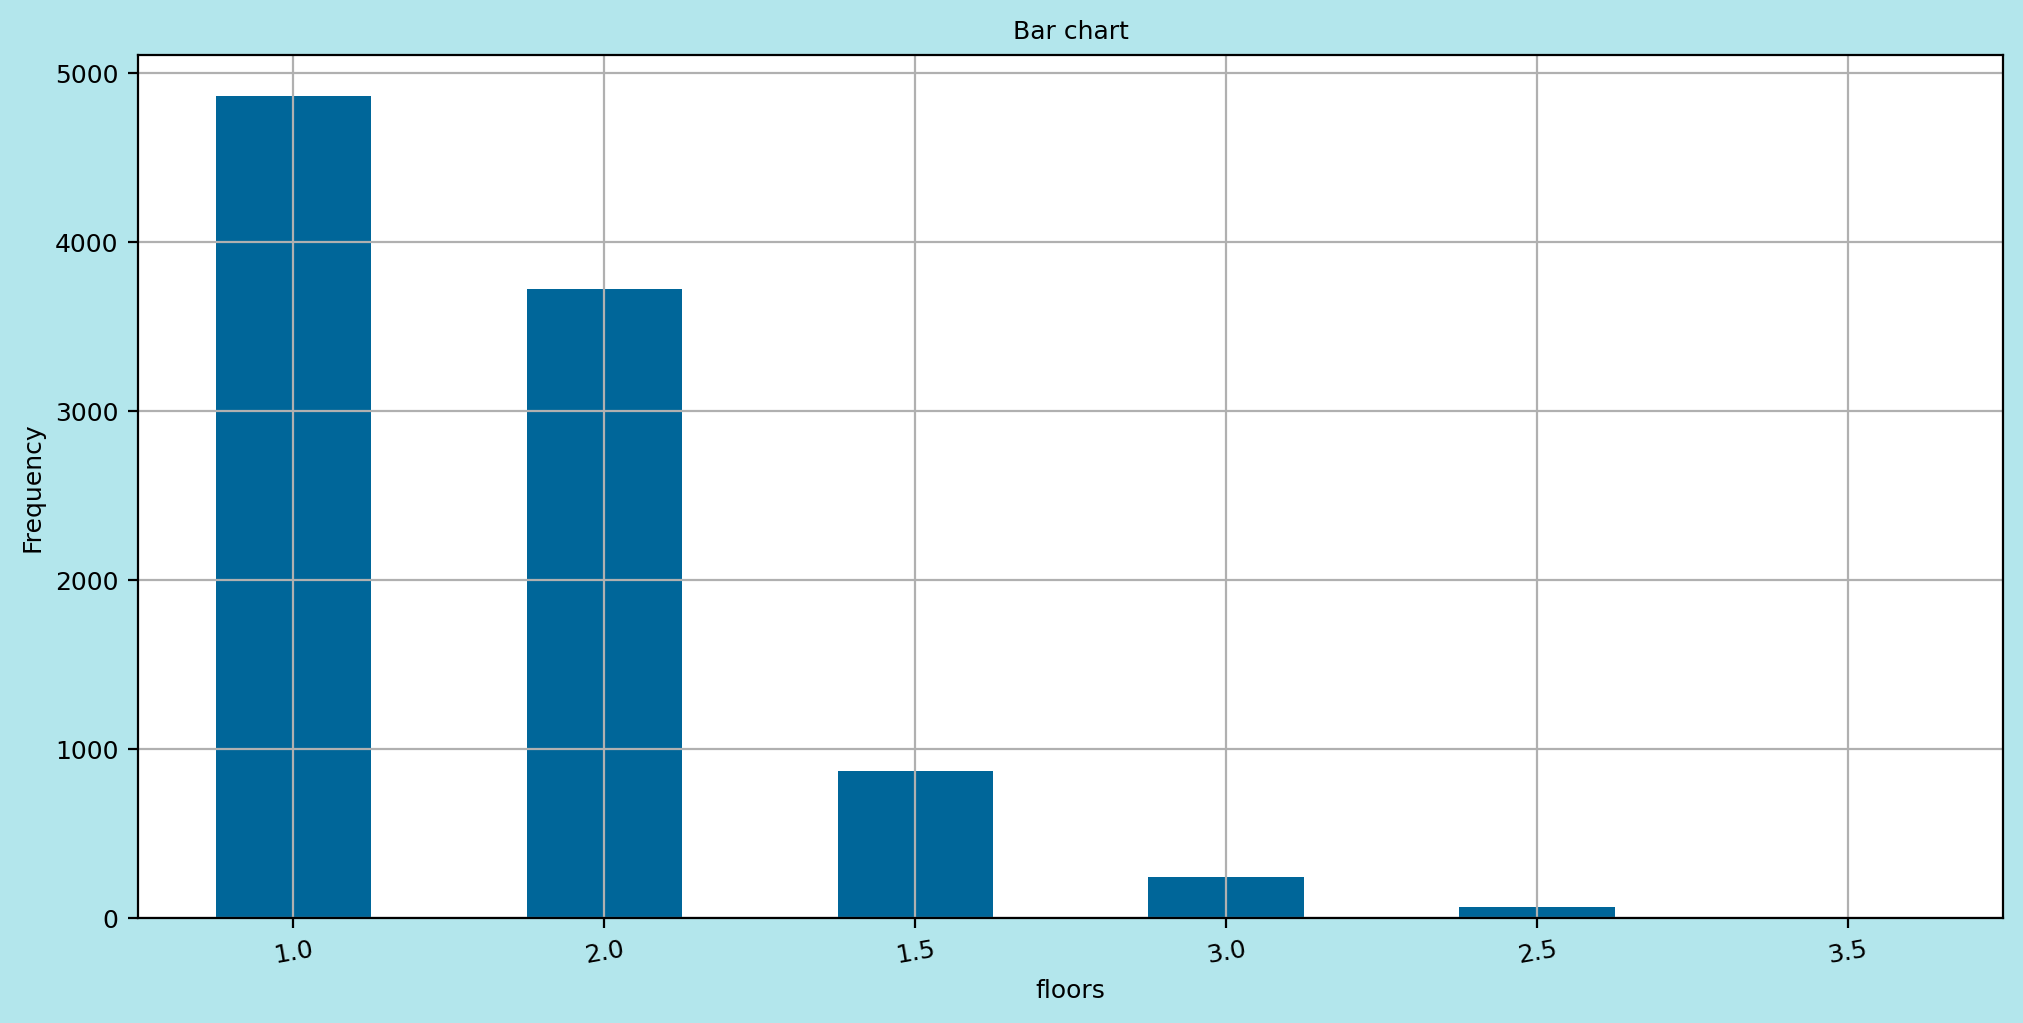

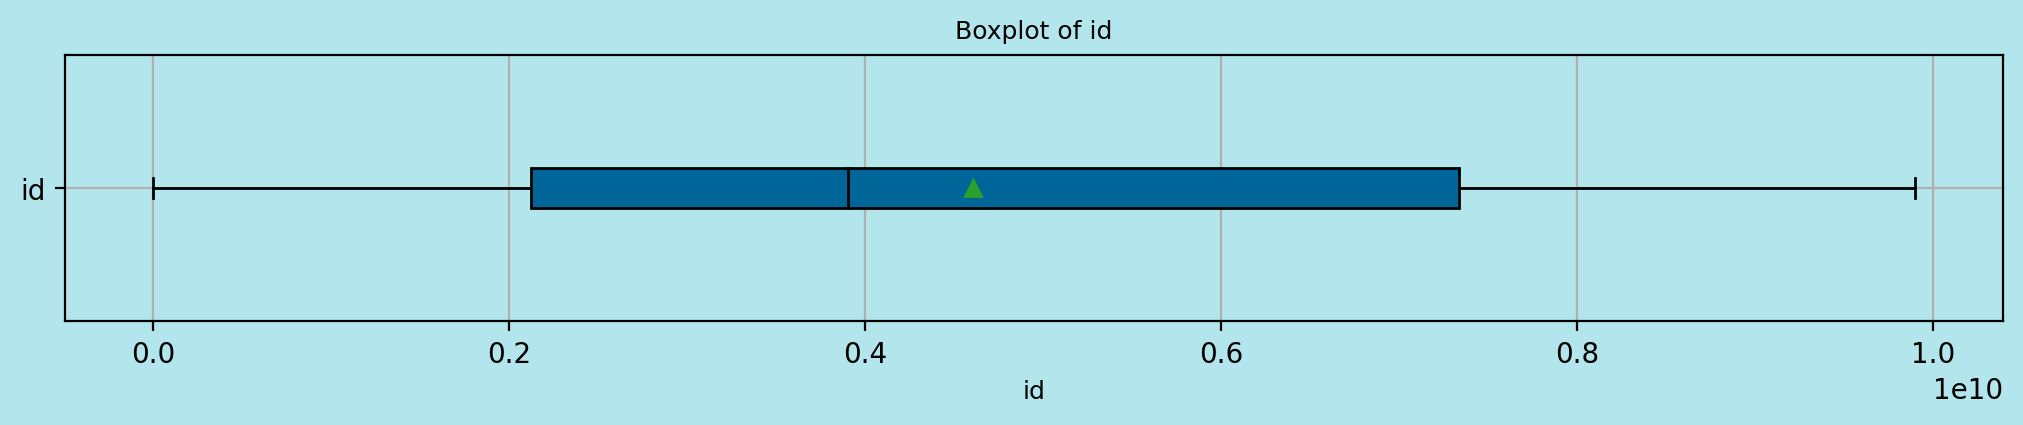

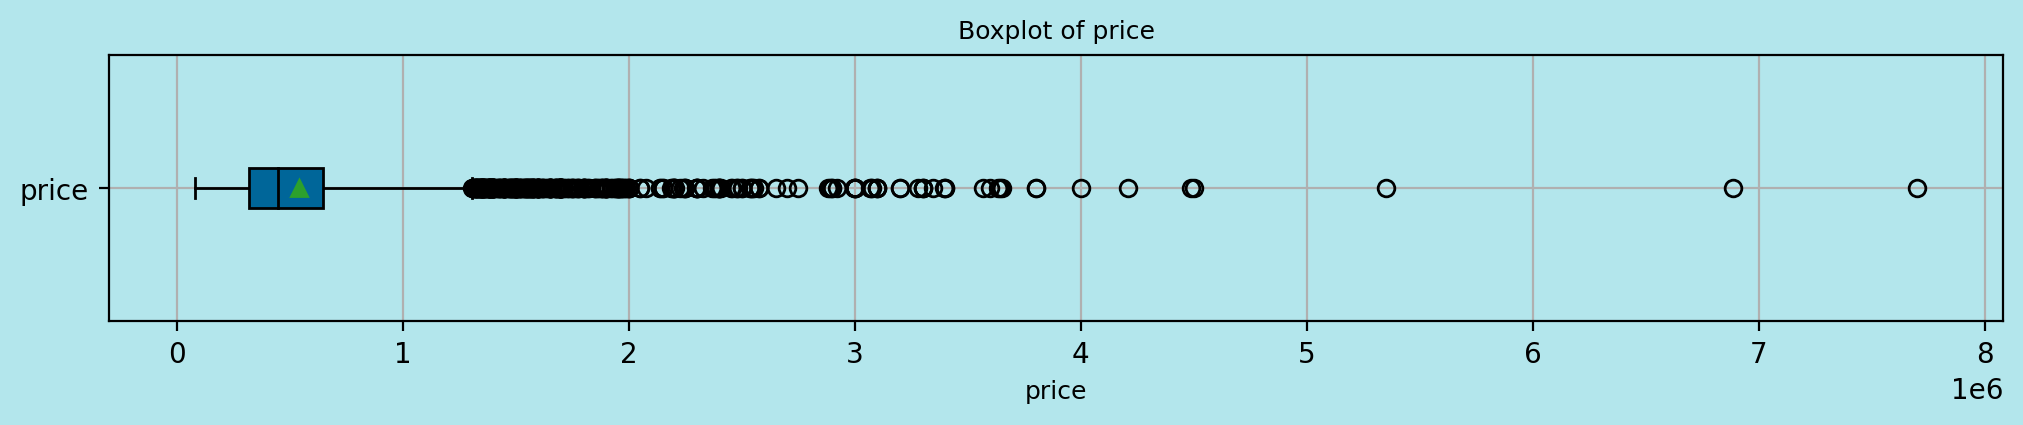

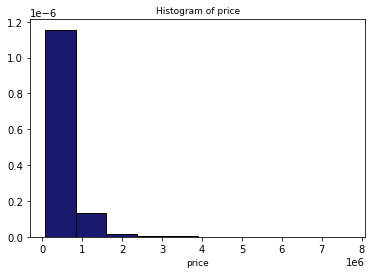

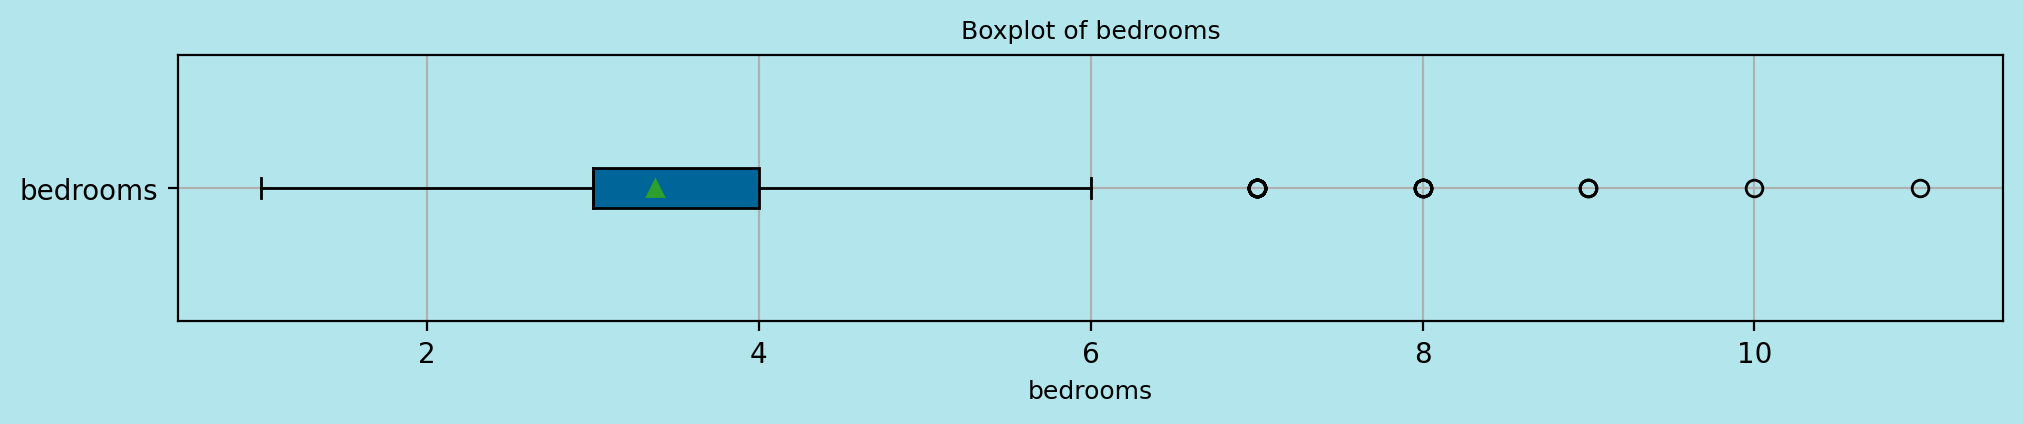

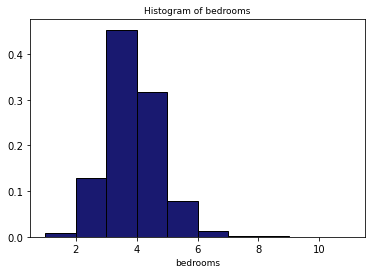

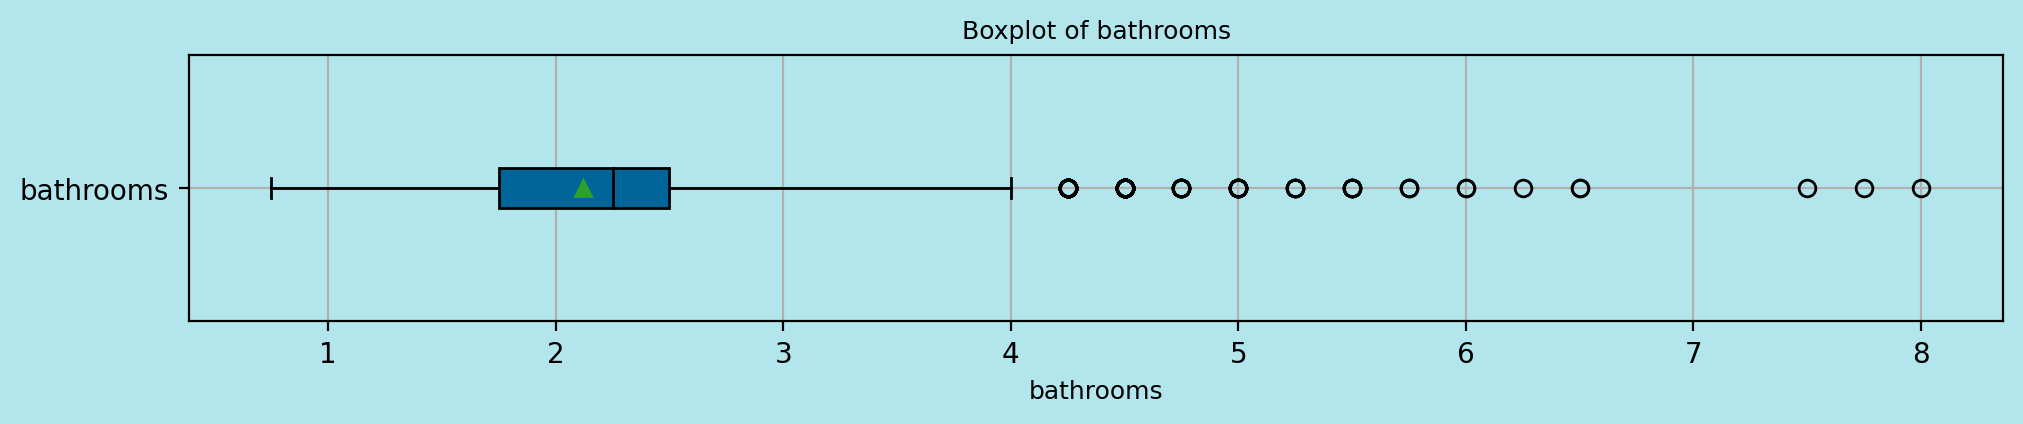

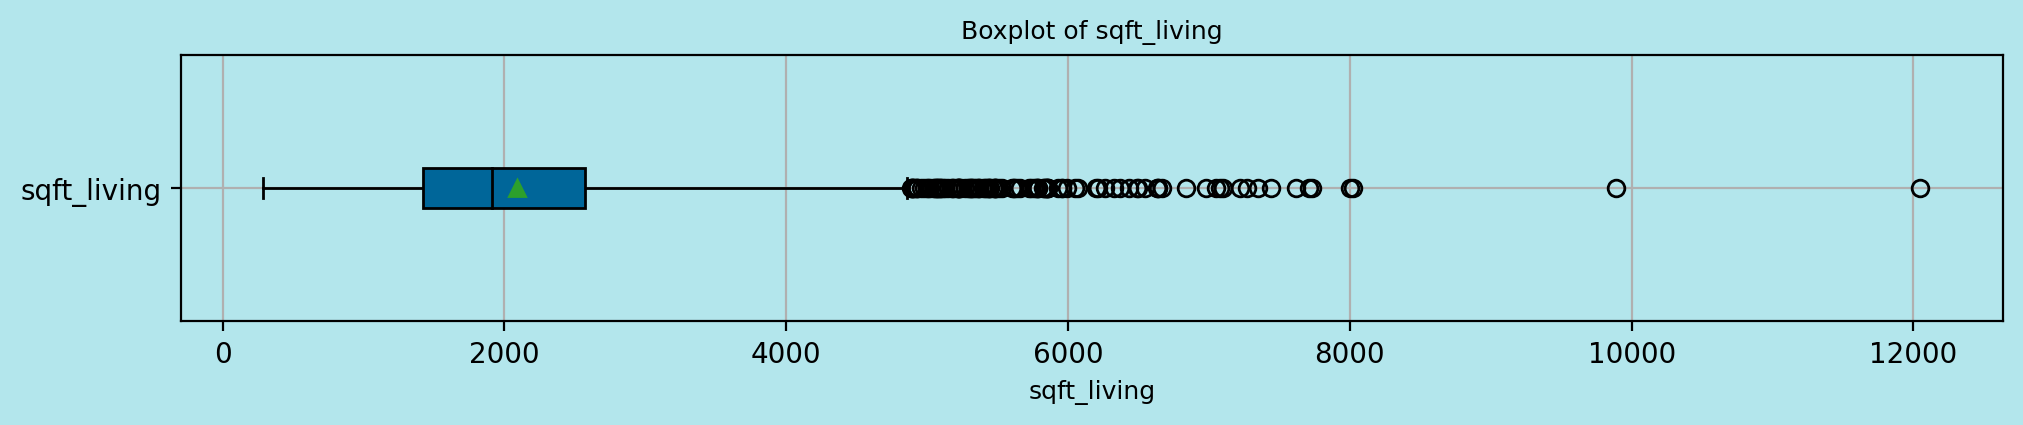

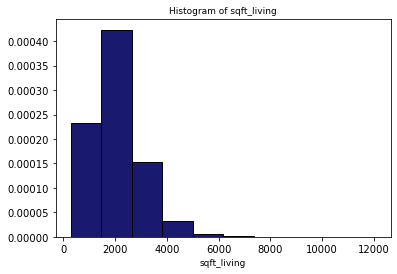

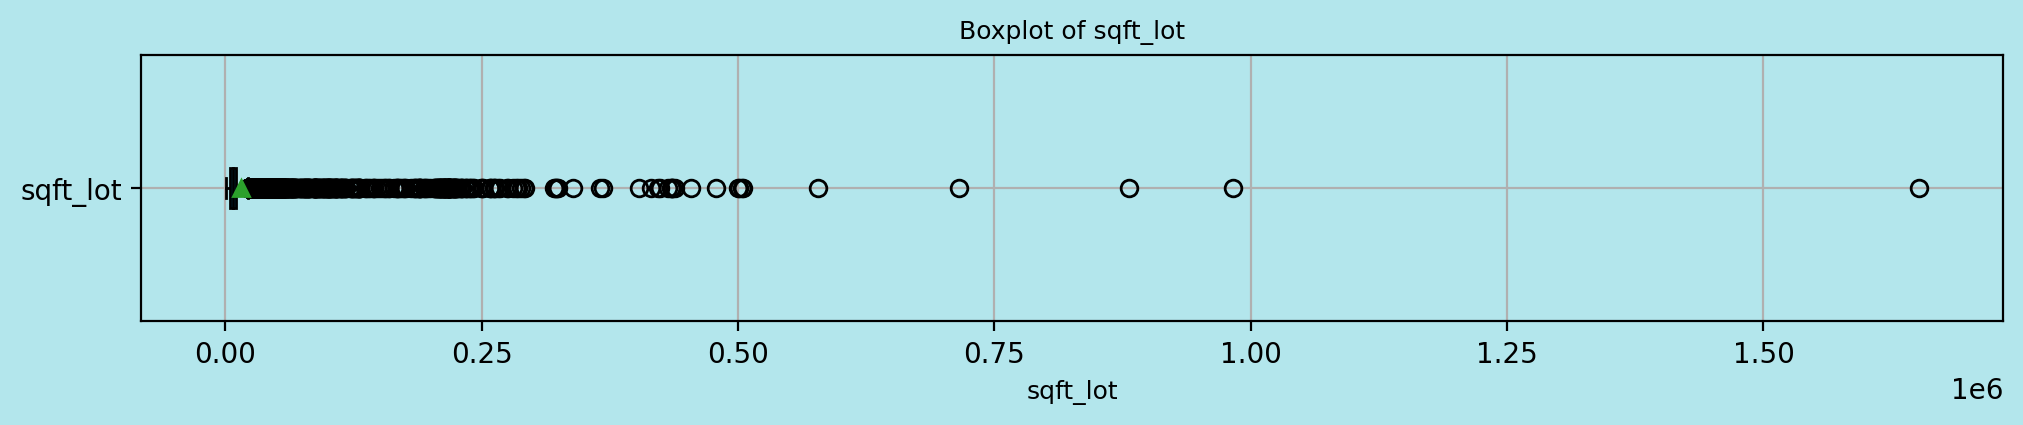

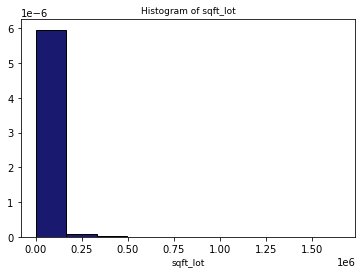

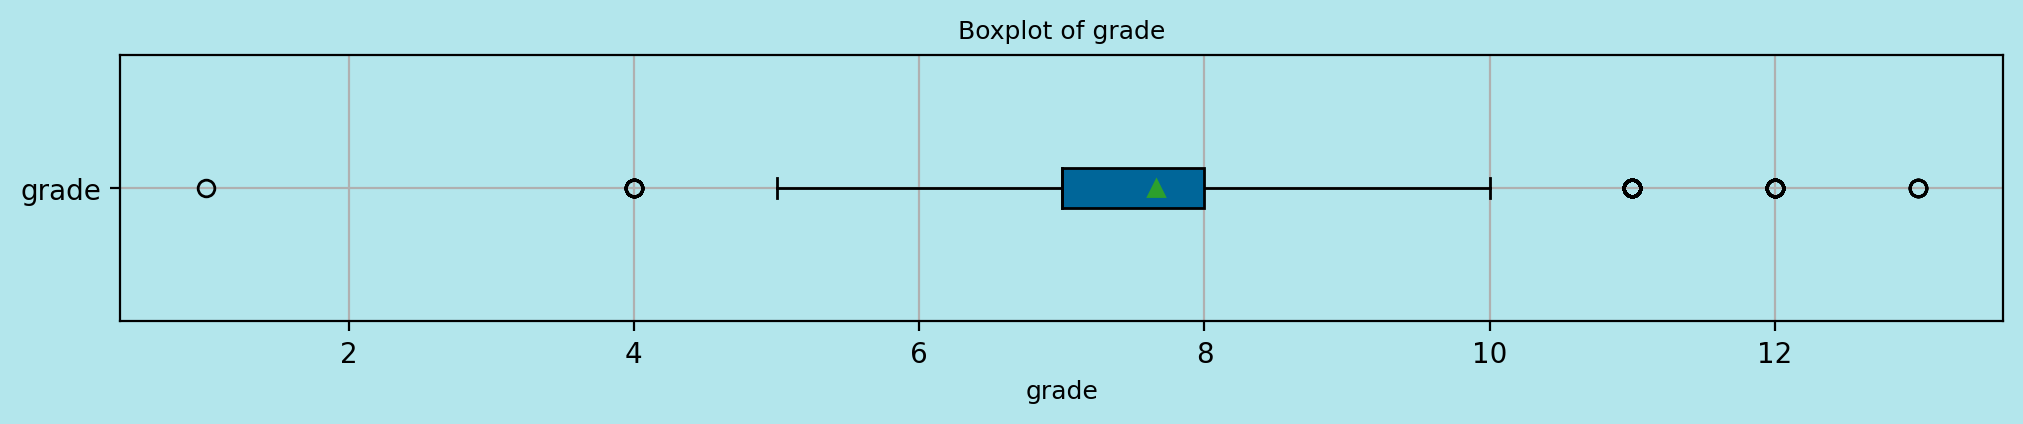

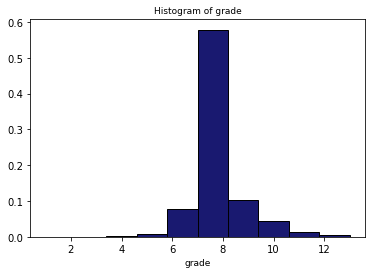

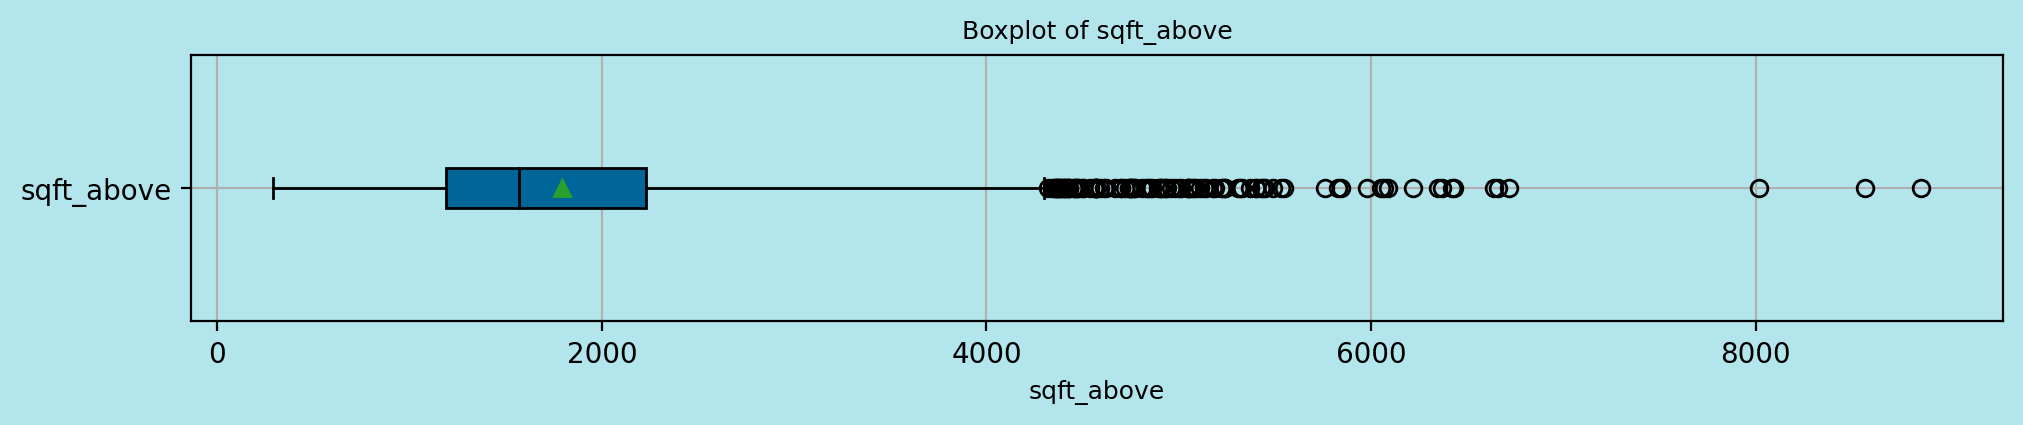

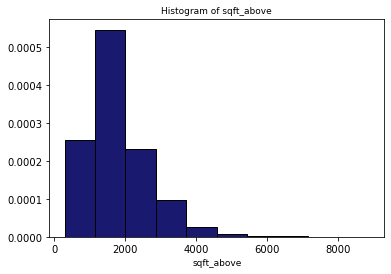

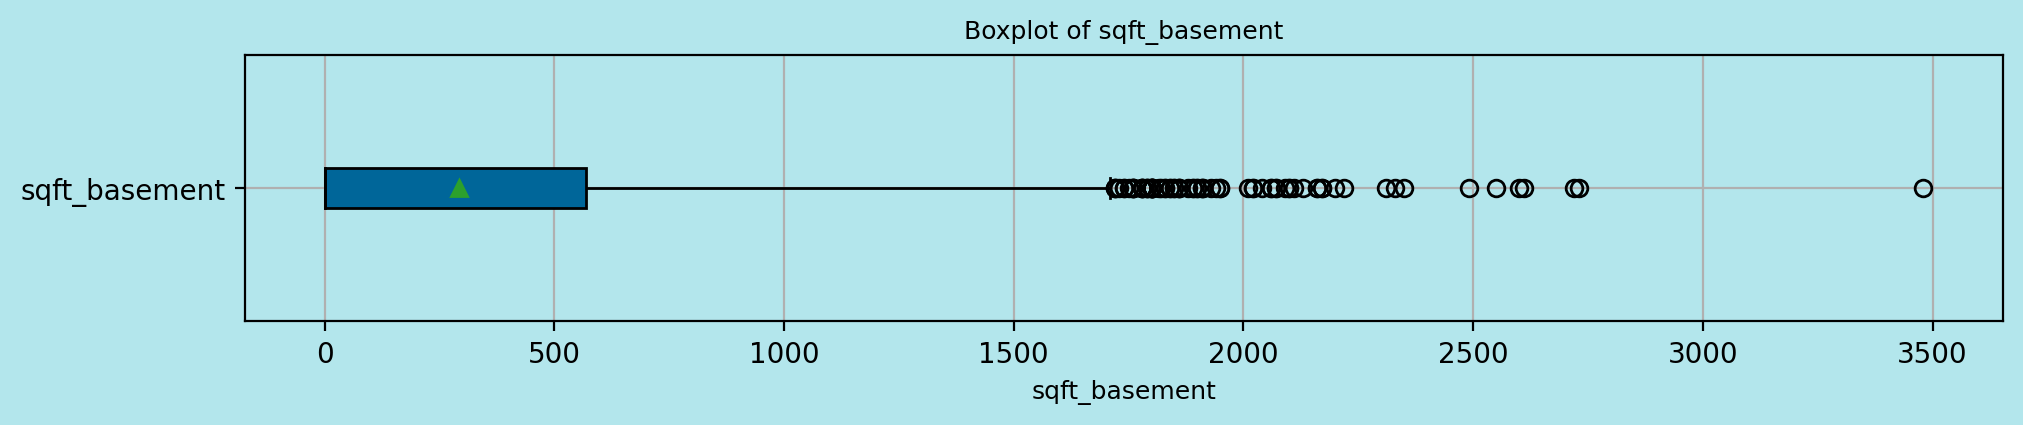

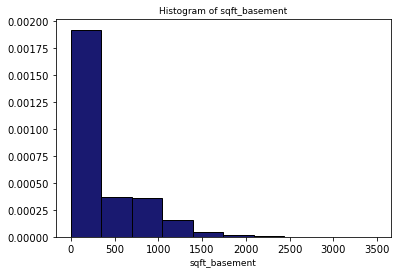

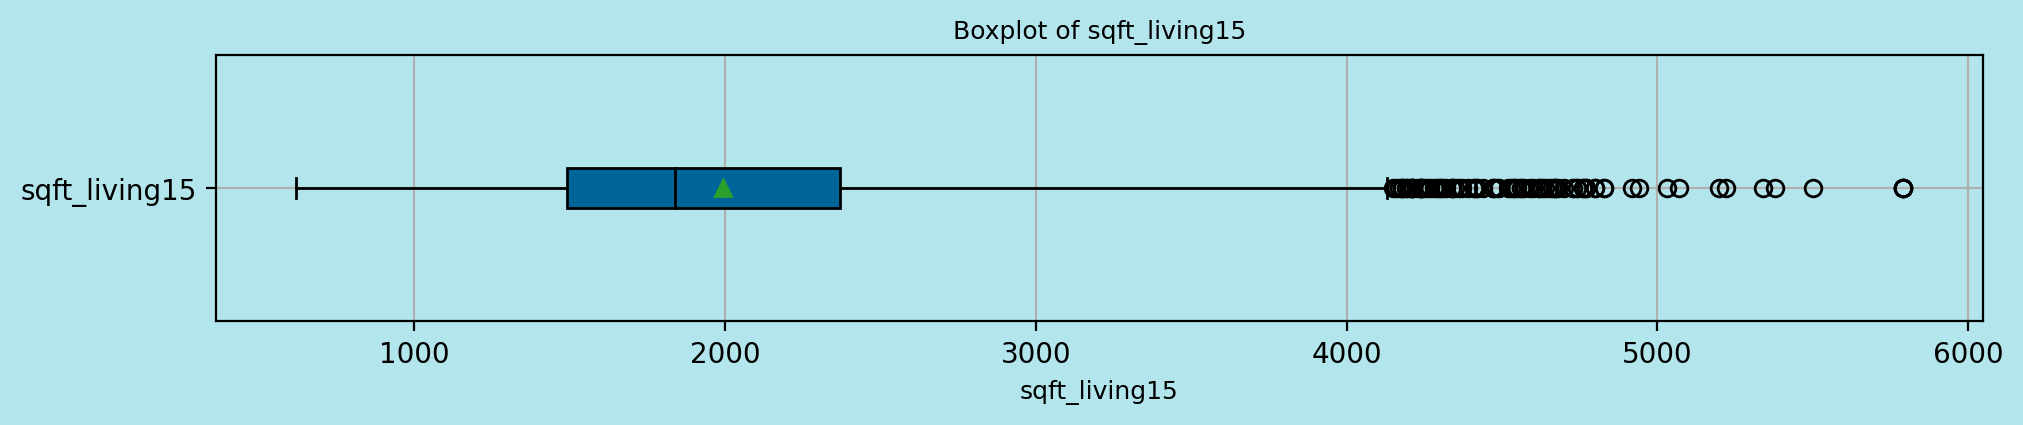

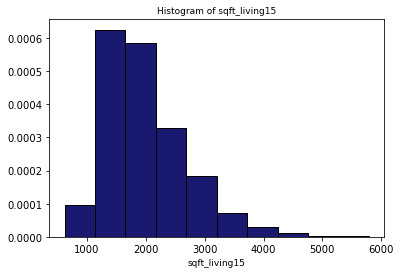

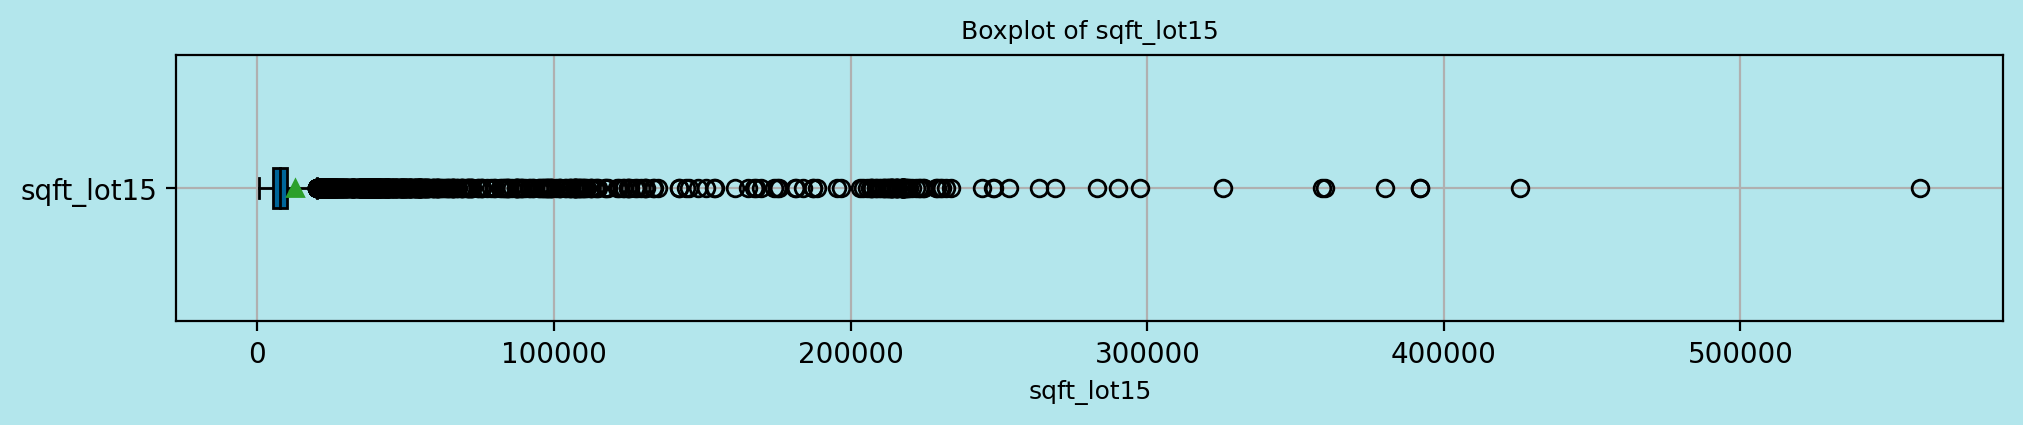

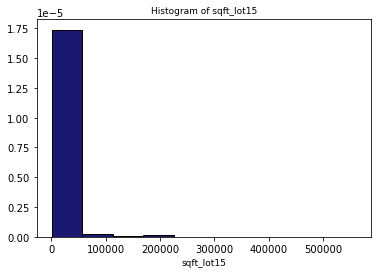

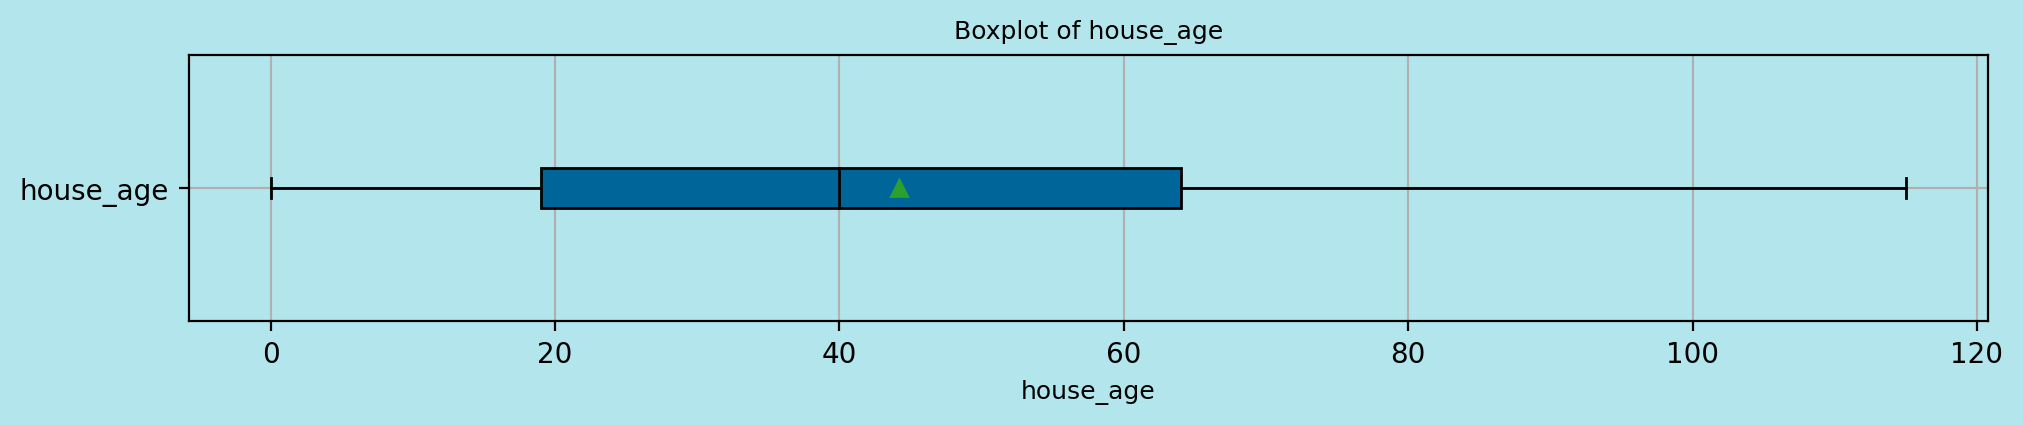

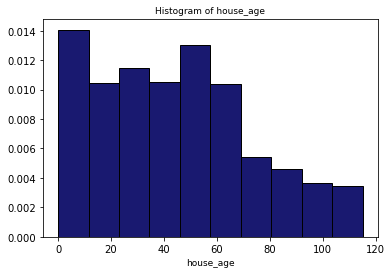

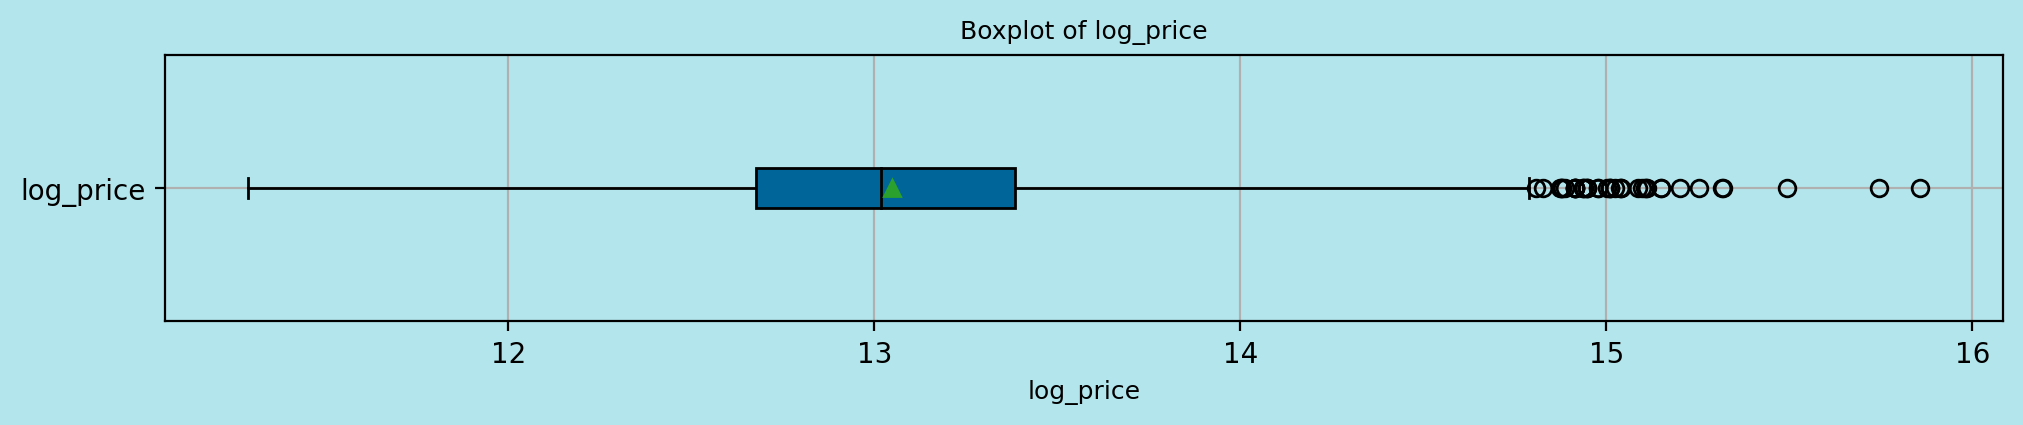

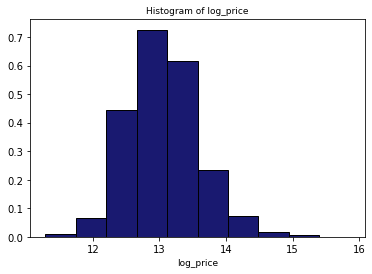

In [666]:
#We are using the graph we created for our final python assignment
import os
os.chdir("/Users/aanchalkhanna72/Downloads/")
from graphsave import *
Graph_v5(data)

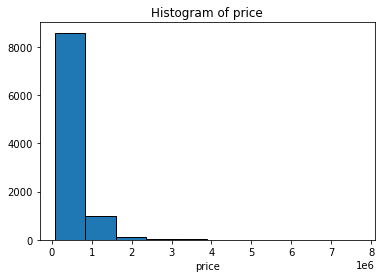

In [550]:
data.hist(column="price", grid=False, figsize=(6,4), edgecolor = 'black')

plt.xlabel('price')
plt.title('Histogram of price')

plt.show()

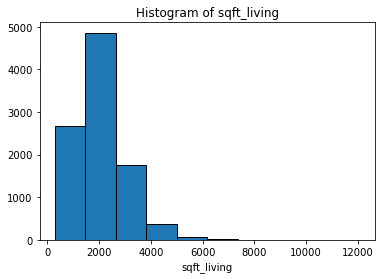

In [551]:
data.hist(column="sqft_living", grid=False, figsize=(6,4), edgecolor = 'black')

plt.xlabel('sqft_living')
plt.title('Histogram of sqft_living')

plt.show()

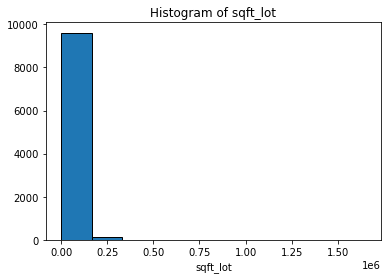

In [552]:
data.hist(column="sqft_lot", grid=False, figsize=(6,4), edgecolor = 'black')

plt.xlabel('sqft_lot')
plt.title('Histogram of sqft_lot')

plt.show()

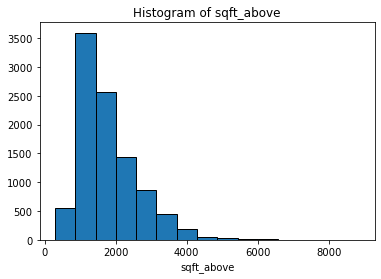

In [13]:
data.hist(column="sqft_above", grid=False, figsize=(6,4), bins=15, edgecolor = 'black')

plt.xlabel('sqft_above')
plt.title('Histogram of sqft_above')

plt.show()

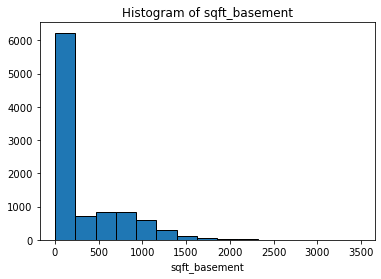

In [667]:
data.hist(column="sqft_basement", grid=False, figsize=(6,4), bins=15, edgecolor = 'black')

plt.xlabel('sqft_basement')
plt.title('Histogram of sqft_basement')

plt.show()

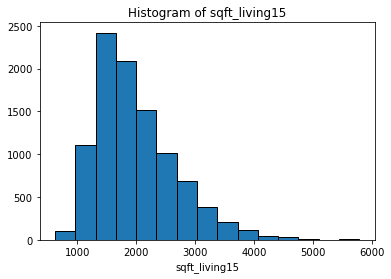

In [15]:
data.hist(column="sqft_living15", grid=False, figsize=(6,4), bins=15, edgecolor = 'black')

plt.xlabel('sqft_living15')
plt.title('Histogram of sqft_living15')

plt.show()

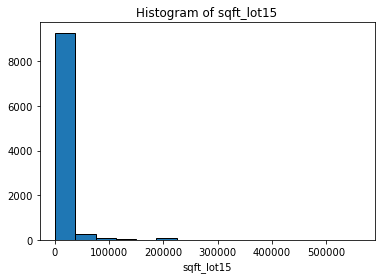

In [16]:
data.hist(column="sqft_lot15", grid=False, figsize=(6,4), bins=15, edgecolor = 'black')

plt.xlabel('sqft_lot15')
plt.title('Histogram of sqft_lot15')

plt.show()

### UNIVARIATE SUMMARY

9761 houses were sold in King County between the year 2014-15. Majority of the houses sold were not waterfront properties and had an adequate view. The average price of a house was  $542,735 with a large  variability in prices.  The median price was less  than  the mean price which indicated a right skew of price distribution. In other words, most of the house prices lay on the lower end of the prices spectrum. On an avg, houses sold had 2 bathrooms, 1-1.5 floors (indicating presence of attic  space), a grade of 7.5 on a scale of 1-13 and a living area of 2100 sq ft. Most houses didn't have basements.

75% of the houses had a living area less than 2570 sq ft, but alarmingly, the remaining 25% of the houses had a living  area between a wide range of 2570-12050 sq ft. There were many anomalies in the characteristics of the houses, which indicated either incorrect data collection or presence of outliers that were skewing the information we were seeing. The average lot size for houses was about  15000 sq ft, the minimum being 520 sq ft. 75% of the houses had a lot size of  less than 10.5k sq ft. Due to the pressence of  outliers, the mean here was being pulled up to a higher number. According  to the latest data collection in  2015, the avg lot size of the houses sold decreased from 2100  ssq ft to  1992 sqft for all quartiles. The oldest house was built in 1900 whereas the most recent house was built in 2014. 


#### SCOPE: QUESTIONS FOR BIVARIATE AND MULTIVARIATE ANALYSIS
1. Which pincode(lat/long) has the highest/lowest price?
2. Given that the number of bedroooms is 3 (avg)/lot size is 7642 sq ft(avg)/floors  is 1.5 (individually), what are the different house prices?
3. Year  built vs price  increase. Is there a premium to  be paid  by buyer  for older houses considering the architecture? See Heritage Homes
4. Price difference of Renovated  homes (code renovated  homes as 0-not renovated,1-renovated)
5. How are grades  determined? (linear regression can be done  on grades  too) What is the impact of higher grades on prices? Do certain areas/zipcodes get better grades?
6. What to do with  outliers?
7. Mapping lat/long to check if houses are in vicinity? What are the amenities nearby - schools, libraries, grocery stores, malls, etc.?
8. Check for  multicollinearity: condition, renovation; sqftliving:bedrooms
9. Check for Correlation: a. Basements and prices as basement usually has many amenitiess, home theatre,etc., 10. yr.built, zipcode, prices (some areas have more  heritage homes) relationship


###  Experiment:  Bivariate Analysis

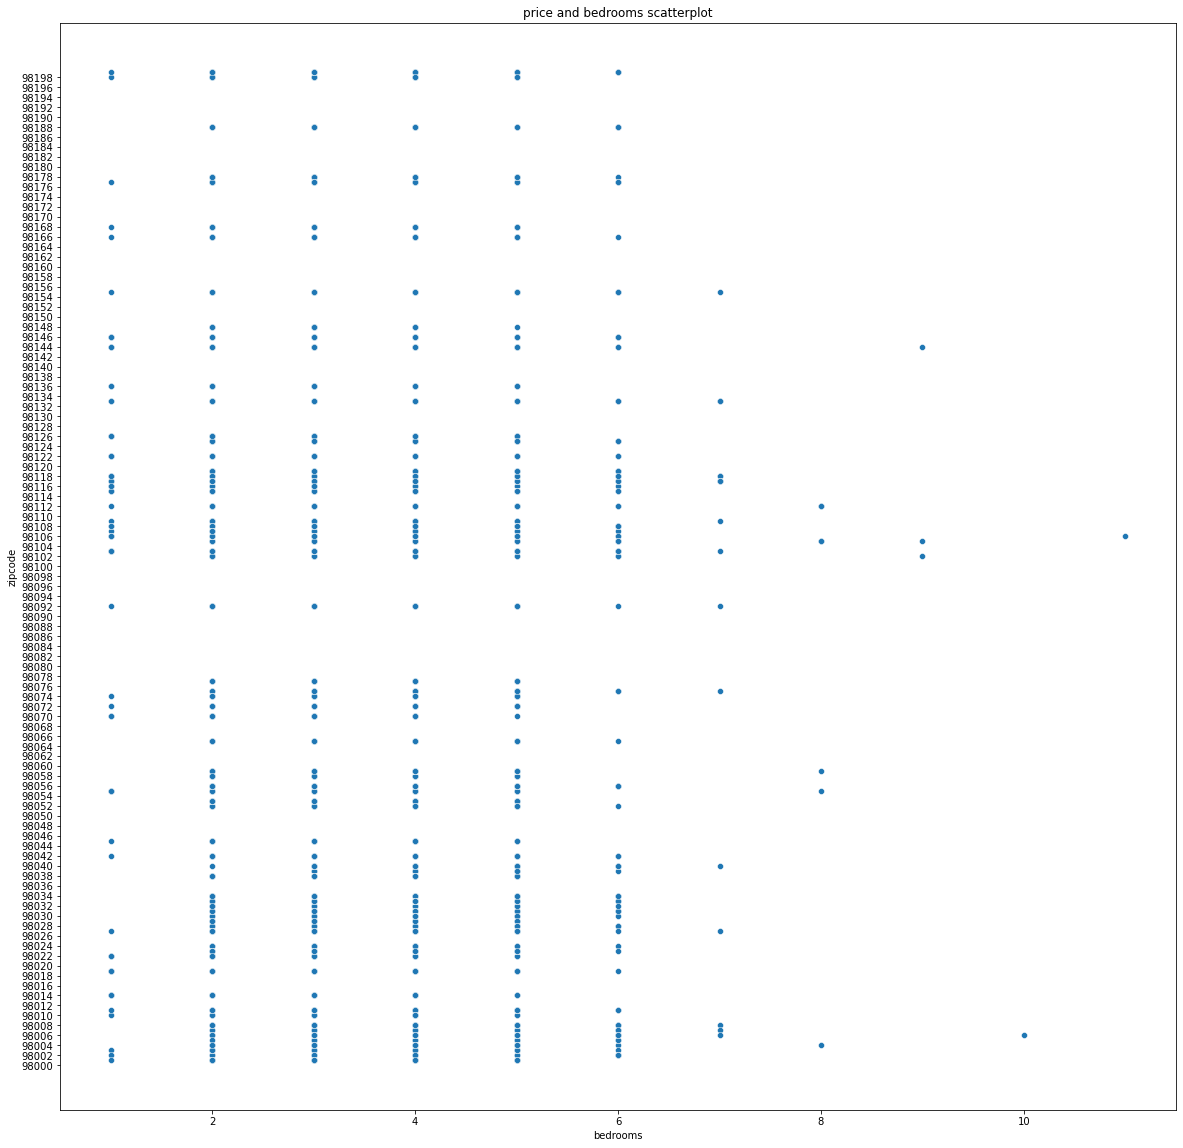

In [668]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='bedrooms', y='zipcode' , data=data,)
plt.yticks(np.arange(98000, 98200, 2))
plt.title('price and bedrooms scatterplot')
#plt.savefig('zipcode-vs-price-scatter.png')
plt.show()

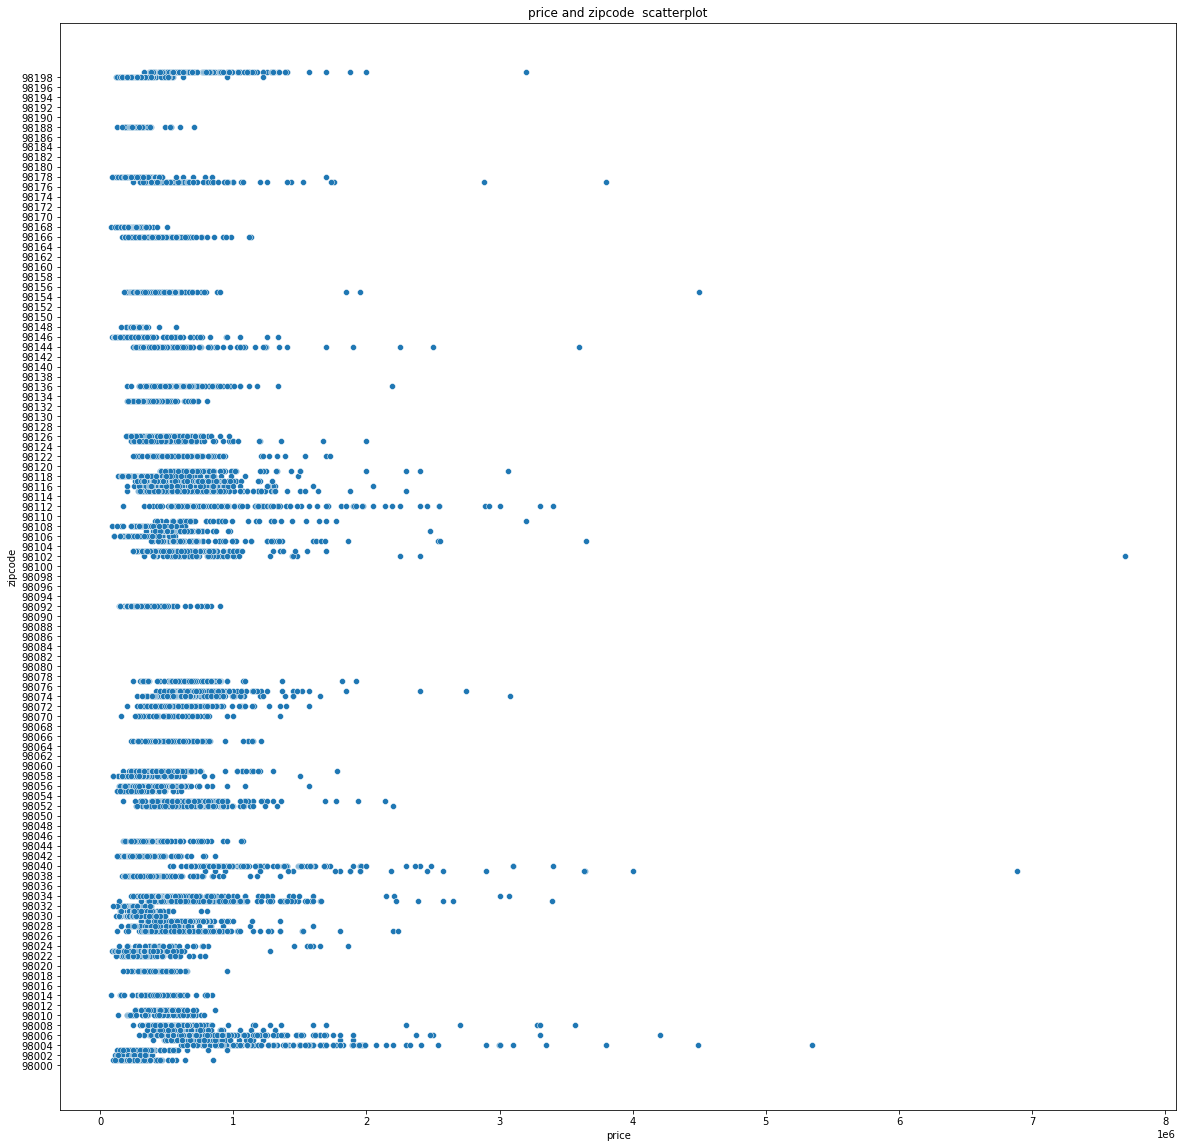

In [669]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='price', y='zipcode' , data=data,)
plt.yticks(np.arange(98000, 98200, 2))
plt.title('price and zipcode  scatterplot')
#plt.savefig('zipcode-vs-price-scatter.png')
plt.show()

In [670]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='price', y='bathrooms', data=data,)
plt.title('price and bathrooms scatterplot')
plt.show()

In [671]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='price', x='sqft_living' , data=data)
plt.title('price and sqft_living scatterplot')
plt.show()

In [672]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='price', y='floors' , data=data,)
plt.title('price and floors scatterplot')
plt.show()

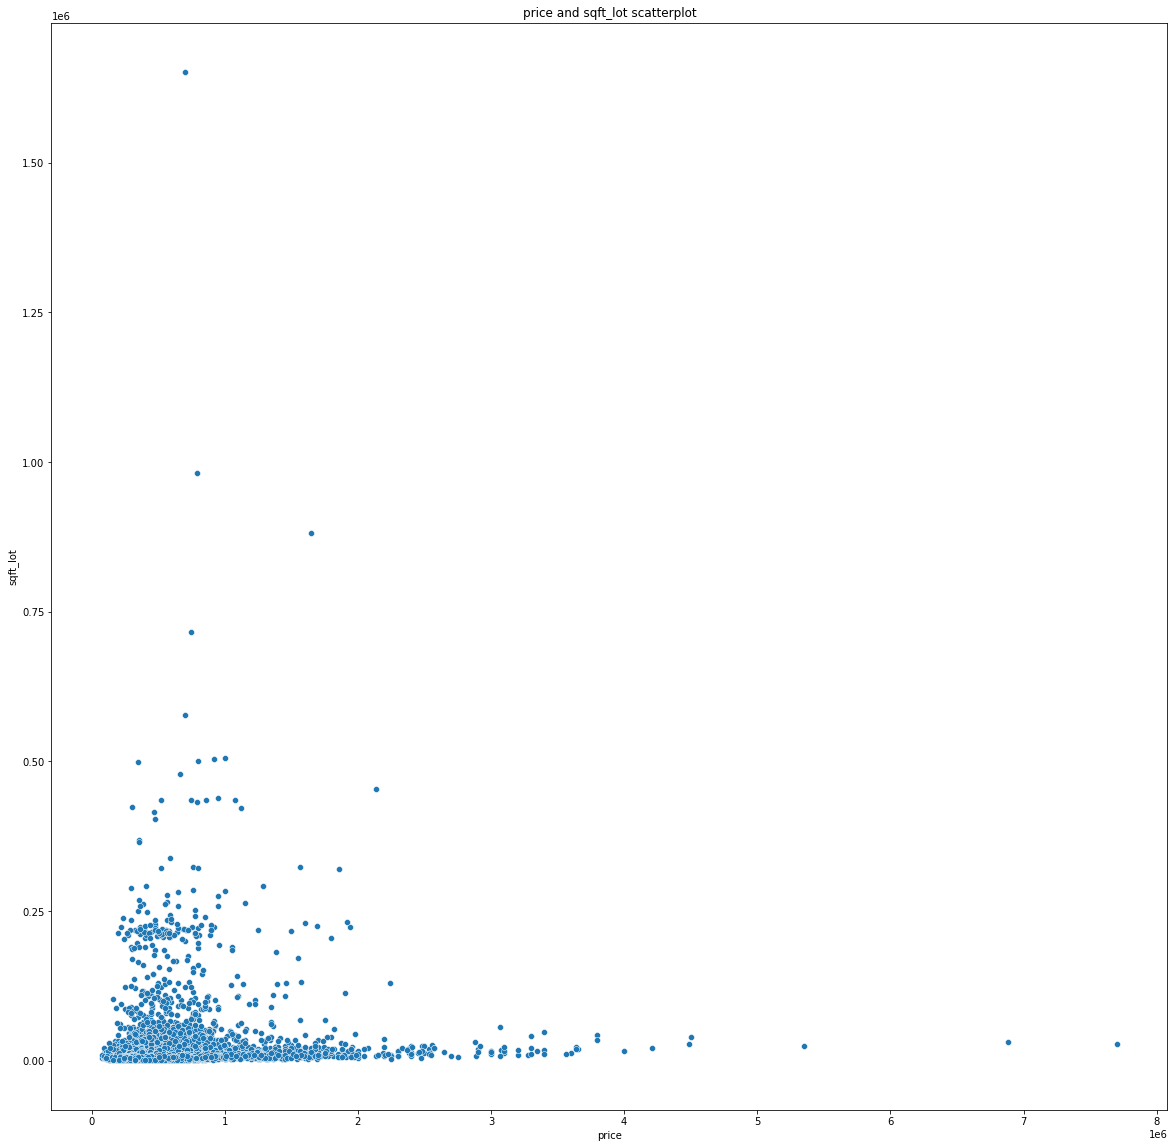

In [673]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='price', y='sqft_lot', data=data,)
plt.title('price and sqft_lot scatterplot')
plt.show()

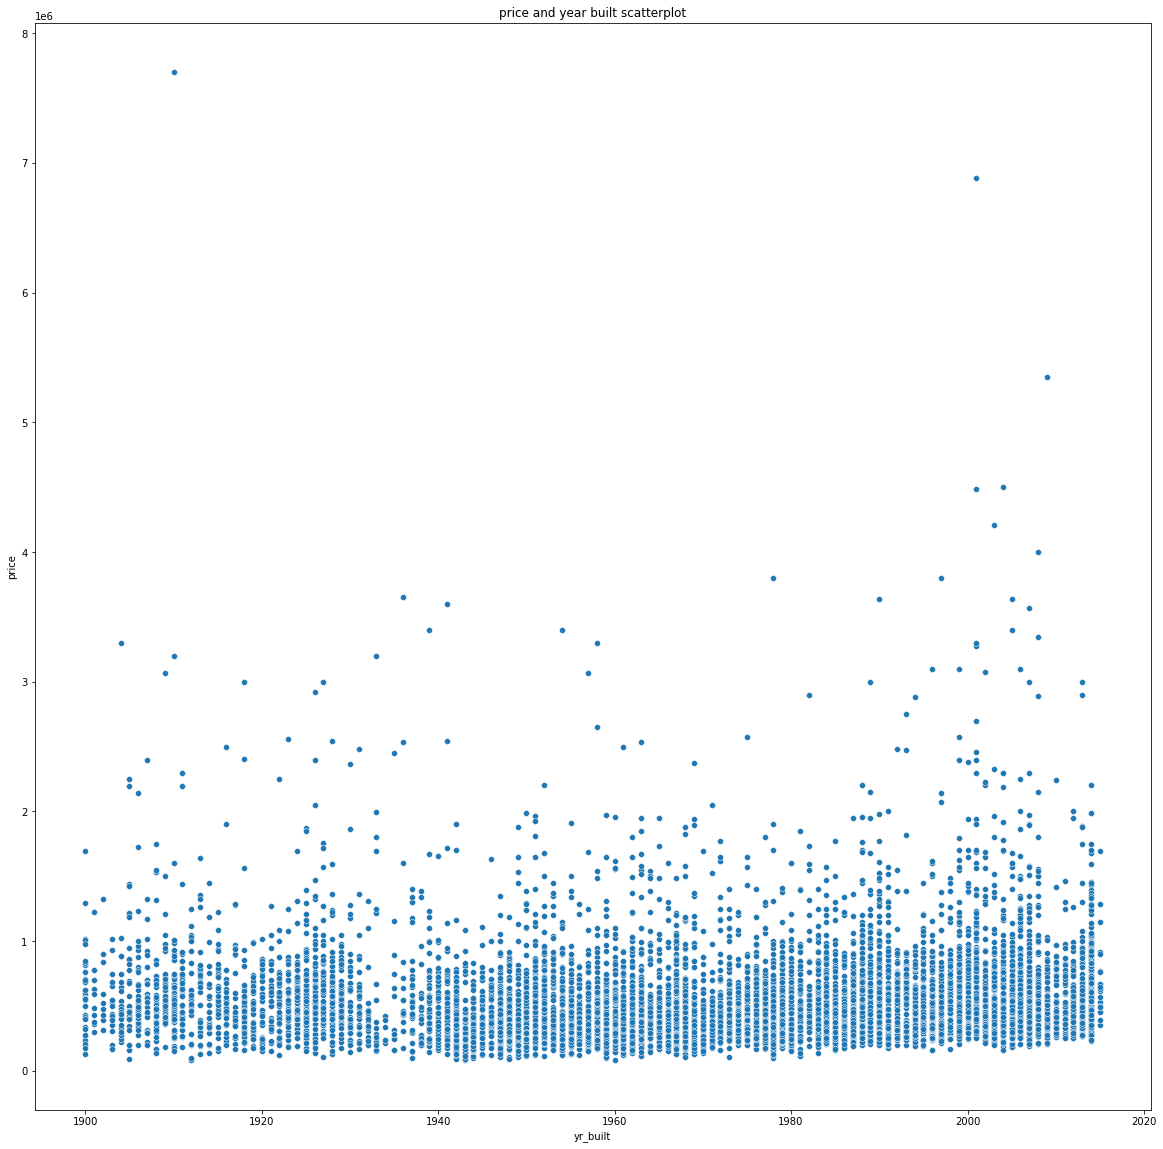

In [674]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='price', x='yr_built',data=data,)
plt.title('price and year built scatterplot')
plt.show()

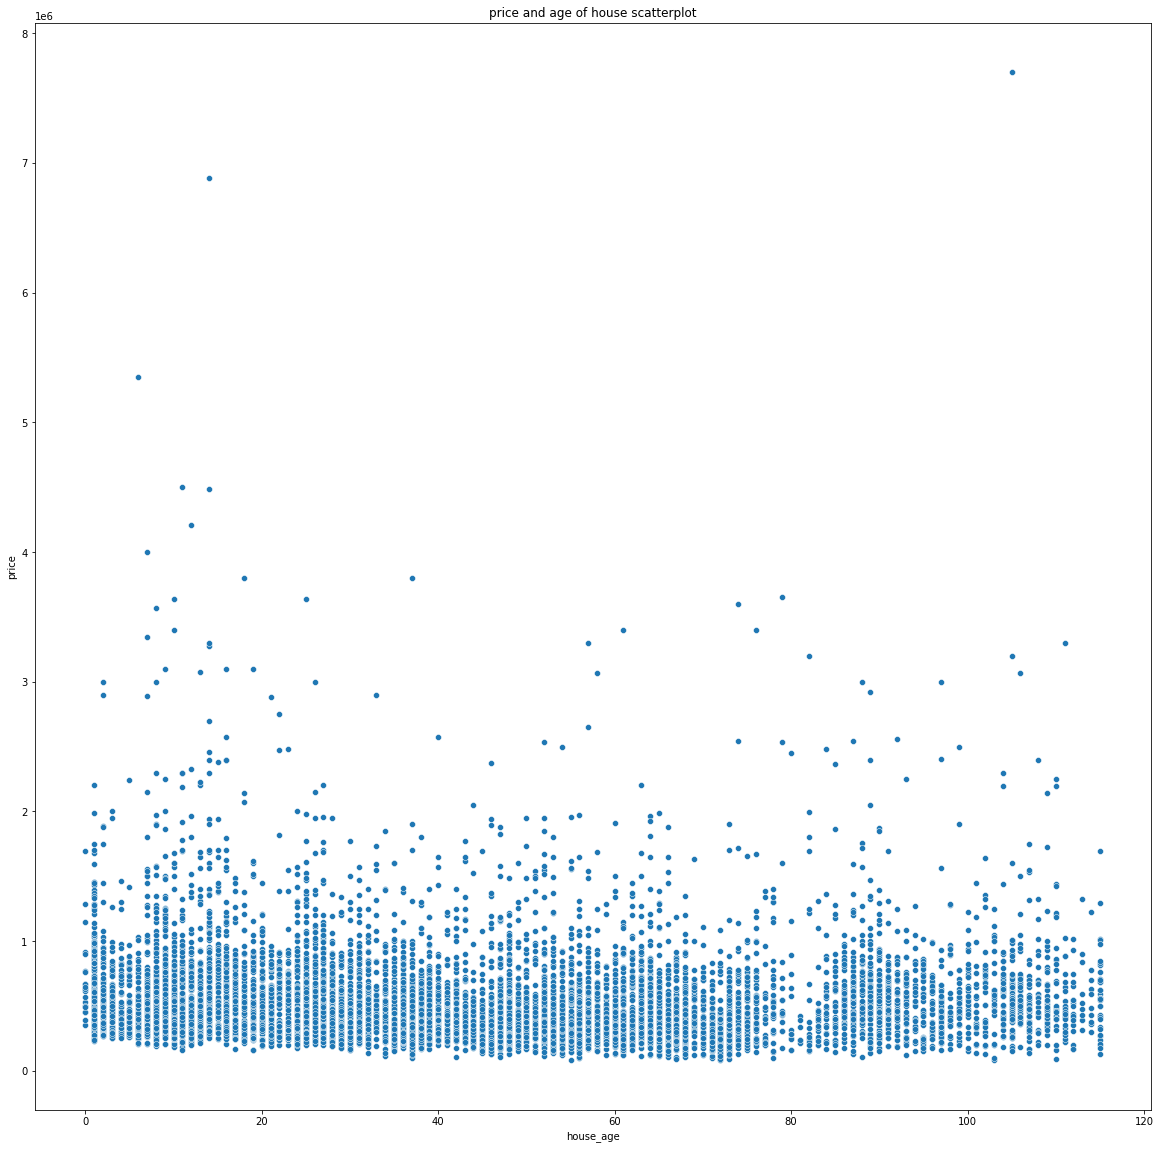

In [675]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='price',x='house_age' , data=data)
plt.title('price and age of house scatterplot')
plt.show()

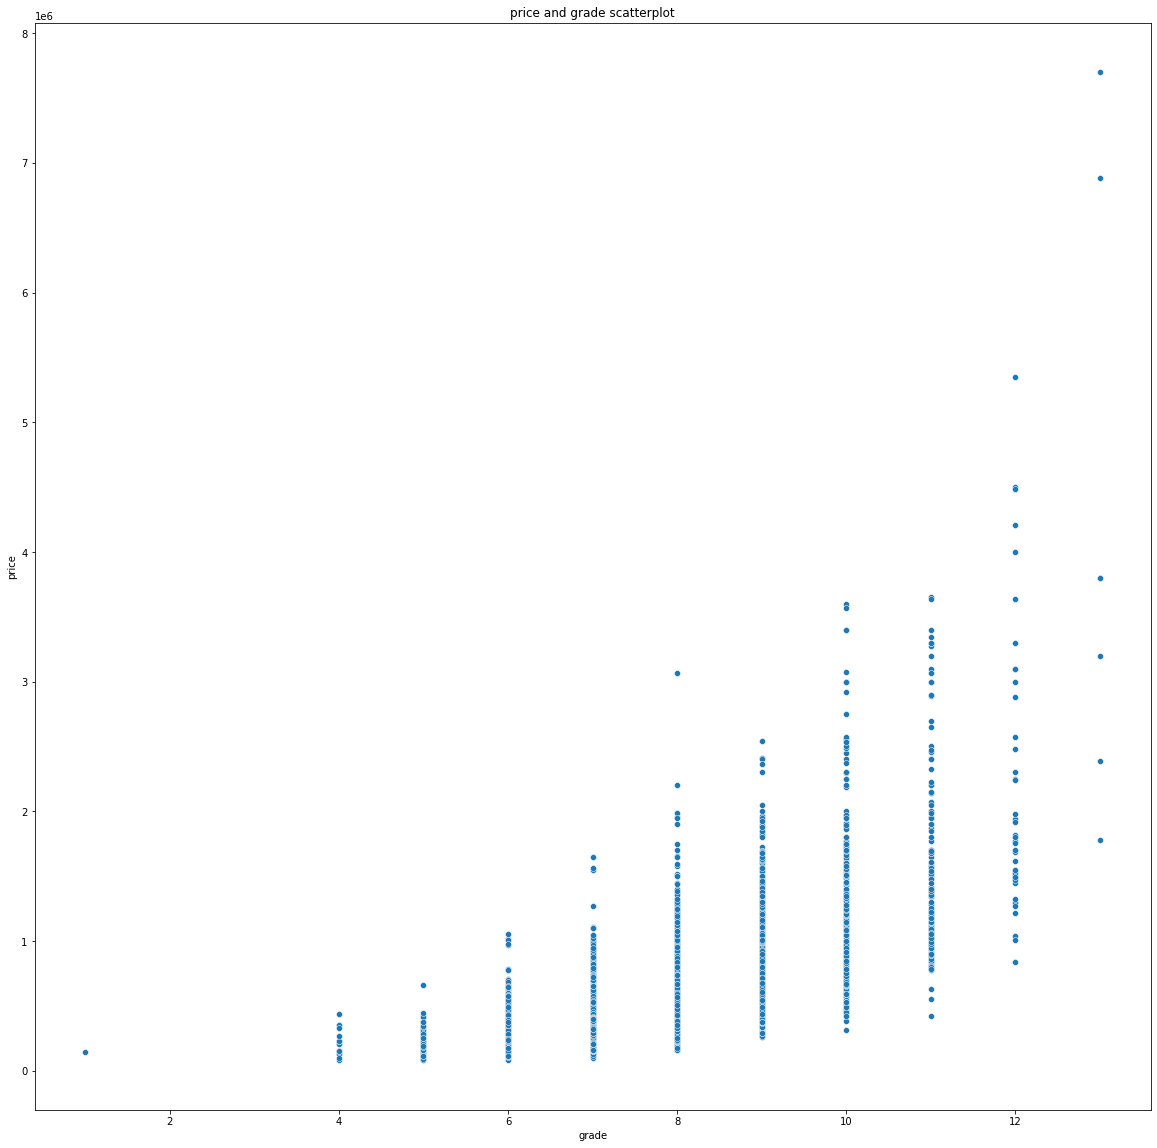

In [676]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='price',x='grade' , data=data)
plt.title('price and grade scatterplot')
plt.show()

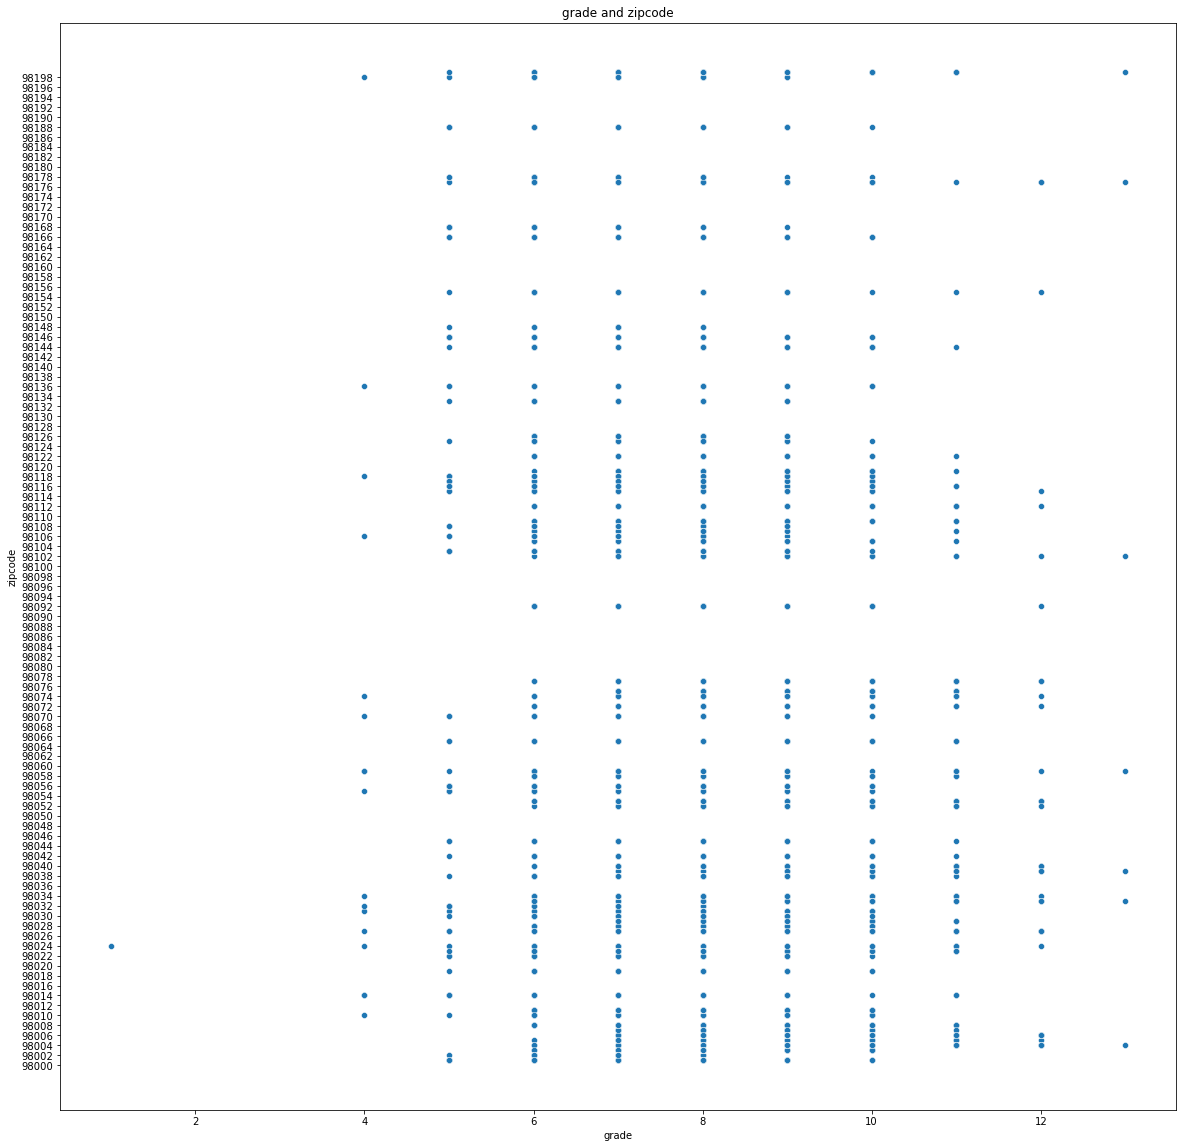

In [677]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='zipcode',x='grade' , data=data)
plt.yticks(np.arange(98000, 98200, 2))
plt.title('grade and zipcode')
plt.show()

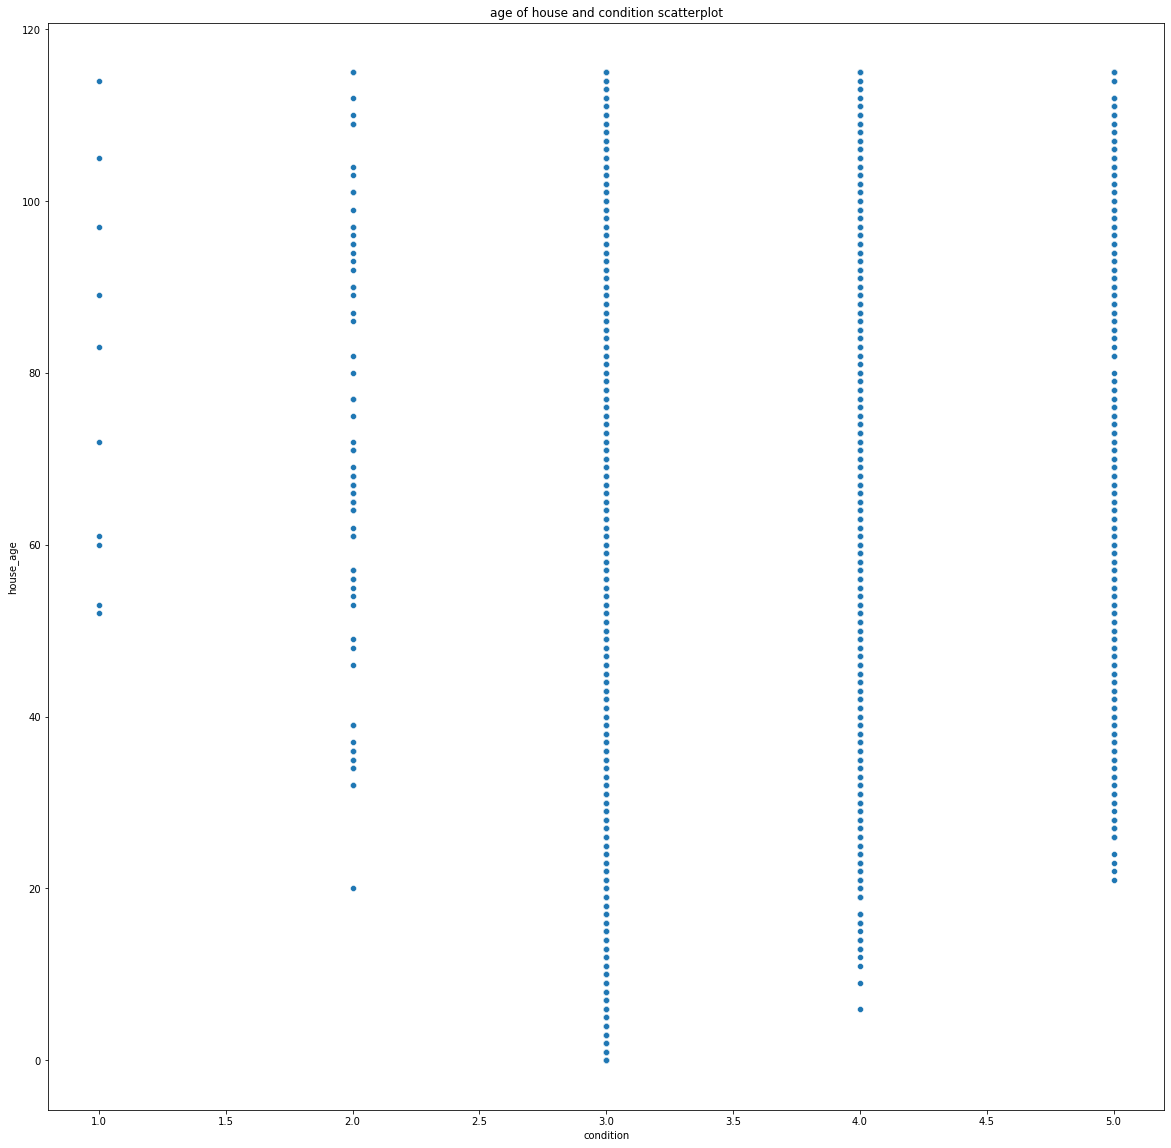

In [678]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='condition',y='house_age' , data=data)
plt.title('age of house and condition scatterplot')
plt.show()

In [565]:
#creating a new variable "house_age" 
house_age= 2015 - data['yr_built']

In [566]:
data.insert(21, 'house_age', house_age, True)

In [568]:
data.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.005972 -0.002571   0.005821    -0.007559 -0.130303   
price         -0.005972  1.000000  0.300808   0.527532     0.705052  0.094143   
bedrooms      -0.002571  0.300808  1.000000   0.506070     0.560989  0.028895   
bathrooms      0.005821  0.527532  0.506070   1.000000     0.758930  0.079435   
sqft_living   -0.007559  0.705052  0.560989   0.758930     1.000000  0.162786   
sqft_lot      -0.130303  0.094143  0.028895   0.079435     0.162786  1.000000   
floors         0.007793  0.262954  0.181042   0.501899     0.366219 -0.003543   
waterfront     0.000834  0.274977 -0.006803   0.061483     0.097203  0.029420   
view           0.023355  0.399658  0.079863   0.182988     0.285735  0.099221   
condition     -0.015321  0.044732  0.036135  -0.115382    -0.047938 -0.008722   
grade          0.012491  0.665567  0.342305   0.660925     0.764819  0.115611   
sqft_above    -0.006447  0.611453  0.462514   0.692911     0.878989  0.180913   
sqft_basement -0.003660  0.322383  0.301829   0.281433     0.435069 -0.000601   
yr_built       0.027053  0.051759  0.155102   0.499589     0.322723  0.054043   
yr_renovated  -0.024900  0.120472  0.018625   0.044756     0.043627  0.001219   
zipcode       -0.012130 -0.055629 -0.148339  -0.201454    -0.203761 -0.126091   
lat            0.009167  0.299280 -0.010547   0.018453     0.054830 -0.092245   
long           0.034395  0.023754  0.117168   0.217697     0.240170  0.224524   
sqft_living15 -0.001315  0.584807  0.376457   0.566076     0.758081  0.145285   
sqft_lot15    -0.137562  0.077943  0.018149   0.068722     0.163545  0.719922   
house_age     -0.027053 -0.051759 -0.155102  -0.499589    -0.322723 -0.054043   

                 floors  waterfront      view  condition  ...  sqft_above  \
id             0.007793    0.000834  0.023355  -0.015321  ...   -0.006447   
price          0.262954    0.274977  0.399658   0.044732  ...    0.611453   
bedrooms       0.181042   -0.006803  0.079863   0.036135  ...    0.462514   
bathrooms      0.501899    0.061483  0.182988  -0.115382  ...    0.692911   
sqft_living    0.366219    0.097203  0.285735  -0.047938  ...    0.878989   
sqft_lot      -0.003543    0.029420  0.099221  -0.008722  ...    0.180913   
floors         1.000000    0.022443  0.031938  -0.265390  ...    0.534801   
waterfront     0.022443    1.000000  0.402725   0.024030  ...    0.064297   
view           0.031938    0.402725  1.000000   0.059969  ...    0.170286   
condition     -0.265390    0.024030  0.059969   1.000000  ...   -0.153713   
grade          0.461545    0.088039  0.258123  -0.133313  ...    0.756226   
sqft_above     0.534801    0.064297  0.170286  -0.153713  ...    1.000000   
sqft_basement -0.242675    0.082214  0.277021   0.189828  ...   -0.046926   
yr_built       0.481926   -0.027010 -0.056361  -0.357396  ...    0.426642   
yr_renovated   0.013655    0.101684  0.109750  -0.055525  ...    0.014654   
zipcode       -0.064479    0.023656  0.075834   0.003410  ...   -0.264223   
lat            0.044827   -0.009410  0.005503  -0.017622  ...    0.002797   
long           0.134683   -0.039227 -0.074630  -0.106514  ...    0.343715   
sqft_living15  0.289238    0.097196  0.292435  -0.080423  ...    0.726505   
sqft_lot15    -0.013269    0.028499  0.079904   0.002253  ...    0.185507   
house_age     -0.481926    0.027010  0.056361   0.357396  ...   -0.426642   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
id                 -0.003660  0.027053     -0.024900 -0.012130  0.009167   
price               0.322383  0.051759      0.120472 -0.055629  0.299280   
bedrooms            0.301829  0.155102      0.018625 -0.148339 -0.010547   
bathrooms           0.281433  0.499589      0.044756 -0.201454  0.018453   
sqft_living         0.435069  0.322723      0.043627 -0.203761  0.054830   
sqft_lot           -0.000601  0.054043      0.001219 -0.126091 -0.092245   
floors     

<AxesSubplot:>

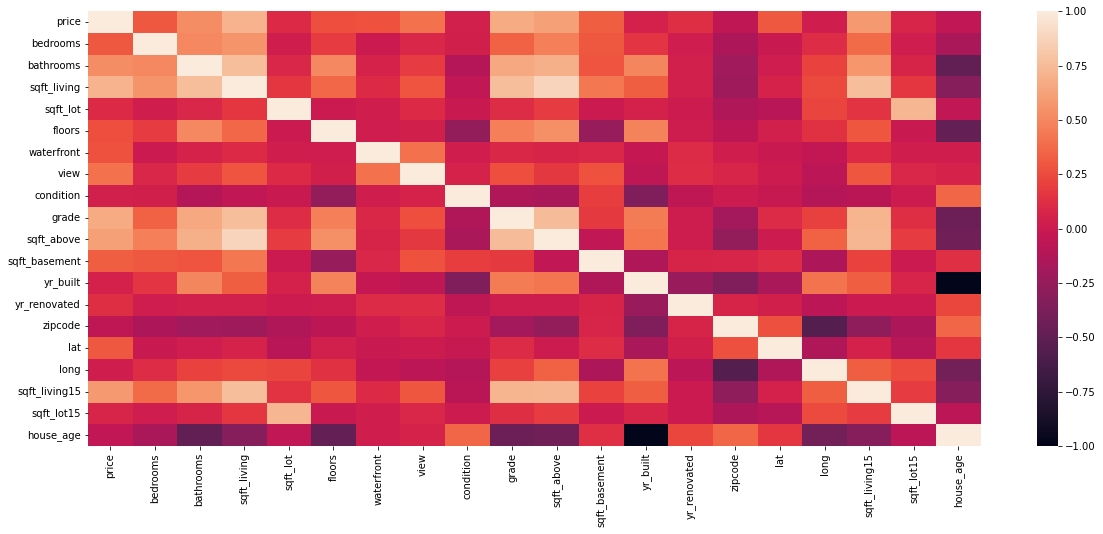

In [36]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr())

### BIVARIATE SUMMARY 
**ANSWERS TO QUESTIONS FOR BIVARIATE AND MULTIVARIATE ANALYSIS:**
1. Which pincode(lat/long) has the highest/lowest price?

Certain pincodes are associated with higher price range whereas some are associated with lower prices. The latter  category has lower variability and more consistent observations, whereas zipcodes with highly priced houses have houses in the lower or mid range as well. 

2. Do prices increase as number of rooms/bathrooms increases? Given that the number of bedroooms is 3 (avg), what are the different house prices?
Surprsingly, no. We notice that these two  variables have a low (linear) correlation of 0.30. Additionally, when we plotted a scatterplot for price and beddrooms, we noticed that for given number of bedrooms, there was a large  vavriability in prices. Some  outliers are present with high number of bedrooms but low prices, which is intriguing. 

On the other hand, bathrooms and  prices have a higher correlation of 0.52. Even in our boxplot, we are  able to notice that there is a ladder-like trend, inddicating that as number of bathrooms increase,  the price range also begins to increase. 

3. Given that the living size is 2100 sq ft(avg), what are the different house prices? 
As  hypothesized, there  is a  strong correlation between house prices and sqft living space. This is also visible in the scatterplot where prices seem to increase slowly (flatter slope) as sqft_living increases. There is less variability in prices at 2100 sq ft,  i.e., prices are in the lower range for these houses. 

4.  Correlation between lot size and prices
Contrary to our hypothesis, there is a really low, almost negligible, linear correlation between lot sizes and prices. This is counter-intuitive as our understanding was that  houses  with bigger lot sizes would cover more sqft area and therefore have higher prices. Perhaps this is dependent on other factors such as zipcode. 

5. Year  built vs price  increase. Is there a premium to  be paid  by buyer  for older houses considering the architecture? See Heritage Homes

To assess this, we created a variable called house_age which is the difference betweem 2015 and the year built. Our hypotheses is disproved as older houses aren't associated with higher prices. In fact, a small number of newer, modern houses are associated with higher prices, however, these could just  be outliers.  

6. Price difference of Renovated  homes (code renovated  homes as 0-not renovated,1-renovated)
Looking at average prices of renovated houses and non-renovated  houses in Excel, we find that the average price  of renovated  homes is higher (about 650k vs. 500k). We will be categorizing these into dummy variables during feature engineering.

7.  What is the impact of higher grades on prices? Do certain areas/zipcodes get better grades?
There is a high correlation between grades and prices (0.66). Higher grades are related with higher  prices. We cannot read  the correlation coeffiecient for zipcode and grades,  as the zipcode data is being read as numerical data.

8. Does having a waterfront increase  the price of the home?
Surprisingly,no. There is low correlation between prices and presence of waterfront.  


9. Check for  multicollinearity: condition, house_age; sqftliving:bedrooms
a.condition, house_age: low correlation (0.35)
b.sqftliving:bedrooms: moderately correlated (0.56)

10. Check for Correlation: 
a. Basements and prices (as basement usually has many amenitiess, home theatre,etc.): low correlation (0.30)
b. house_age, zipcode: unable to say as zipcode can't be handled numerically


### Experiment: Data Cleaning before Model Fittinng

As observed earlier, we found many outliers across the features, however, we chose to keep the outliers as they were large in number, and hence did not indicate incorrect data collection. However, there were a few observations  that we cleaned up as they had values which did not seem plausible considering its other features. For instance, there was a  house with  33 bedrooms with 1620 sqft  of living space and 6000 sqft  lot space. It had 1.75  bathrooms. Its other features (highlighted below) seem plausible so we decided to correct the bedrooms to 3  (Which is also  the  average number in our dataset).

In [569]:
#updating bedroom values for outliers/anomalies with average bedrooms
data[data.bedrooms==33]

id             date     price  bedrooms  bathrooms  sqft_living  \
7204  2402100895  20140625T000000  640000.0        33       1.75         1620   

      sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
7204      6000     1.0           0     0  ...        1040            580   

      yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
7204      1947             0    98103  47.6878 -122.331           1330   

      sqft_lot15  house_age  
7204        4700         68  

[1 rows x 22 columns]

In [570]:
#updating bedroom values for outliers/anomalies with average bedrooms where the remaining features are plausible
data.at[7204,'bedrooms'] = 3

In [571]:
data.at[7204,'bedrooms']

3

In [572]:
#updating bedroom values for outliers/anomalies with average bedrooms where the remaining features are plausible
data[data['bedrooms']==0]

id             date      price  bedrooms  bathrooms  \
2228  6896300380  20141002T000000   228000.0         0       1.00   
3177  2954400190  20140624T000000  1295650.0         0       0.00   
4472  3374500520  20150429T000000   355000.0         0       0.00   
4507  7849202190  20141223T000000   235000.0         0       0.00   
8338  1222029077  20141029T000000   265000.0         0       0.75   
8840  3980300371  20140926T000000   142000.0         0       0.00   

      sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
2228          390      5900     1.0           0     0  ...         390   
3177         4810     28008     2.0           0     0  ...        4810   
4472         2460      8049     2.0           0     0  ...        2460   
4507         1470      4800     2.0           0     0  ...        1470   
8338          384    213444     1.0           0     0  ...         384   
8840          290     20875     1.0           0     0  ...         290   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2228              0      1953             0    98118  47.5260 -122.261   
3177              0      1990             0    98053  47.6642 -122.069   
4472              0      1990             0    98031  47.4095 -122.168   
4507              0      1996             0    98065  47.5265 -121.828   
8338              0      2003             0    98070  47.4177 -122.491   
8840              0      1963             0    98024  47.5308 -121.888   

      sqft_living15  sqft_lot15  house_age  
2228           2170        6000         62  
3177           4740       35061         25  
4472           2520        8050         25  
4507           1060        7200         19  
8338           1920      224341         12  
8840           1620       22850         52  

[6 rows x 22 columns]

In [573]:
data.at[[8840,8338,2228,3177,4472,4507],'bedrooms'] = 3

In [574]:
data.at[[8840,3177,4472,4507],'bathrooms'] = 2

In [575]:
data.iloc[[8840,8338,2228,3177,4472,4507]]

id             date      price  bedrooms  bathrooms  \
8840  3980300371  20140926T000000   142000.0         3       2.00   
8338  1222029077  20141029T000000   265000.0         3       0.75   
2228  6896300380  20141002T000000   228000.0         3       1.00   
3177  2954400190  20140624T000000  1295650.0         3       2.00   
4472  3374500520  20150429T000000   355000.0         3       2.00   
4507  7849202190  20141223T000000   235000.0         3       2.00   

      sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
8840          290     20875     1.0           0     0  ...         290   
8338          384    213444     1.0           0     0  ...         384   
2228          390      5900     1.0           0     0  ...         390   
3177         4810     28008     2.0           0     0  ...        4810   
4472         2460      8049     2.0           0     0  ...        2460   
4507         1470      4800     2.0           0     0  ...        1470   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8840              0      1963             0    98024  47.5308 -121.888   
8338              0      2003             0    98070  47.4177 -122.491   
2228              0      1953             0    98118  47.5260 -122.261   
3177              0      1990             0    98053  47.6642 -122.069   
4472              0      1990             0    98031  47.4095 -122.168   
4507              0      1996             0    98065  47.5265 -121.828   

      sqft_living15  sqft_lot15  house_age  
8840           1620       22850         52  
8338           1920      224341         12  
2228           2170        6000         62  
3177           4740       35061         25  
4472           2520        8050         25  
4507           1060        7200         19  

[6 rows x 22 columns]

In [576]:
data.iloc[[8840,3177,4472,4507]]

id             date      price  bedrooms  bathrooms  \
8840  3980300371  20140926T000000   142000.0         3        2.0   
3177  2954400190  20140624T000000  1295650.0         3        2.0   
4472  3374500520  20150429T000000   355000.0         3        2.0   
4507  7849202190  20141223T000000   235000.0         3        2.0   

      sqft_living  sqft_lot  floors  waterfront  view  ...  sqft_above  \
8840          290     20875     1.0           0     0  ...         290   
3177         4810     28008     2.0           0     0  ...        4810   
4472         2460      8049     2.0           0     0  ...        2460   
4507         1470      4800     2.0           0     0  ...        1470   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8840              0      1963             0    98024  47.5308 -121.888   
3177              0      1990             0    98053  47.6642 -122.069   
4472              0      1990             0    98031  47.4095 -122.168   
4507              0      1996             0    98065  47.5265 -121.828   

      sqft_living15  sqft_lot15  house_age  
8840           1620       22850         52  
3177           4740       35061         25  
4472           2520        8050         25  
4507           1060        7200         19  

[4 rows x 22 columns]

In [577]:
np.mean(data[data['bathrooms']==0.75])

/Users/aanchalkhanna72/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


id               4.242974e+09
price            3.071554e+05
bedrooms         2.027027e+00
bathrooms        7.500000e-01
sqft_living      8.844865e+02
sqft_lot         1.879851e+04
floors           1.094595e+00
waterfront       8.108108e-02
view             4.864865e-01
condition        3.567568e+00
grade            5.594595e+00
sqft_above       8.369189e+02
sqft_basement    4.756757e+01
yr_built         1.945595e+03
yr_renovated     1.610811e+02
zipcode          9.808549e+04
lat              4.756632e+01
long            -1.222142e+02
sqft_living15    1.461622e+03
sqft_lot15       2.470692e+04
house_age        6.940541e+01
dtype: float64

In [578]:
np.mean(data[data['bathrooms']==1])

id               4.406702e+09
price            3.444786e+05
bedrooms         2.631246e+00
bathrooms        1.000000e+00
sqft_living      1.167804e+03
sqft_lot         1.228731e+04
floors           1.108558e+00
waterfront       2.871913e-03
view             1.056864e-01
condition        3.454337e+00
grade            6.567490e+00
sqft_above       1.089214e+03
sqft_basement    7.858989e+01
yr_built         1.944414e+03
yr_renovated     6.723492e+01
zipcode          9.810055e+04
lat              4.756491e+01
long            -1.222709e+02
sqft_living15    1.450148e+03
sqft_lot15       1.044945e+04
house_age        7.058587e+01
dtype: float64

In [579]:
#updating to 2 rooms as the avg bedrooms of houses with 1 and 0.75 bathrooms are 2.63 and 2.02 respectively
data.at[[8338,2228],'bedrooms']=2

In [580]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_age'],
      dtype='object')

### Experiment: Initial Decision Tree Model Fitting Step (without Feature engineering)

In [581]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from  sklearn import tree

#### Trial Model 1

In [679]:
#We chose these variables because they had highest correlation with house prices 
X_train=data[["sqft_living","grade","bathrooms"]]
y_train=data[["price"]]

In [680]:
# Train-Validate Split

In [681]:
#function test-train split
from sklearn.model_selection import  train_test_split

In [682]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X_train, y_train, test_size=0.25)

In [683]:
len(X_train), len(X_valid), len(y_train), len(y_valid)

(7320, 2441, 7320, 2441)

In [684]:
# Fitting a Regression tree Model

In [685]:
#Set up model
reg_tree=DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)

In [686]:
y_pred=reg_tree.predict(X_valid)

In [687]:
y_valid=np.array(y_valid)

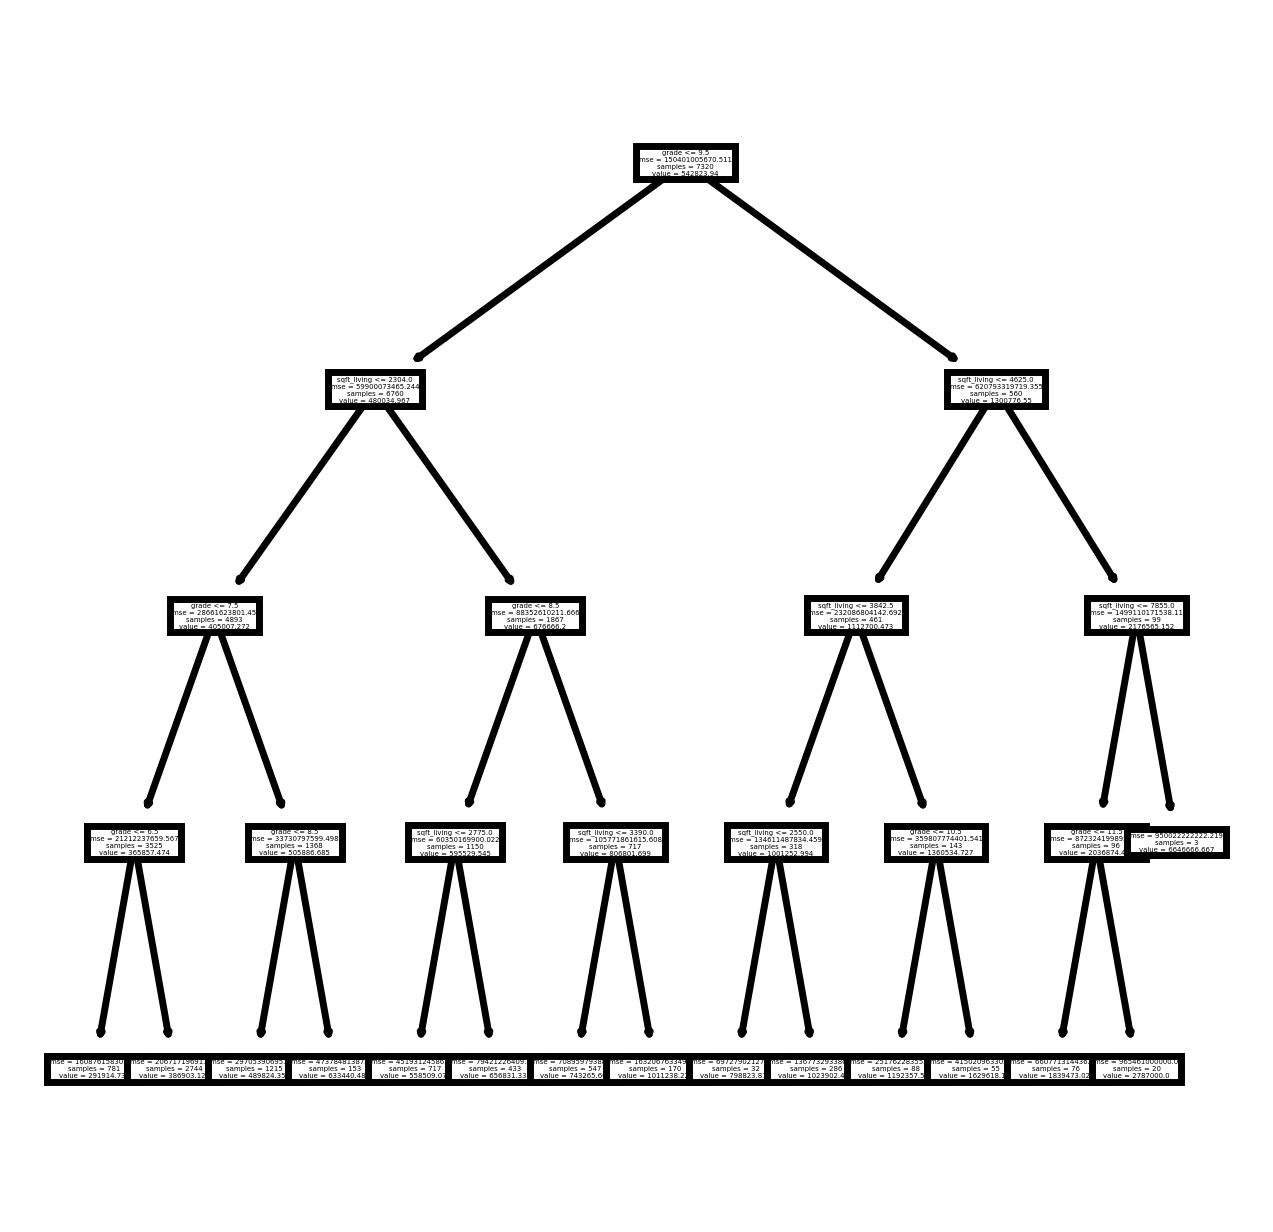

In [61]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('Model1.jpeg')
plt.show()

In [ ]:
# Calculating Error metrics (RMSE, MAPE) and R**2

In [688]:
# RMSE (Root Mean Squared Error)
np.sqrt(np.mean((y_valid - y_pred)**2))

488102.29265591624

In [689]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

65.31893216689826

#### SCOPE: In this model, we notice that grades, sqft_living are the 2 variables where the first few splits take place. Most of the  stem nodes have  these  variables. The MAPE shows that  on  ann average, the predicted values are away from the actual values by  65%, which is a high  number.  We would like to add 2 new predictors 'sqft_lot','house_age', which we  believe will bring down the error rate. We chose these  variables because we assumed  that  a higher  lot size  would indicate a  higher total sq ft area, thereby increasing the house price. Additionally, although house age doesn't have a linear correlation with price, we believe that older houses will have a lower prices and vice versa. 

### Experiment: Second Trial  (following the  same steps for all  consecutive  trials)


In [584]:
# Setting Predictors and Target Variable for Trial 2

X_train = data[[ 'sqft_living', 'grade', 'bathrooms','sqft_lot', 'house_age'] ]
y_train= data.price

In [585]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [586]:
len(X_train), len(X_valid)

(7320, 2441)

In [67]:
# Fitting a Regression tree Model

reg_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)

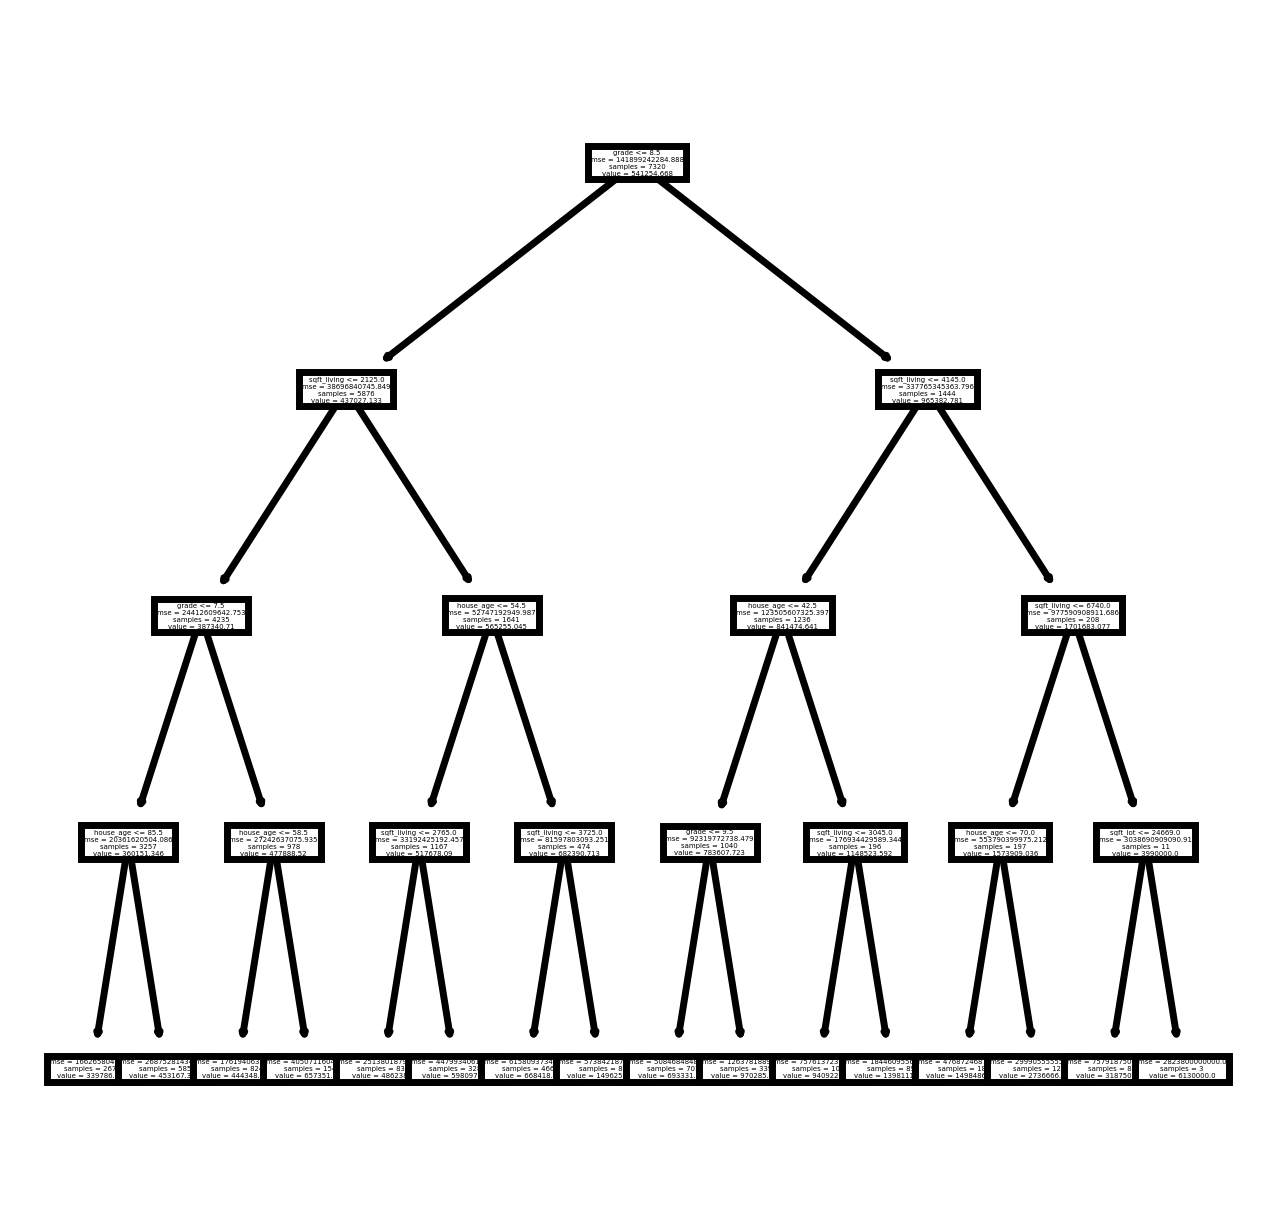

In [68]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('Model2.jpeg')
plt.show()

In [69]:
y_pred = reg_tree.predict(X_valid)
y_pred

array([ 339786.69086826, 1498486.91891892,  453167.34358974, ...,
       1498486.91891892,  339786.69086826,  693331.2767475 ])

In [70]:
y_valid=np.array(y_valid)

In [71]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))


298427.7049219091

In [72]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

31.478935876953866

#### SCOPE: In this model, we notice a  drastic change in MAPE. The predicted values are away from the actual values by 31.4%. In the decision tree, we see that bathrooms is not considered for splits and it has been  pushed  out of the tree altogether. We can say that the variable  "bathrooms" is not as important for  determining prices. We wanted to check the variable 'bedrooms' because there  was no collinearity between bedrooms and house prices (stated in univariate analysis). 

### Experiment: Third Trial 

In [587]:
# Setting Predictors and Target Variable for Trial 3

X_train = data[['bathrooms', 'sqft_living', 'grade', 'sqft_lot','house_age','bedrooms'] ]
y_train = data.price

In [588]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [152]:
# Fitting a Regression tree Model
reg_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)

In [153]:
y_pred = reg_tree.predict(X_valid)
y_pred

array([ 339787.43937126, 1497505.45945946,  453174.60854701, ...,
       1497505.45945946,  339787.43937126,  693193.15977175])

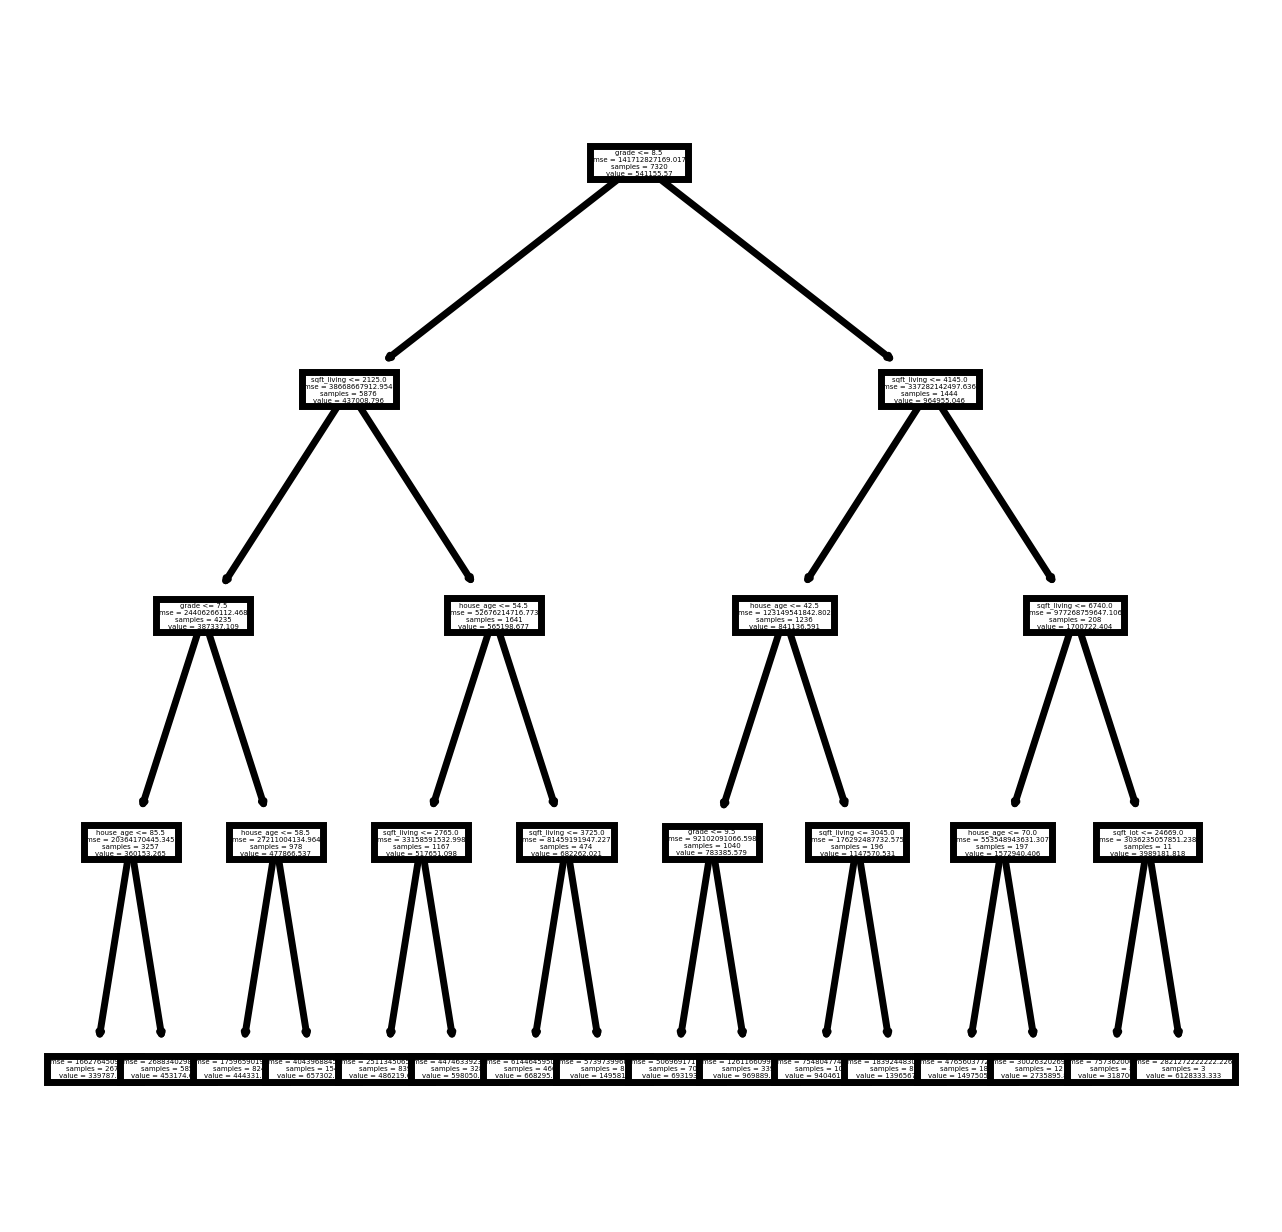

In [154]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('Model3.jpeg')
plt.show()

In [147]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

298291.9600263068

In [148]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

31.473704427013686

#### SCOPE: In this model, we notice a  negligible change in MAPE. The predicted values are away from the actual values by 31.4%. In the decision tree, we see again that only house_age,sqft_living and grade are considered for splits. We wonder about the relevance of the additional variables added to the model. We want to now  add 'condition' and 'floors' variables to the model because our intuition is that a potential housebuyer would pay more for a house with additional floors (and living space) as well as a house in  better condition.

### Fourth Trial

In [589]:
# Setting Predictors and Target Variable for Trial 4

X_train = data[['sqft_living', 'grade','sqft_lot','bedrooms','bathrooms','condition','floors'] ]
y_train = data.price

In [590]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [591]:
# Fitting a Regression tree Model
reg_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=3)

In [198]:
y_pred = reg_tree.predict(X_valid)
y_pred

array([ 380576.98880895, 1159354.54545455,  380576.98880895, ...,
       1691880.13071895,  380576.98880895,  936179.92890995])

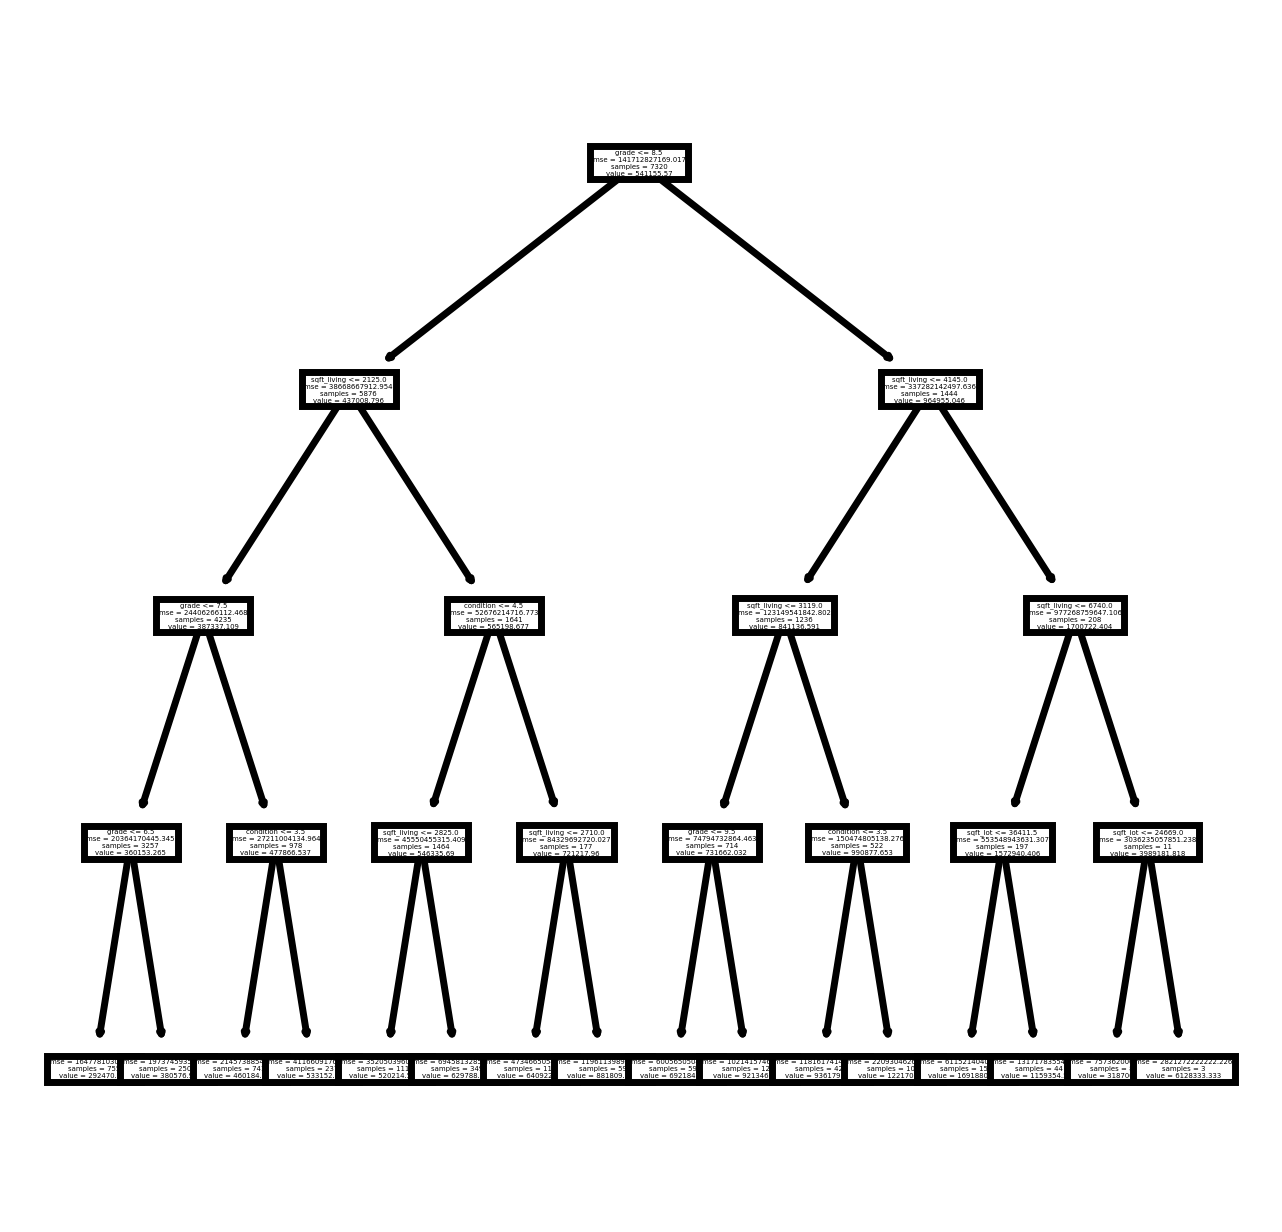

In [201]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('Model4.jpeg')
plt.show()

In [203]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

311736.2567674616

In [204]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

32.939684242477156

#### SCOPE: In this model, we notice an increase in MAPE. The predicted values are away from the actual values by 32.9%. We notice that the  variable "condition" is being  used for the purpose of splitting, whereas bedrooms and bathrooms continue  to be left out of the decision tree, thereby confirming the irrelevance of  these variables. Presence of  a water  body and having a good view potentially increases the price of house.

### Experiment: Fifth Trial

In [592]:
# Setting Predictors and Target Variable for Trial 5
X_train = data[['sqft_living', 'house_age', 'grade', 'floors','sqft_lot','condition','waterfront','view'] ]
y_train = data.price

In [593]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [594]:
# Fitting a Regression tree Model
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

In [214]:
y_pred = reg_tree.predict(X_valid)
y_pred


array([ 357513.06086142, 3064263.63636364,  515179.58469945, ...,
       1392935.56213018,  357513.06086142,  810088.66346154])

In [ ]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('Model5.jpeg')
plt.show()

In [215]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

281301.5438071986

In [216]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

29.257111740296548

#### SCOPE: We see a drop in MAPE. Next, we want to remove "sqft_living" and replace it with "sqft_above" to see if it changes the MAPE. We asume that sqft_above is a proxy for sqft_living as it also represents  the size of the living space. 

### Sixth Trial

In [595]:
X_train = data[['floors','sqft_above','grade', 'condition','waterfront','view','sqft_lot',
               'house_age'] ]
y_train = data.price

In [596]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [597]:
len(X_train),len(X_valid)

(7320, 2441)

In [220]:
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

In [ ]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('Model6.jpeg')
plt.show()

In [221]:
y_pred = reg_tree.predict(X_valid)
y_pred


array([ 358408.38762687, 2372075.29411765,  502926.14527027, ...,
        954810.67391304,  454871.71128107,  695659.46078431])

In [222]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

234434.4484495801

In [223]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

29.001828136662816

#### SCOPE: We see a drop in MAPE. Next, we want to add "sqft_basement" to see if it changes the MAPE. We asume that sqft_basement, in addition to sqft_living, is a better proxy for sqft_living as it  represents  the 'total' size of the living space. We also added bedrooms to see if it would make any difference, although there is no logical reason for  adding it over and above sqft_living.

### Experiment: Seventh Trial

In [598]:
X_train = data[['floors','sqft_above','grade', 'condition','waterfront','view','sqft_lot',
               'sqft_basement','house_age','bedrooms']]
y_train = data.price

In [599]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25,  random_state=10)

In [600]:
reg_tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

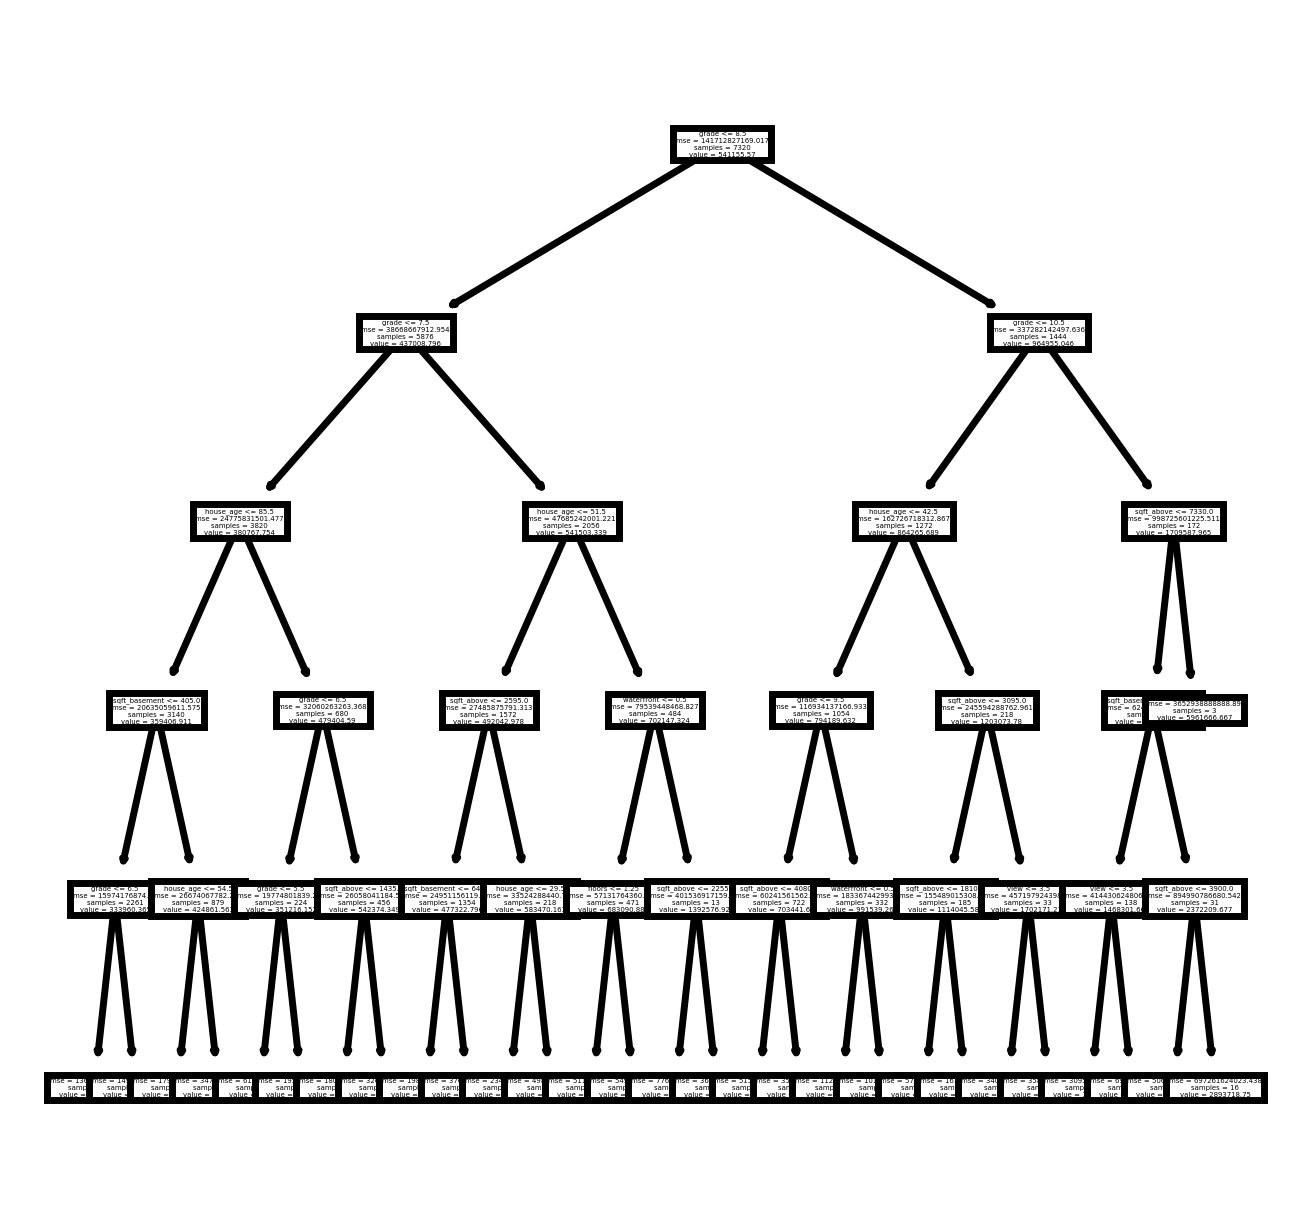

In [274]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('Model7.jpeg')
plt.show()

In [275]:
y_pred = reg_tree.predict(X_valid)
y_pred

array([ 352793.93002257, 1815933.33333333,  502926.14527027, ...,
        954810.67391304,  352793.93002257,  695659.46078431])

In [276]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

236361.3556762208

In [277]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

28.841627313931117

Since this is our lowest MAPE, we want to experiment with hypertuning the parameters of this model.

In [279]:
#Hyperparameter tuning 
depth = np.arange(1,15)
mape = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=3)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mape.append(np.mean(np.abs(y_valid - y_pred)/y_valid)*100) #MAPE

In [379]:
mape

[41.46457098587316,
 36.451445038534644,
 33.52064211846831,
 31.301308553335698,
 29.00335339914219,
 28.03318795785636,
 27.70952738076535,
 27.338323925202335,
 27.418270526541992,
 27.743915904114274,
 28.027841072750537,
 28.586325339138398,
 28.68158445793465,
 29.22582348342549]

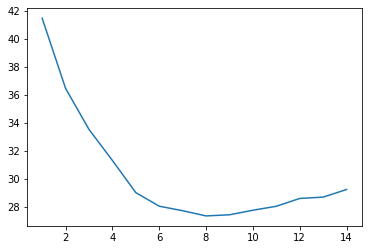

In [380]:
plt.plot(depth, np.array(mape))
plt.show()

Select  depth=7 or 8 to get  the best model without feature engineering. We chose depth=8 as it gave the lowest MAPE.

In [382]:
reg_tree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)
y_pred=reg_tree.predict(X_valid)
# RMSE
rmse=np.sqrt(np.mean((y_valid - y_pred)**2))
mape=np.mean(np.abs(y_valid - y_pred)/y_valid)*100

In [286]:
rmse, mape

(237023.24886004583, 27.871863491990016)

#### SCOPE: Hypertuning the parameters has brought down  the RMSE and MAPE slightly. We will use this model on  our test data. Our intuition is that  zipcode,  as well as some other variables,  will be better predictors and will lower MAPE and RMSE. We will try to create these variables using  feature engineering methods.

### Experiment:  FEATURE ENGINEERING

We are unable to use variables like zipcode, yr_renovated in our analysis as they are categorical variables. Additionally, we wanted to run our  regression tree on the  variable "basement" which simply indicates the presence of a basement (0 vs 1).

In [601]:
#Pandas dummies for transforming zipcode variable
zipcodes = pd.get_dummies(data.zipcode,drop_first=True)
data = pd.concat([data, zipcodes], axis='columns')
data

id             date      price  bedrooms  bathrooms  \
0     2487200875  20141209T000000   604000.0         4       3.00   
1     7237550310  20140512T000000  1225000.0         4       4.50   
2     9212900260  20140527T000000   468000.0         2       1.00   
3      114101516  20140528T000000   310000.0         3       1.00   
4     6054650070  20141007T000000   400000.0         3       1.75   
...          ...              ...        ...       ...        ...   
9756  9834201367  20150126T000000   429000.0         3       2.00   
9757  3448900210  20141014T000000   610685.0         4       2.50   
9758  7936000429  20150326T000000  1007500.0         4       3.50   
9759  1523300141  20140623T000000   402101.0         2       0.75   
9760  1523300157  20141015T000000   325000.0         2       0.75   

      sqft_living  sqft_lot  floors  waterfront  view  ...  98146  98148  \
0            1960      5000     1.0           0     0  ...      0      0   
1            5420    101930     1.0           0     0  ...      0      0   
2            1160      6000     1.0           0     0  ...      0      0   
3            1430     19901     1.5           0     0  ...      0      0   
4            1370      9680     1.0           0     0  ...      0      0   
...           ...       ...     ...         ...   ...  ...    ...    ...   
9756         1490      1126     3.0           0     0  ...      0      0   
9757         2520      6023     2.0           0     0  ...      0      0   
9758         3510      7200     2.0           0     0  ...      0      0   
9759         1020      1350     2.0           0     0  ...      0      0   
9760         1020      1076     2.0           0     0  ...      0      0   

      98155  98166  98168  98177  98178  98188  98198  98199  
0         0      0      0      0      0      0      0      0  
1         0      0      0      0      0      0      0      0  
2         0      0      0      0      0      0      0      0  
3         0      0      0      0      0      0      0      0  
4         0      0      0      0      0      0      0      0  
...     ...    ...    ...    ...    ...    ...    ...    ...  
9756      0      0      0      0      0      0      0      0  
9757      0      0      0      0      0      0      0      0  
9758      0      0      0      0      0      0      0      0  
9759      0      0      0      0      0      0      0      0  
9760      0      0      0      0      0      0      0      0  

[9761 rows x 91 columns]

In [602]:
# dummies for transforming "yr_renovated" variable
data["renovated"]=np.where(data["yr_renovated"]>0,1,0)

In [603]:
# dummies for transforming "sqft_basement" variable
data["basement"]=np.where(data["sqft_basement"]>0,1,0)

In [612]:
# log transform of price
log_price = np.log(data.price)
data.insert(93, 'log_price', log_price, True)

### Experiment:   MODEL FITTING AFTER FEATURE ENGINEERING 

#### Model 1:  Adding feature engineered variables to the best model we found before feature engineering  

In [690]:
X_train=data[['floors','sqft_above','grade', 'condition','waterfront','view','sqft_lot',
               'sqft_basement','house_age','bedrooms','renovated','basement']]
y_train = data.price

In [607]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [460]:
reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=3)

In [461]:
y_pred=reg_tree.predict(X_valid)
y_pred

array([426776.78857143, 542836.52529183, 495661.69897959, ...,
       658161.74193548, 805328.41212121, 426776.78857143])

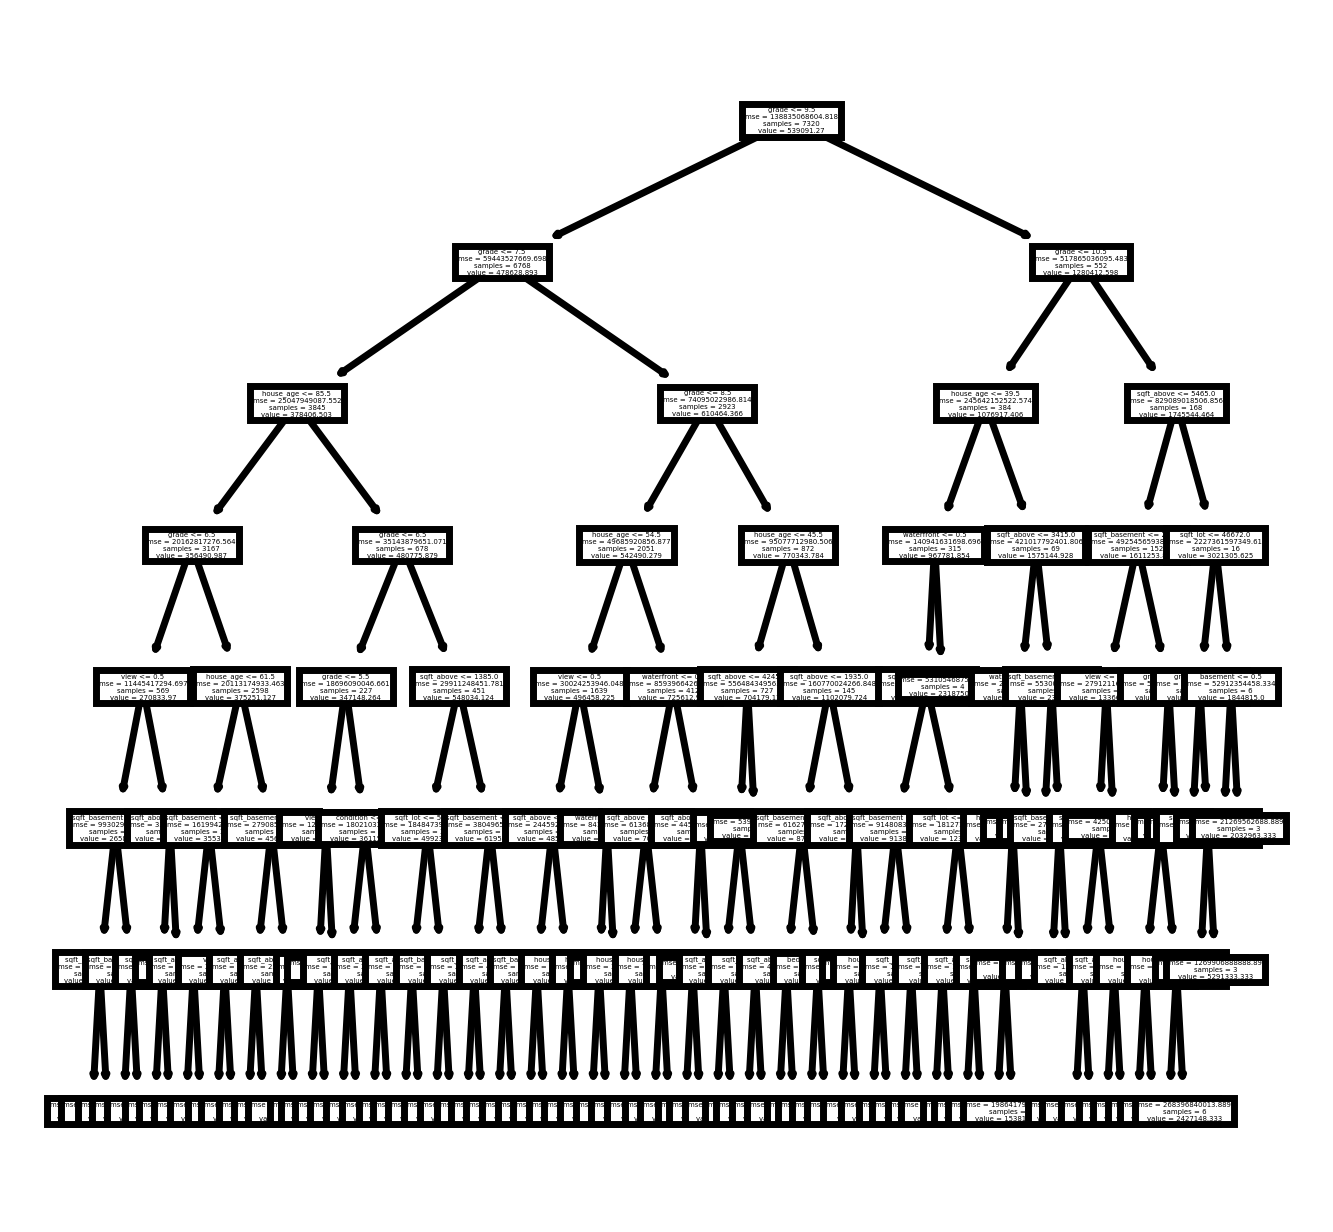

In [462]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('FEModel1.jpeg')
plt.show()

In [464]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

217579.93917825996

In [465]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

27.70274901844017

In [466]:
#Hyperparameter tuning 
depth = np.arange(1,15)
mape = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=3)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mape.append(np.mean(np.abs(y_valid - y_pred)/y_valid)*100) #MAPE

In [467]:
mape

[44.35126584767429,
 36.92956362911539,
 33.747619590362774,
 30.537045206870395,
 29.253497993446437,
 28.28903289230773,
 27.70274901844017,
 27.446938816705835,
 27.390906620173194,
 27.543643981939482,
 27.776875091590792,
 28.311660616459804,
 29.05282954007673,
 29.174716332215624]

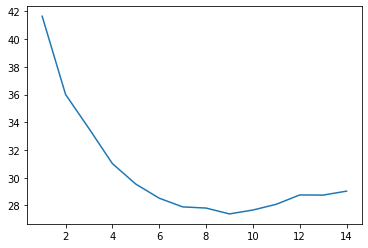

In [411]:
plt.plot(depth, np.array(mape))
plt.show()

In [468]:
#Choose k=8,9

In [473]:
leaf = np.arange(1,15)
mape = []

for i in leaf:
    reg_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=i)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    mape.append(np.mean(np.abs(y_valid - y_pred)/y_valid)*100) #MAPE

In [474]:
mape

[27.675089381871405,
 27.235621125463215,
 27.390906620173194,
 27.40368397657954,
 27.473673865111824,
 27.664059162381754,
 27.534281495426978,
 27.551276858406787,
 27.483386646658936,
 27.60043027660971,
 27.647768908356213,
 27.503087692554207,
 27.429770431611516,
 27.420365186233504]

Choose depth=9,leaf=2 where MAPE is the lowest (27.392)  , which is what we chose before hyperparameter tuning. This is the lowest  error we can get after feature engineering in this model. We will implement  this on the  test data. 

#### Model 2: Our next model includes zipcodes created with one-hot encoding. 

In [642]:
#We also tried feature engineering on zipcode, however, the MAPE was 0.86, which hinted at  an  error in our  encoding.
X_train = data.drop(['sqft_above','bedrooms','bathrooms','sqft_basement','floors','yr_built','yr_renovated','date','id','lat','long','sqft_living15','sqft_lot15','log_price','zipcode','waterfront'],axis=1)
y_train = data.price

In [609]:
#Train-Validation Split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [477]:
reg_tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=3) 
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=3)

In [478]:
y_pred=reg_tree.predict(X_valid)
y_pred

array([276792.14473684, 317496.21830986, 400235.45918367, ...,
       525346.45833333, 477081.97297297, 388463.14529915])

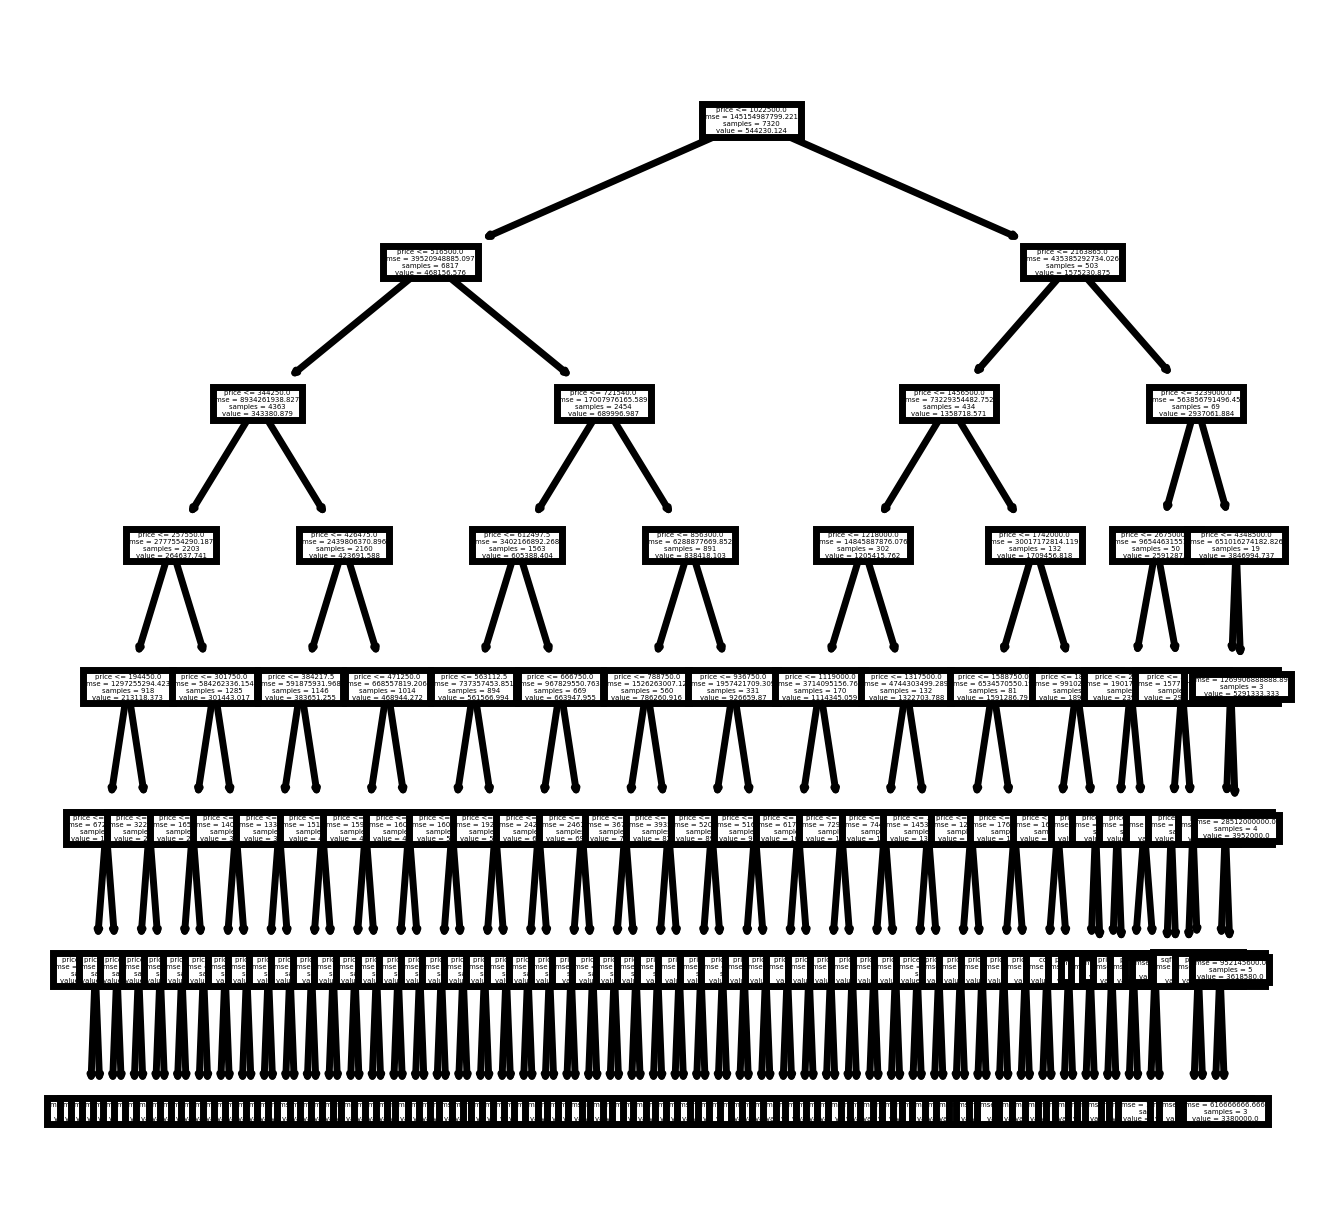

In [479]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('FEModel2.jpeg')
plt.show()

In [480]:
# RMSE
np.sqrt(np.mean((y_valid - y_pred)**2))

49038.62359770393

In [481]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_valid - y_pred)/y_valid)*100

0.8525859202521574

Our first model after feature engineering and hyperparameter tuning shows that the reduction in MAPE and  RMSE is very low. There is not  much difference that feature engineering has made in this model.
Our second model post feature engineering of zipcodes shows a drastic change in  RMSE and MAPE. We are unsure of the reasons for this  drastic change. We will implement this model in our test data to see if it's replicable.

### Experiment: Model Testing  

In [617]:
test=pd.read_csv("/Users/aanchalkhanna72/Downloads/kc_house_test_data.csv")
test.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  3793500160  20150312T000000  323000.0         3       2.50         1890   
1  1175000570  20150312T000000  530000.0         5       2.00         1810   
2    16000397  20141205T000000  189000.0         2       1.00         1200   
3   461000390  20140624T000000  687500.0         4       1.75         2330   
4  7895500070  20150213T000000  240000.0         4       1.00         1220   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      6560     2.0           0     0  ...      7        1890              0   
1      4850     1.5           0     0  ...      7        1810              0   
2      9850     1.0           0     0  ...      7        1200              0   
3      5000     1.5           0     0  ...      7        1510            820   
4      8075     1.0           0     0  ...      7         890            330   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      2003             0    98038  47.3684 -122.031           2390   
1      1900             0    98107  47.6700 -122.394           1360   
2      1921             0    98002  47.3089 -122.210           1060   
3      1929             0    98117  47.6823 -122.368           1460   
4      1969             0    98001  47.3341 -122.282           1290   

   sqft_lot15  
0        7570  
1        4850  
2        5095  
3        5000  
4        7800  

[5 rows x 21 columns]

In [618]:
len(test)

2217

In [691]:
#cleaning the data, as was done with train data
data[data['bedrooms']==0]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, house_age, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199, renovated, basement, log_price]
Index: []

[0 rows x 94 columns]

In [620]:
data[data['bathrooms']==0]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, house_age, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199, renovated, basement, log_price]
Index: []

[0 rows x 94 columns]

In [621]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2217 non-null   int64  
 1   date           2217 non-null   object 
 2   price          2217 non-null   float64
 3   bedrooms       2217 non-null   int64  
 4   bathrooms      2217 non-null   float64
 5   sqft_living    2217 non-null   int64  
 6   sqft_lot       2217 non-null   int64  
 7   floors         2217 non-null   float64
 8   waterfront     2217 non-null   int64  
 9   view           2217 non-null   int64  
 10  condition      2217 non-null   int64  
 11  grade          2217 non-null   int64  
 12  sqft_above     2217 non-null   int64  
 13  sqft_basement  2217 non-null   int64  
 14  yr_built       2217 non-null   int64  
 15  yr_renovated   2217 non-null   int64  
 16  zipcode        2217 non-null   int64  
 17  lat            2217 non-null   float64
 18  long    

Since there  no anomalies with bedrooms/bathrooms=0 or any null  values, we don't need to make any  changes.

In [622]:
test.describe()

id         price     bedrooms    bathrooms  sqft_living  \
count  2.217000e+03  2.217000e+03  2217.000000  2217.000000  2217.000000   
mean   4.628092e+09  5.386429e+05     3.353631     2.099008  2073.439783   
std    2.910469e+09  3.584223e+05     0.867263     0.757563   897.054209   
min    1.000102e+06  8.300000e+04     1.000000     0.500000   420.000000   
25%    2.117700e+09  3.200000e+05     3.000000     1.500000  1460.000000   
50%    3.905081e+09  4.500000e+05     3.000000     2.250000  1910.000000   
75%    7.462900e+09  6.350000e+05     4.000000     2.500000  2490.000000   
max    9.839301e+09  3.850000e+06     9.000000     6.000000  7850.000000   

            sqft_lot       floors   waterfront         view    condition  \
count    2217.000000  2217.000000  2217.000000  2217.000000  2217.000000   
mean    13554.643212     1.496166     0.005864     0.227334     3.412720   
std     29606.430361     0.543553     0.076368     0.755074     0.665472   
min       683.000000     1.000000     0.000000     0.000000     1.000000   
25%      5000.000000     1.000000     0.000000     0.000000     3.000000   
50%      7526.000000     1.500000     0.000000     0.000000     3.000000   
75%     10464.000000     2.000000     0.000000     0.000000     4.000000   
max    435600.000000     3.500000     1.000000     4.000000     5.000000   

             grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
count  2217.000000  2217.000000    2217.000000  2217.000000   2217.000000   
mean      7.648173  1791.431213     282.008570  1971.046459     86.330627   
std       1.150964   836.477490     423.914803    29.505233    405.893265   
min       4.000000   420.000000       0.000000  1900.000000      0.000000   
25%       7.000000  1200.000000       0.000000  1951.000000      0.000000   
50%       7.000000  1560.000000       0.000000  1975.000000      0.000000   
75%       8.000000  2220.000000     540.000000  1997.000000      0.000000   
max      12.000000  7850.000000    2570.000000  2015.000000   2015.000000   

            zipcode          lat         long  sqft_living15     sqft_lot15  
count   2217.000000  2217.000000  2217.000000    2217.000000    2217.000000  
mean   98079.107352    47.557274  -122.215217    1985.875056   12147.815065  
std       52.951950     0.136144     0.140791     686.149119   22904.986531  
min    98001.000000    47.194200  -122.511000     399.000000     755.000000  
25%    98033.000000    47.469800  -122.329000    1490.000000    5078.000000  
50%    98070.000000    47.567000  -122.235000    1830.000000    7551.000000  
75%    98118.000000    47.674500  -122.127000    2370.000000   10000.000000  
max    98199.000000    47.777500  -121.352000    6210.000000  292645.000000

In [623]:
#creating variable "house_age" and "log_price"
house_age = 2015 - test['yr_built']
test.insert(21, 'house_age', house_age, True)

In [625]:
# log transform of price
log_price = np.log(test.price)
test.insert(22, 'log_price', log_price, True)

In [626]:
#creating dummies for "renovated","basement"
test['renovated'] = np.where(test['yr_renovated'] > 0, 1, 0)
test['basement'] = np.where(test['sqft_basement'] > 0, 1, 0)

In [627]:
#one-hot encoding for zipcodes
zipcodes = pd.get_dummies(test.zipcode, drop_first=True)
test = pd.concat([test, zipcodes], axis='columns')

In [628]:
#Running two models on test data 
X_train=data[['floors','sqft_above','grade', 'condition','waterfront','view','sqft_lot',
               'sqft_basement','house_age','bedrooms','basement','renovated']]
y_train = data.price

In [630]:
X_test=test[['floors','sqft_above','grade', 'condition','waterfront','view','sqft_lot',
               'sqft_basement','house_age','bedrooms','basement','renovated']]
y_test = test.price

In [639]:
#fitting the model
reg_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=2) 
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=2)

In [640]:
#predicting y_test in this the model
y_predt=reg_tree.predict(X_test)
y_predt

array([326704.1923436 , 570334.07692308, 448250.        , ...,
       527354.27559055, 351453.42857143, 450620.97119342])

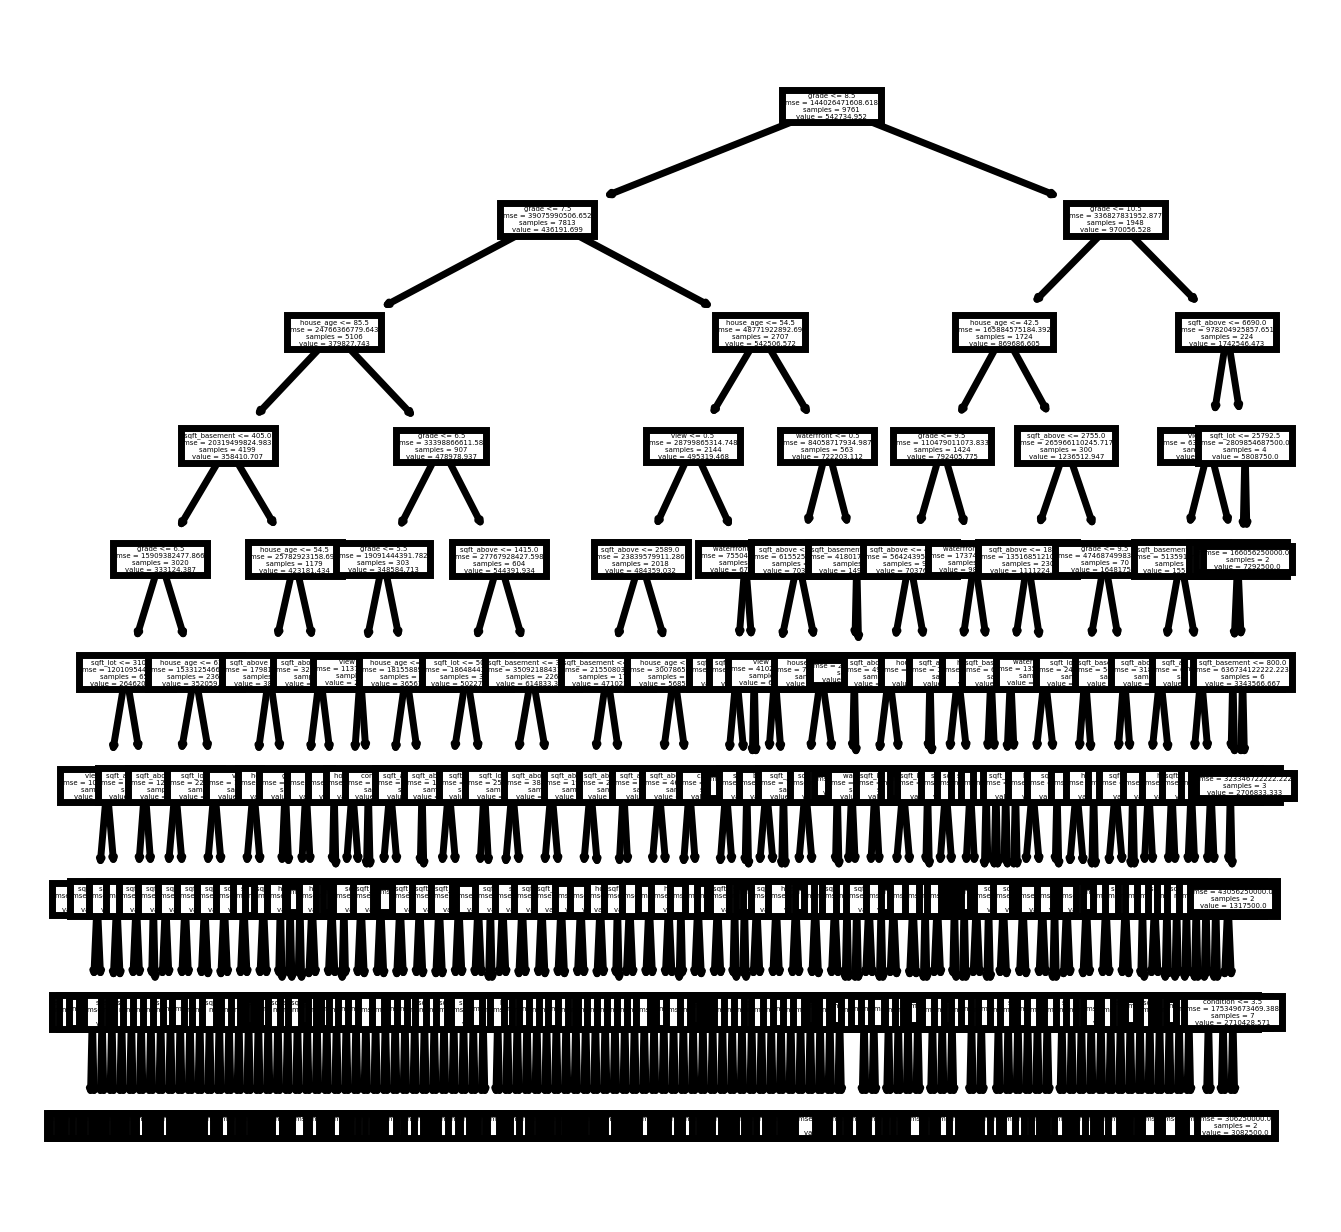

In [641]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('TestModel1.jpeg')
plt.show()

In [646]:
# RMSE
np.sqrt(np.mean((y_test - y_predt)**2))

251156.19836389925

In [647]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_predt)/y_test)*100

29.06473216443094

#### SCOPE: Our model shows MAPE of 29.06% which means that on aaverage,  our predicted values are 29% away  from the actual values. We will also try our model with zipcode on our test data.

###  Experiment: Running Model 2 (with zipcode feature engineer variable) on  test data

In [643]:
X_train = data.drop(['sqft_above','bedrooms','bathrooms','sqft_basement','floors','yr_built','yr_renovated','date','id','lat','long','sqft_living15','sqft_lot15','log_price','zipcode','waterfront'],axis=1)
y_train = data.price


In [644]:
X_test = test.drop(['sqft_above','bedrooms','bathrooms','sqft_basement','floors','yr_built','yr_renovated','date','id','lat','long','sqft_living15','sqft_lot15','log_price','zipcode','waterfront'],axis=1)
y_test = test.price

In [654]:
#fitting the model
reg_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=2) 
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=2)

In [655]:
#predicting y_test in this model
y_predt=reg_tree.predict(X_test)
y_predt

array([324742.20652174, 529680.8       , 191195.77777778, ...,
       609929.65      , 229917.95522388, 414823.57142857])

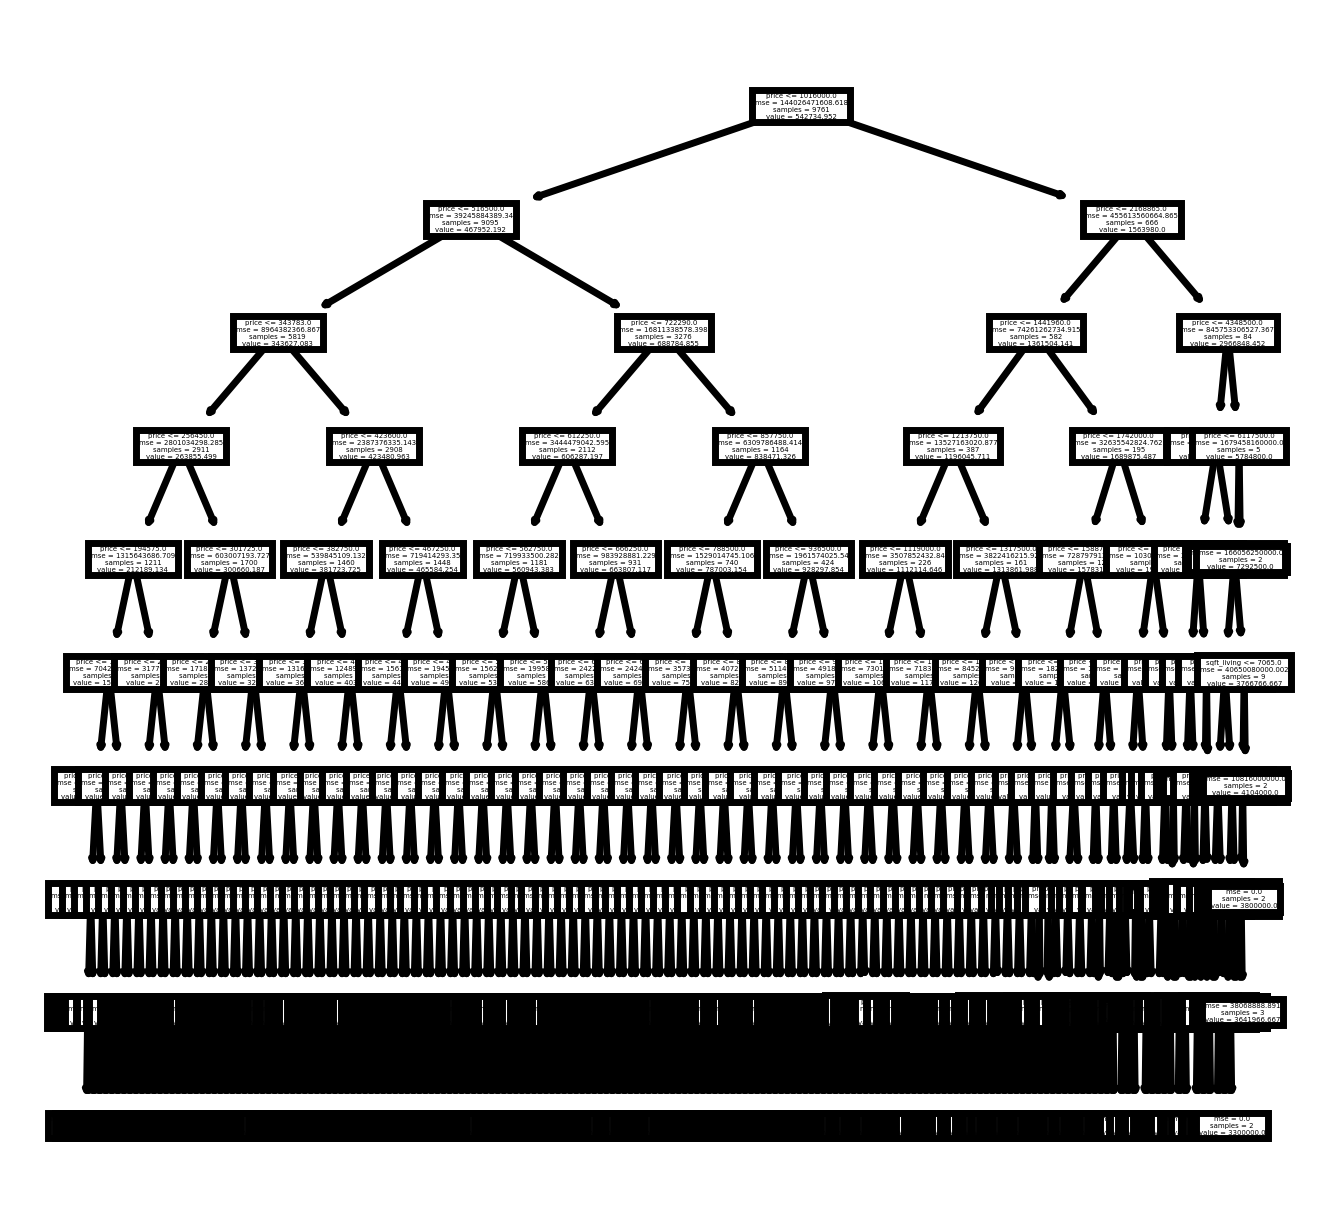

In [656]:
#Plotting Reg Decision Tree
fig, axes  = plt.subplots(figsize=(3,3), dpi=500)
tree.plot_tree(reg_tree, feature_names=list(X_train), filled=False)
plt.savefig('TestModel2.jpeg')
plt.show()

In [657]:
# RMSE (Root mean squared error)
np.sqrt(np.mean((y_test - y_predt)**2))

4818.237977745297

In [660]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - y_predt)/y_test)*100

0.17147858794089596

#### SCOPE: The error  in  our model is really low, almost next to 0 percent. This is highly suspicious, however, it is worth exploring as to why we are getting such a low MAPE.